In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tomso import fgong, mesa, gyre
from tomso.utils import integrate
import pandas as pd 

from scipy.interpolate import interp1d

from matplotlib.colors import ListedColormap, BoundaryNorm, Normalize, LogNorm

In [2]:
import matplotlib.font_manager

# list all available fonts in matplotlib
fonts = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
#print("\n".join(fonts))

In [3]:
#from matplotlib import rc
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'axes.linewidth' : 1,
                     'ytick.major.width' : 1,
                     'ytick.minor.width' : 1,
                     'xtick.major.width' : 1,
                     'xtick.minor.width' : 1,
                     'xtick.labelsize': 10, 
                     'ytick.labelsize': 10,
                     'axes.labelsize': 12,
                     'font.family': 'Serif'#,
                     #'font.family': 'Droid Sans'
                    })

red = "#CA0020"
orange = "#F97100" 
blue = "#0571b0"

In [4]:
width, height = 4, 3.8

In [5]:
S = fgong.load_fgong('https://users-phys.au.dk/jcd/solar_models/fgong.l5bi.d.15c', G=6.67232e-8)

In [6]:
m0 = pd.read_table('dark-core-calibrate/LOGS_solar/solar.data', sep='\s+', skiprows=5)
m8 = pd.read_table('dark-core-calibrate/grid/LOGS_-8/solar.data', sep='\s+', skiprows=5)
m7 = pd.read_table('dark-core-calibrate/grid/LOGS_-7/solar.data', sep='\s+', skiprows=5)
m6 = pd.read_table('dark-core-calibrate/grid/LOGS_-6/solar.data', sep='\s+', skiprows=5)
m5 = pd.read_table('dark-core-calibrate/grid/LOGS_-5/solar.data', sep='\s+', skiprows=5)
m4 = pd.read_table('dark-core-calibrate/grid/LOGS_-4/solar.data', sep='\s+', skiprows=5)
m3 = pd.read_table('dark-core-calibrate/grid/LOGS_-3/solar.data', sep='\s+', skiprows=5)
m2 = pd.read_table('dark-core-calibrate/grid/LOGS_-2/solar.data', sep='\s+', skiprows=5)

In [7]:
gyre0 = gyre.load_gyre('dark-core-calibrate/LOGS_solar/solar.data.GYRE')
gyre8 = gyre.load_gyre('dark-core-calibrate/grid/LOGS_-8/solar.data.GYRE')
gyre7 = gyre.load_gyre('dark-core-calibrate/grid/LOGS_-7/solar.data.GYRE')
gyre6 = gyre.load_gyre('dark-core-calibrate/grid/LOGS_-6/solar.data.GYRE')
gyre5 = gyre.load_gyre('dark-core-calibrate/grid/LOGS_-5/solar.data.GYRE')
gyre4 = gyre.load_gyre('dark-core-calibrate/grid/LOGS_-4/solar.data.GYRE')
gyre3 = gyre.load_gyre('dark-core-calibrate/grid/LOGS_-3/solar.data.GYRE')
gyre2 = gyre.load_gyre('dark-core-calibrate/grid/LOGS_-2/solar.data.GYRE')
gyrs6 = [gyre0, gyre6, gyre5, gyre4, gyre3, gyre2]
gyres = [gyre0, gyre8, gyre7, gyre6, gyre5, gyre4, gyre3, gyre2]

In [8]:
hist0 = pd.read_table('dark-core-calibrate/LOGS_solar/history.data', skiprows=5, sep='\s+')
hist8 = pd.read_table('dark-core-calibrate/grid/LOGS_-8/history.data', skiprows=5, sep='\s+')
hist7 = pd.read_table('dark-core-calibrate/grid/LOGS_-7/history.data', skiprows=5, sep='\s+')
hist6 = pd.read_table('dark-core-calibrate/grid/LOGS_-6/history.data', skiprows=5, sep='\s+')
hist5 = pd.read_table('dark-core-calibrate/grid/LOGS_-5/history.data', skiprows=5, sep='\s+')
hist4 = pd.read_table('dark-core-calibrate/grid/LOGS_-4/history.data', skiprows=5, sep='\s+')
hist3 = pd.read_table('dark-core-calibrate/grid/LOGS_-3/history.data', skiprows=5, sep='\s+')
hist2 = pd.read_table('dark-core-calibrate/grid/LOGS_-2/history.data', skiprows=5, sep='\s+')

hists = [hist0, hist6, hist5, hist4, hist3, hist2]
hists8 = [hist0, hist8, hist7, hist6, hist5, hist4, hist3, hist2]

In [9]:
dfs = [m0, m6, m5, m4, m3, m2]
masses = [1e-8, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

In [10]:
#colors = plt.cm.YlOrBr_r(np.linspace(0, 0.6, len(masses)))
colors = plt.cm.plasma(np.linspace(0, 0.8, len(masses)))
colors[0, :] = [0, 0, 0, 1]
cmap = ListedColormap(colors)
norm = LogNorm(vmin=1e-7, vmax=1e-1)
tick_locs = [3e-7, 3e-6, 3e-5, 3e-4, 3e-3, 3e-2]
tick_labels = [r'10$^{' + str(int(np.log10(m))) + r'}$' if m > 1e-8 else r'$0$' for m in masses]
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

In [11]:
def cbar():
    cbar = plt.colorbar(sm, ax=plt.gca(), ticks=tick_locs)
    cbar.ax.set_yticklabels(tick_labels)
    cbar.ax.minorticks_off()
    cbar.set_label(r'Dark core mass [M$_\odot$]')

In [12]:
def cbar_no0():
    #colors = plt.cm.YlOrBr_r(np.linspace(0, 0.6, len(masses))[1:])
    colors = plt.cm.plasma(np.linspace(0, 0.8, len(masses))[1:])
    colors[0, :] = [0, 0, 0, 1]
    cmap = ListedColormap(colors)
    norm = LogNorm(vmin=1e-7, vmax=1e-1)
    tick_locs = [3e-6, 3e-5, 3e-4, 3e-3, 3e-2]
    tick_labels = [r'$10^{' + str(int(np.log10(m))) + r'}$' for m in masses[1:]]
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(sm, ax=plt.gca(), ticks=tick_locs)
    cbar.ax.set_yticklabels(tick_labels)
    cbar.ax.minorticks_off()
    cbar.set_label(r'Dark core mass [M$_\odot$]')

In [13]:
dfs7 = [m0, m7, m6, m5, m4, m3, m2]
masses7 = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
#colors7 = plt.cm.YlOrBr_r(np.linspace(0, 0.6, len(masses7)))
colors7 = plt.cm.plasma(np.linspace(0, 0.8, len(masses7)))
colors7[0, :] = [0, 0, 0, 1]
cmap7 = ListedColormap(colors7)
norm7 = LogNorm(vmin=1e-8, vmax=1e-1)

def cbar_7():
    tick_locs = [3e-8, 3e-7, 3e-6, 3e-5, 3e-4, 3e-3, 3e-2]
    tick_labels = [r'$10^{' + str(int(np.log10(m))) + r'}$' if m > 1e-8 else r'$0$' for m in masses7]
    sm = plt.cm.ScalarMappable(cmap=cmap7, norm=norm7)
    cbar = plt.colorbar(sm, ax=plt.gca(), ticks=tick_locs)
    cbar.ax.set_yticklabels(tick_labels)
    cbar.ax.minorticks_off()
    cbar.set_label(r'Dark core mass [M$_\odot$]')

In [14]:
dfs8 = [m0, m8, m7, m6, m5, m4, m3, m2]
masses8 = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
#colors8 = plt.cm.YlOrBr_r(np.linspace(0, 0.6, len(masses8)))
colors8 = plt.cm.plasma(np.linspace(0, 0.8, len(masses8)))
colors8[0, :] = [0, 0, 0, 1]
cmap8 = ListedColormap(colors8)
norm8 = LogNorm(vmin=1e-9, vmax=1e-1)

def cbar_8():
    tick_locs = [3e-9, 3e-8, 3e-7, 3e-6, 3e-5, 3e-4, 3e-3, 3e-2]
    tick_labels = [r'$10^{' + str(int(np.log10(m))) + r'}$' if m > 1e-9 else r'$0$' for m in masses8]
    sm = plt.cm.ScalarMappable(cmap=cmap8, norm=norm8)
    cbar = plt.colorbar(sm, ax=plt.gca(), ticks=tick_locs)
    cbar.ax.set_yticklabels(tick_labels)
    cbar.ax.minorticks_off()
    cbar.set_label(r'Dark core mass [M$_\odot$]')

In [15]:
dfs63 = [m0, m6, m5, m4, m3]
gyrs63 = [gyre0, gyre6, gyre5, gyre4, gyre3]
masses63 = [1e-8, 1e-6, 1e-5, 1e-4, 1e-3]
colors63 = plt.cm.plasma(np.linspace(0, 0.8, len(masses63)))
colors63[0, :] = [0, 0, 0, 1]
cmap63 = ListedColormap(colors63)
norm63 = LogNorm(vmin=1e-6, vmax=1e-1)

def cbar_63():
    tick_locs = [3e-7, 3e-6, 3e-5, 3e-4, 3e-3]
    tick_labels = [r'$10^{' + str(int(np.log10(m))) + r'}$' if m > 1e-8 else r'$0$' for m in masses63]
    sm = plt.cm.ScalarMappable(cmap=cmap63, norm=norm63)
    cbar = plt.colorbar(sm, ax=plt.gca(), ticks=tick_locs)
    cbar.ax.set_yticklabels(tick_labels)
    cbar.ax.minorticks_off()
    cbar.set_label(r'Dark core mass [M$_\odot$]')

In [16]:
dfs53 = [m0, m6, m5, m4, m3]
gyrs53 = [gyre0, gyre5, gyre4, gyre3]
masses53 = [1e-8, 1e-5, 1e-4, 1e-3]
colors53 = plt.cm.plasma(np.linspace(0, 0.8, len(masses53)))
colors53[0, :] = [0, 0, 0, 1]
cmap53 = ListedColormap(colors53)
norm53 = LogNorm(vmin=1e-6, vmax=1e-3)

def cbar_53():
    tick_locs = [3e-6, 3e-5, 3e-4]
    tick_labels = [r'$10^{' + str(int(np.log10(m))) + r'}$' if m > 1e-8 else r'$0$' for m in masses53]
    sm = plt.cm.ScalarMappable(cmap=cmap63, norm=norm63)
    cbar = plt.colorbar(sm, ax=plt.gca(), ticks=tick_locs)
    cbar.ax.set_yticklabels(tick_labels)
    cbar.ax.minorticks_off()
    cbar.set_label(r'Dark core mass [M$_\odot$]')

## Radial Structure

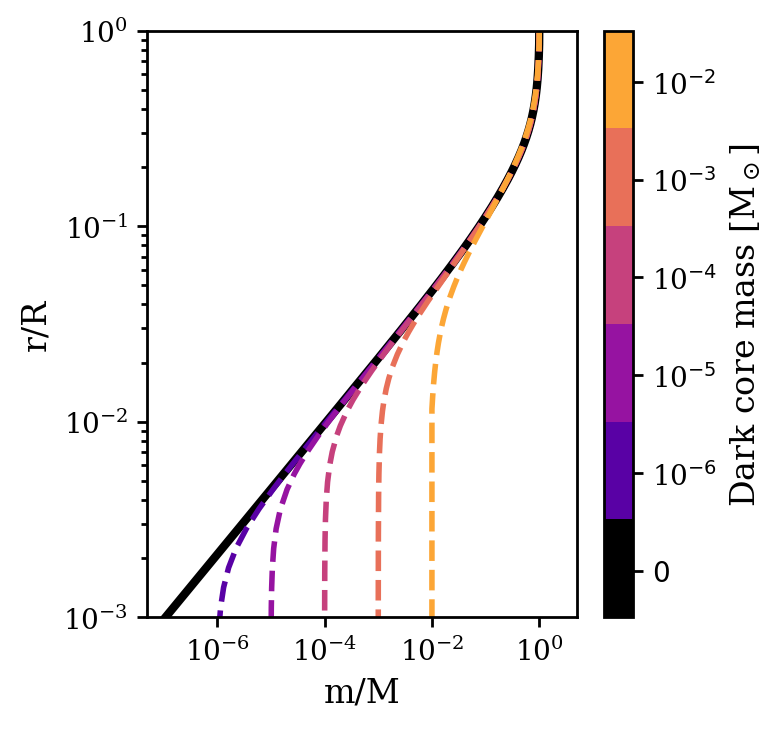

In [17]:
plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    m = df.mass
    x = 10**df.logR
    if mass > 1e-8:
        m = list(m) + [mass]
        x = list(x) + [0]
    plt.plot(m, x, color=cmap(norm(mass)), ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

plt.xlabel('m/M')
plt.ylabel('r/R')
plt.semilogx()
plt.semilogy()
plt.ylim([1e-3, 1e0])
plt.xlim([5e-8, 5e0])

cbar()

plt.tight_layout()
plt.savefig('figs/mr.pdf')

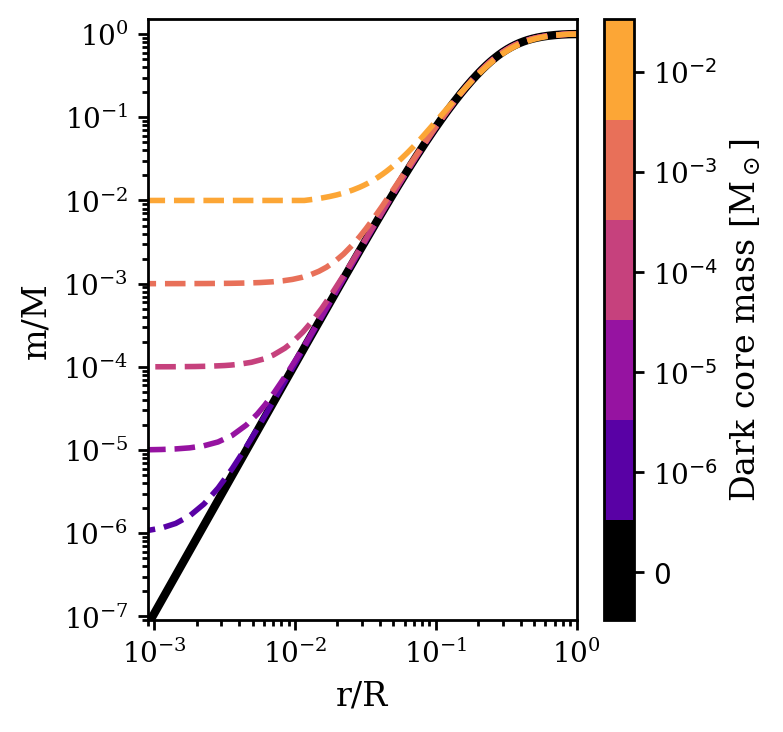

In [20]:
plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    m = df.mass
    x = 10**df.logR
    if mass > 1e-8:
        m = list(m) + [mass]
        x = list(x) + [0]
    plt.plot(x, m, color=cmap(norm(mass)), ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

plt.ylabel('m/M')
plt.xlabel('r/R')
plt.semilogx()
plt.semilogy()
plt.xlim([9e-4, 1e0])
plt.ylim([9e-8, 1.5e0])

cbar()

plt.tight_layout()
plt.savefig('figs/mr.pdf')

In [67]:
(hists[4].R_B.values[-1] - (2 * 6.678e-8 * 1e-2*1e33 / gyrs6[4].cs[0]**2 / 6.957e+10)) / hists[-1].R_B.values[4]

-1.761440603479528

In [68]:
hists[4].R_B.values[-1] 

0.0012643378158909125

In [70]:
2 * 6.678e-8 * 1e-2*1e33 / gyrs6[4].cs[0]**2 / 6.957e+10

0.02380124905542833

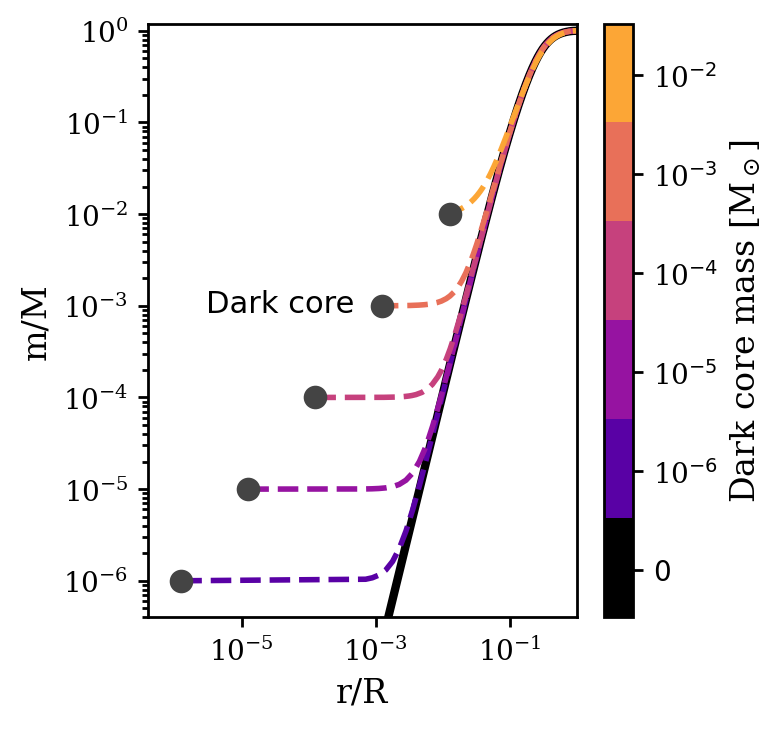

In [83]:
plt.figure(figsize=(width,height))

for mass, df, hist in zip(masses, gyrs6, hists):
    m = df.m / df.M
    x = df.x
    #if mass > 1e-8:
    #    m = list(m) + [mass]
    #    x = list(x) + [0]
    #plt.plot(x[1:], m[1:], color=cmap(norm(mass)), ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
    xs = x[1:]
    ms = m[1:]
    #plt.plot(x, m, color=cmap(norm(mass)), ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
    if mass > 1e-8:
        #c_s = df.cs[0]
        #Rb = (2*df.G*(mass*df.M) / pow(c_s, 2))/(6.9566e10)
        #plt.plot(x[1], m[1], '.', color='#444444', ms=15)
        Rb = hist['R_B'].values[0]
        plt.plot(Rb, mass, '.', color='#444444', ms=15)
        xs = np.insert(xs, 0, Rb)
        ms = np.insert(ms, 0, mass)
    plt.plot(xs, ms, color=cmap(norm(mass)), ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2, zorder=-99)

#plt.plot(np.nan, np.nan, '.', color='#444444', ms=15, label='Bondi radius')
#plt.legend()
plt.text(3e-6, 8.5e-4, 'Dark core', family='Sans', size=11)

plt.ylabel('m/M')
plt.xlabel('r/R')
plt.semilogx()
plt.semilogy()
plt.ylim(4e-7, 1.2e0)
plt.xlim(4e-7, 1)
#plt.ylim(1e-10, 1)
#plt.xlim([9e-4, 1e0])
#plt.ylim([9e-8, 1.5e0])

cbar()

plt.tight_layout()
plt.savefig('figs/mr.pdf')

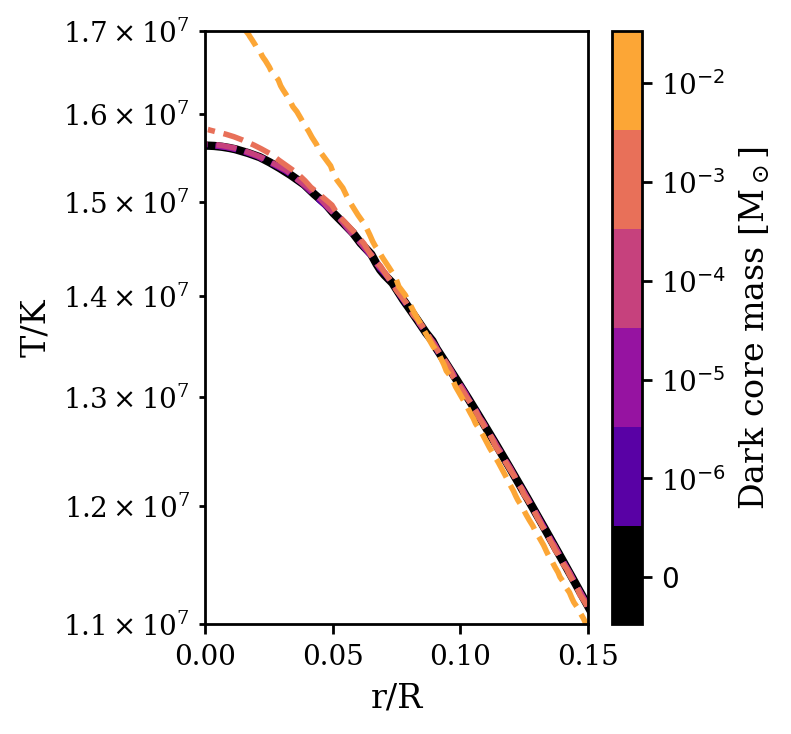

In [21]:
plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    plt.plot(10**df.logR, 10**df.logT, color=cmap(norm(mass)), ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

plt.ylabel('T/K')
plt.xlabel('r/R')
#plt.semilogx()
plt.semilogy()
#plt.xlim([9e-4, 1e0])
plt.xlim([0, 0.15])
plt.ylim([1.1e7, 1.7e7])
#plt.ylim([9e-8, 1.5e0])

cbar()

plt.tight_layout()
#plt.savefig('figs/mr.pdf')

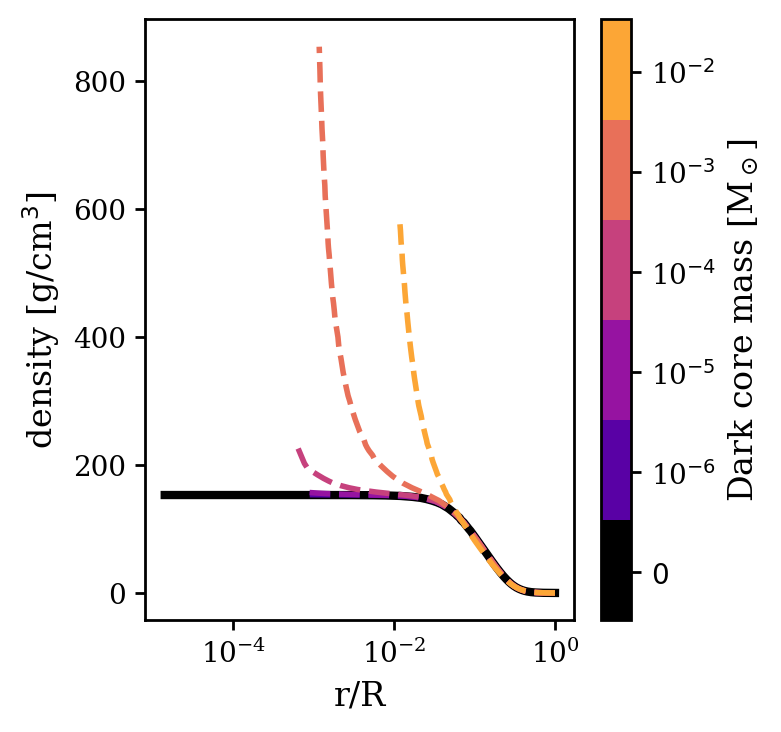

In [22]:
plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    plt.plot(10**df.logR, 10**df.logRho, color=cmap(norm(mass)), ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

plt.xlabel('r/R')
plt.ylabel(r'density [g/cm$^3$]')
plt.semilogx()
cbar()

plt.tight_layout()
plt.savefig('figs/density.pdf')

/tmp/ipykernel_1943715/363556911.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


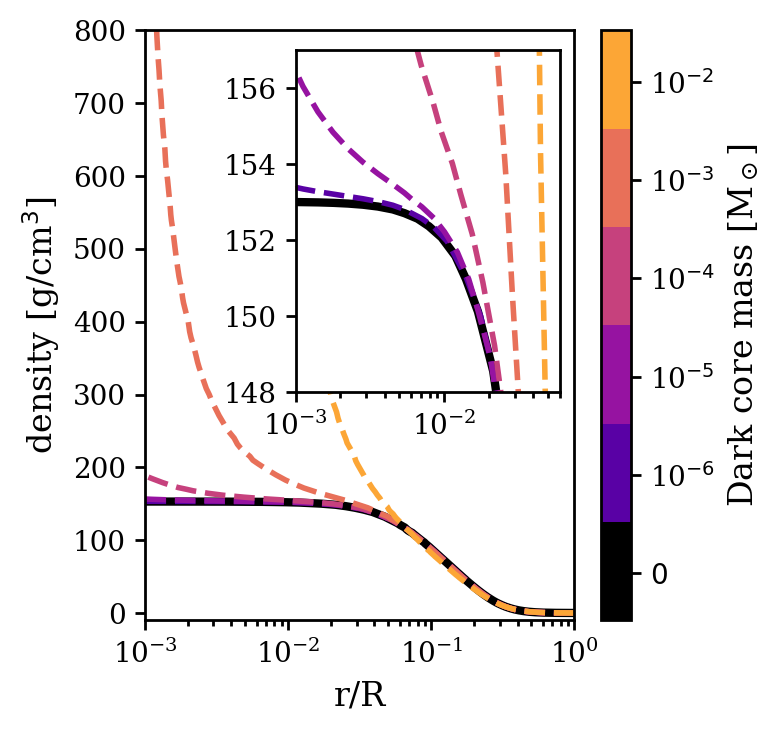

In [23]:
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes


fig = plt.figure(figsize=(width,height))
ax = plt.gca()

for mass, df in zip(masses, dfs):
    plt.plot(10**df.logR, 10**df.logRho, color=cmap(norm(mass)), 
            ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

cbar()
plt.xlabel('r/R')
plt.ylabel(r'density [g/cm$^3$]')
plt.xlim(1e-3, 1)
plt.ylim([-10, 800])
#plt.ylim([0.1, 800])
plt.semilogx()
#plt.semilogy()

#ax_inset = inset_axes(ax, width="30%", height="30%", loc='upper right', borderpad=1)
ax_inset = fig.add_axes([0.39, 0.47, 0.33, 0.45])

for mass, df in zip(masses, dfs):
    ax_inset.plot(10**df.logR, 10**df.logRho, color=cmap(norm(mass)), 
                  ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

ax_inset.set_xlim([1e-3, 0.06])
ax_inset.set_ylim([148, 157])
#ax_inset.semilog()
ax_inset.semilogx()

plt.tight_layout()
#plt.show()
plt.savefig('figs/density.pdf')

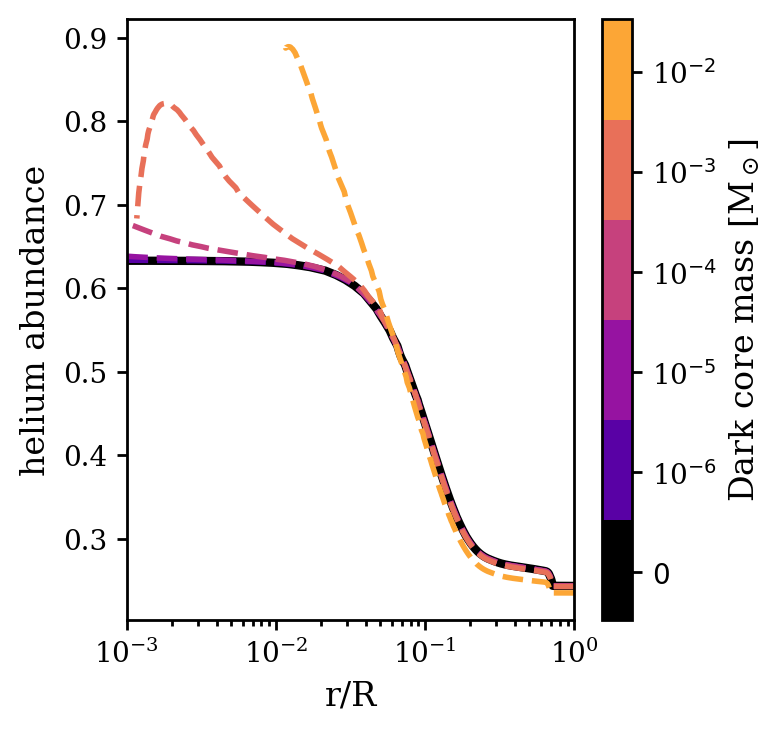

In [24]:
fig = plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    plt.plot(10**df.logR, df.y_mass_fraction_He, color=cmap(norm(mass)), 
            ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

cbar()
plt.xlabel('r/R')
plt.ylabel(r'helium abundance')
plt.xlim(1e-3, 1)
#plt.ylim([-10, 800])
#plt.ylim([0.1, 800])
plt.semilogx()
#plt.semilogy()

plt.tight_layout()
plt.savefig('figs/abundance_Y.pdf')

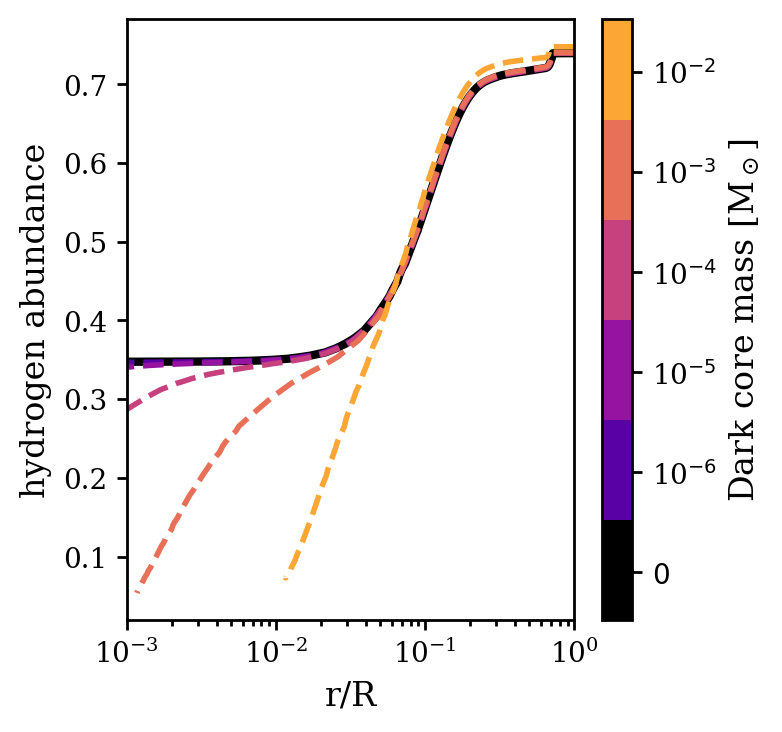

In [25]:
fig = plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    plt.plot(10**df.logR, df.x_mass_fraction_H, color=cmap(norm(mass)), 
            ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

cbar()
plt.xlabel('r/R')
plt.ylabel(r'hydrogen abundance')
plt.xlim(1e-3, 1)
#plt.ylim([-10, 800])
#plt.ylim([0.1, 800])
plt.semilogx()
#plt.semilogy()

plt.tight_layout()
plt.savefig('figs/abundance_X.pdf')

/tmp/ipykernel_1943715/1795555400.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


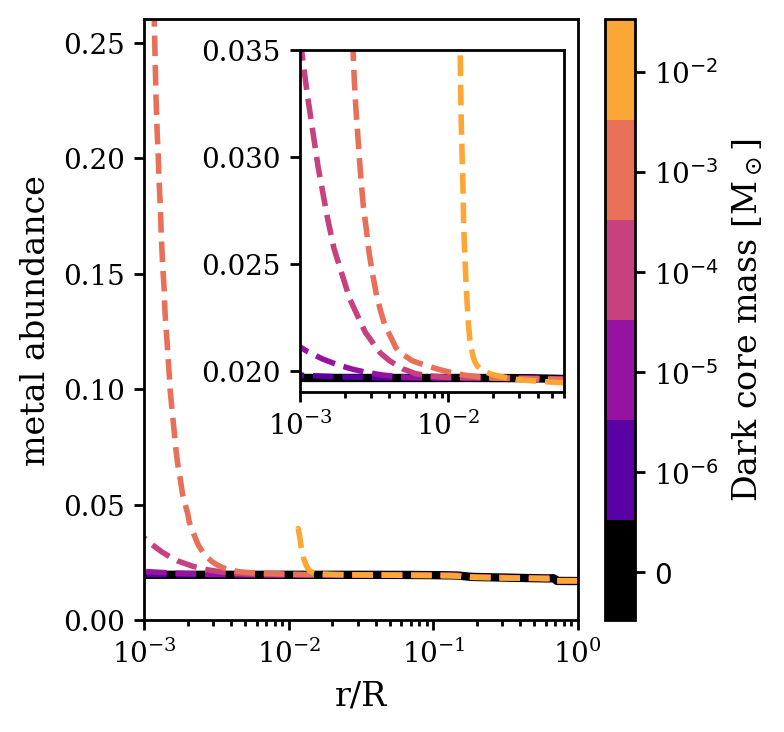

In [26]:
fig = plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    plt.plot(10**df.logR, df.z_mass_fraction_metals, color=cmap(norm(mass)), 
            ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

cbar()
plt.xlabel('r/R')
plt.ylabel(r'metal abundance')
plt.xlim(1e-3, 1)
#plt.ylim([-10, 800])
#plt.ylim([0.1, 800])
plt.semilogx()
#plt.semilogy()
plt.ylim([0, 0.26])
#plt.semilogy()

ax_inset = fig.add_axes([0.39, 0.47, 0.33, 0.45])
for mass, df in zip(masses, dfs):
    ax_inset.plot(10**df.logR, df.z_mass_fraction_metals, color=cmap(norm(mass)), 
                  ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
ax_inset.set_xlim([1e-3, 0.06])
ax_inset.set_ylim([0.019, 0.035])
ax_inset.semilogx()
#ax_inset.semilogy()

plt.tight_layout()
#plt.savefig('figs/density.pdf')
plt.savefig('figs/abundance_metals.pdf')

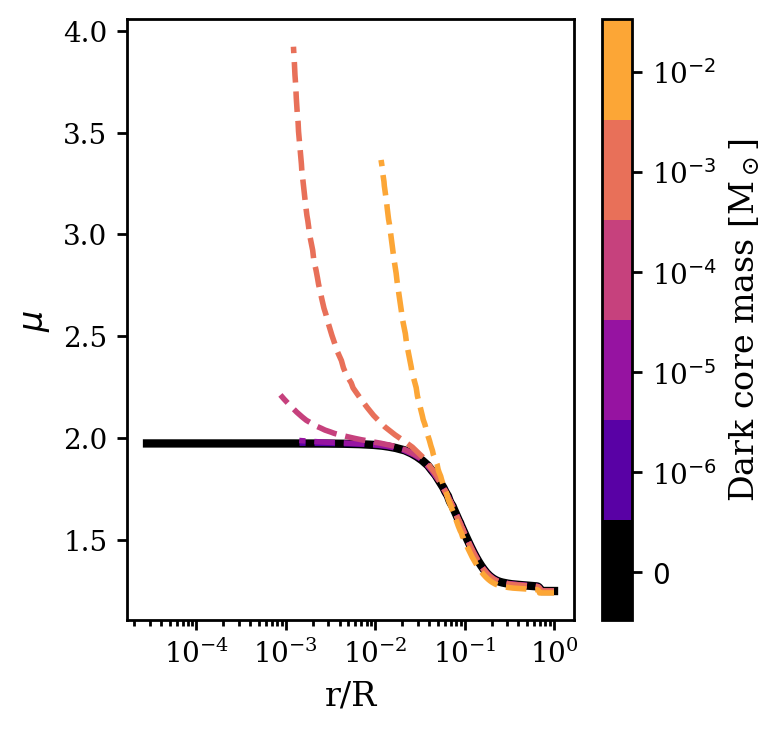

In [27]:
def mean_molecular_weight(X, Y, Z, A_Z=16):
    return (X/1 + Y/4 + Z/A_Z)**-1

fig = plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    mu = mean_molecular_weight(df['x_mass_fraction_H'], df['y_mass_fraction_He'], df['z_mass_fraction_metals'])
    #nabla_mu = np.gradient(np.log(mu), df['logP'])
    plt.plot(10**df.logR[:-3], mu[:-3], color=cmap(norm(mass)), 
            ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

cbar()
plt.xlabel('r/R')
plt.ylabel(r'$\mu$')
plt.semilogx()
#plt.semilogy()
#plt.ylim([1e-2, 0.3])

plt.tight_layout()
#plt.savefig('figs/nabla_mu.pdf')

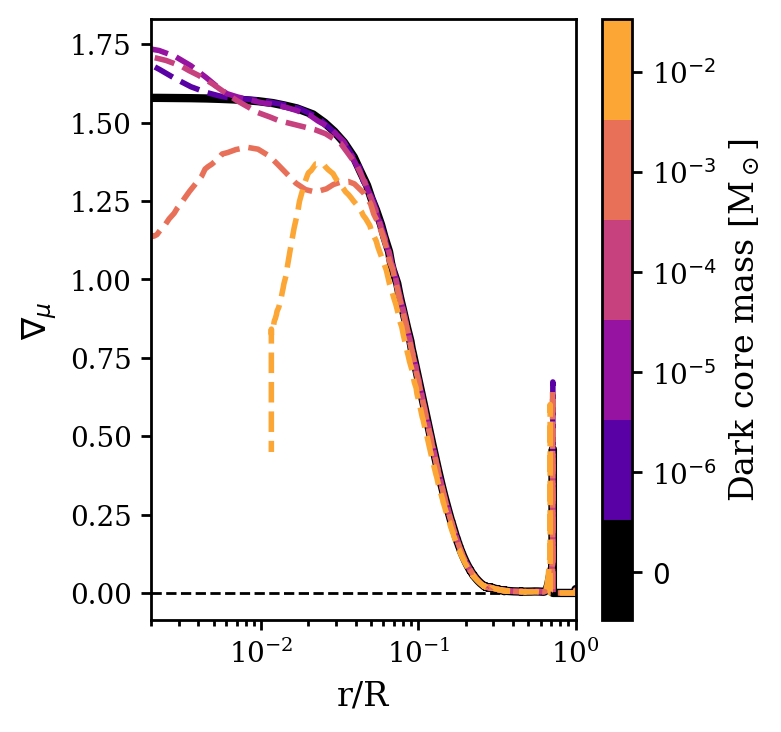

In [159]:
def mean_molecular_weight(X, Y, Z, A_Z=16):
    return (X/1 + Y/4 + Z/A_Z)**-1

fig = plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    mu = mean_molecular_weight(df['x_mass_fraction_H'], df['y_mass_fraction_He'], df['z_mass_fraction_metals'])
    nabla_mu = np.gradient(np.log(mu), df['logP'])
    plt.plot(10**df.logR[:-3], nabla_mu[:-3], color=cmap(norm(mass)), 
            ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

cbar()
plt.xlabel('r/R')
plt.ylabel(r'$\nabla_\mu$')
plt.semilogx()
plt.xlim([2e-3, 1])
plt.axhline(0, ls='--', c='k', zorder=-1, lw=1)
#plt.semilogy()
#plt.ylim([1e-2, 0.3])

plt.tight_layout()
plt.savefig('figs/nabla_mu.pdf')

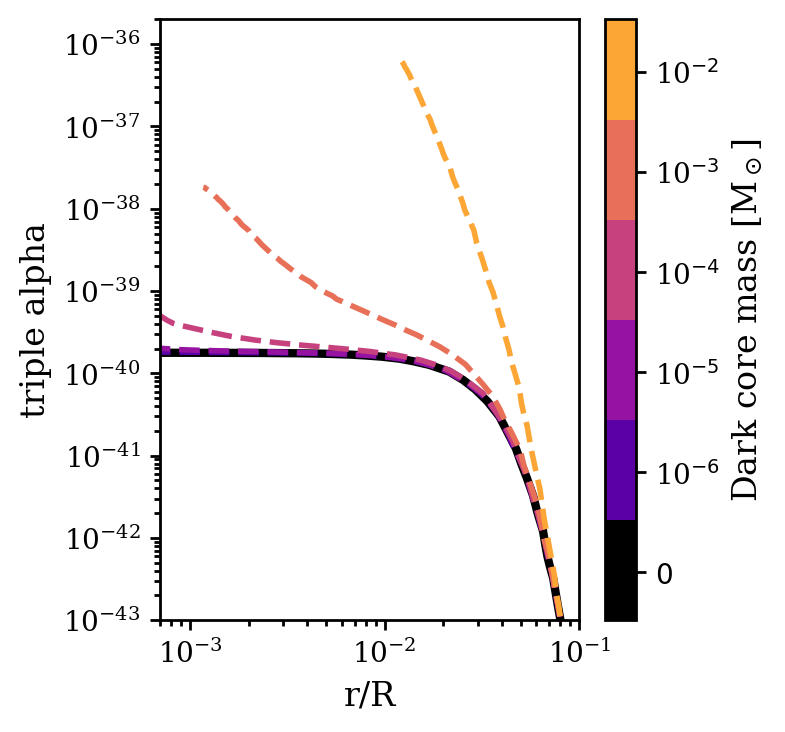

In [29]:
fig = plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    plt.plot(10**df.logR, df.tri_alpha, color=cmap(norm(mass)), 
            ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

cbar()
plt.xlabel('r/R')
plt.ylabel(r'triple alpha')
plt.xlim(7e-4, 0.1)
plt.ylim(1e-43, 2e-36)
#plt.ylim([-10, 800])
#plt.ylim([0.1, 800])
plt.semilogx()
plt.semilogy()

plt.tight_layout()
#plt.savefig('figs/abundance_Y.pdf')

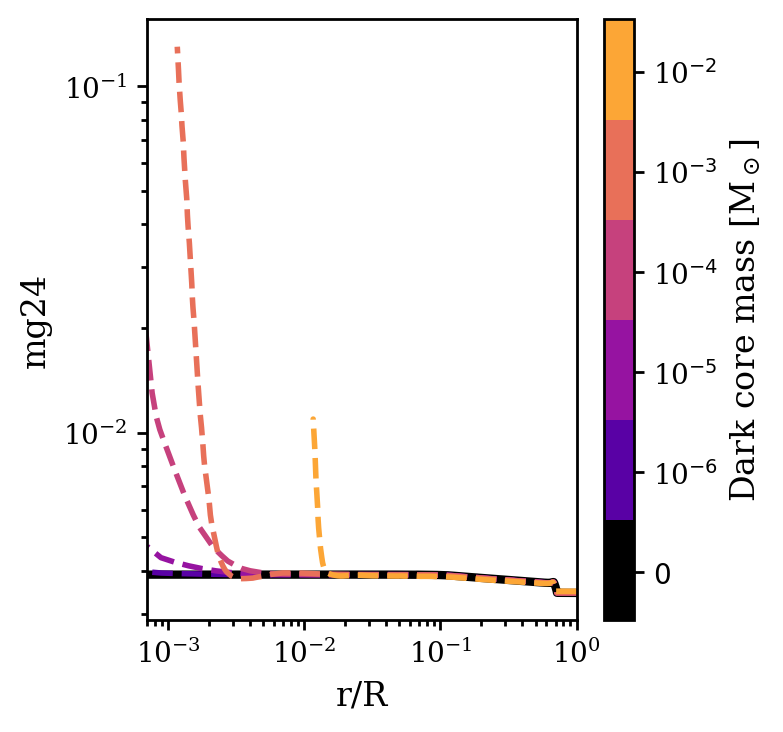

In [30]:
fig = plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    plt.plot(10**df.logR, df.mg24, color=cmap(norm(mass)), 
            ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

cbar()
plt.xlabel('r/R')
plt.ylabel(r'mg24')
plt.xlim(7e-4, 1)
#plt.ylim([-10, 800])
#plt.ylim([0.1, 800])
plt.semilogx()
plt.semilogy()
#plt.ylim([1e-3, 20])

plt.tight_layout()
#plt.savefig('figs/abundance_Y.pdf')

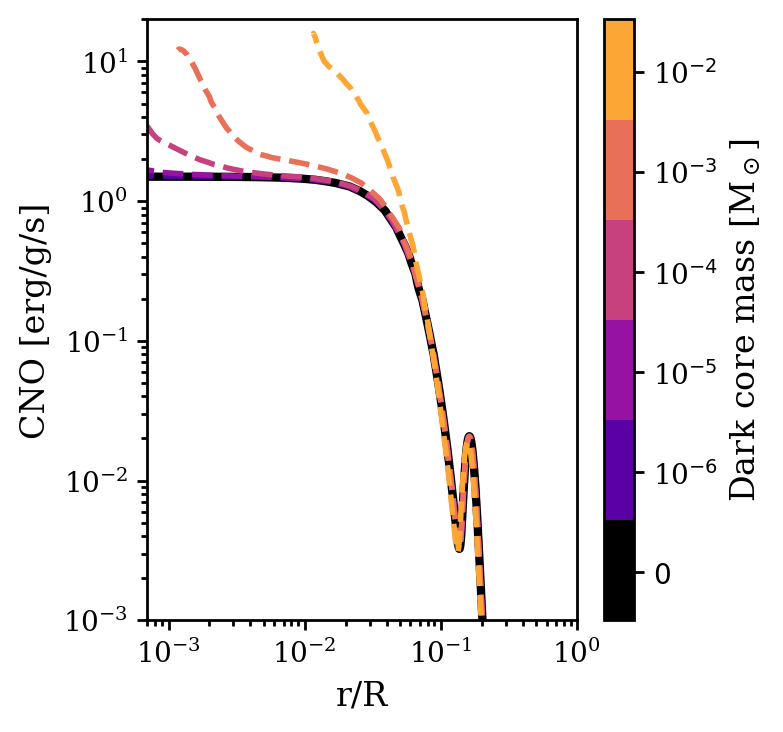

In [31]:
fig = plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    plt.plot(10**df.logR, df.cno, color=cmap(norm(mass)), 
            ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

cbar()
plt.xlabel('r/R')
plt.ylabel(r'CNO [erg/g/s]')
plt.xlim(7e-4, 1)
#plt.ylim([-10, 800])
#plt.ylim([0.1, 800])
plt.semilogx()
plt.semilogy()
plt.ylim([1e-3, 20])

plt.tight_layout()
plt.savefig('figs/nuc-cno.pdf')

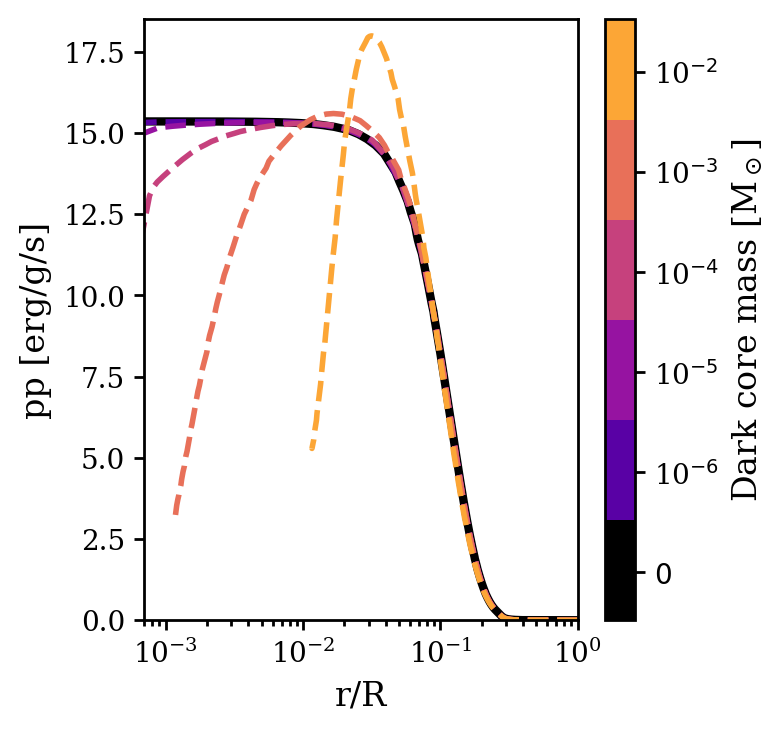

In [32]:
fig = plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    plt.plot(10**df.logR, df.pp, color=cmap(norm(mass)), 
            ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
    #plt.plot(10**df.logR, df.cno, color=cmap(norm(mass)), 
    #        ls=':' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

cbar()
plt.xlabel('r/R')
plt.ylabel(r'pp [erg/g/s]')
plt.xlim(7e-4, 1)
#plt.ylim([-10, 800])
#plt.ylim([0.1, 800])
plt.semilogx()
#plt.semilogy()
plt.ylim([0, 18.5])

plt.tight_layout()
plt.savefig('figs/nuc-pp.pdf')

In [33]:
Basu2009_data = """x c sigma_c x_rho rho sigma_rho
6.1949E-02 5.1170E+07 9.2178E+03 5.8884E-02 1.2078E+02 1.1601E-01
7.4948E-02 5.1169E+07 4.3834E+03 7.7225E-02 1.0532E+02 7.7585E-02
1.0052E-01 5.0803E+07 4.9108E+03 1.0208E-01 8.5937E+01 5.1525E-02
1.2733E-01 4.9858E+07 4.4274E+03 1.2706E-01 6.9226E+01 3.1670E-02
1.5208E-01 4.8559E+07 4.4193E+03 1.5162E-01 5.5510E+01 2.0105E-02
1.7636E-01 4.7033E+07 3.5829E+03 1.7709E-01 4.3772E+01 1.2053E-02
2.0184E-01 4.5316E+07 3.4470E+03 2.0233E-01 3.4221E+01 6.9189E-03
2.2746E-01 4.3569E+07 3.0592E+03 2.2730E-01 2.6514E+01 4.6064E-03
2.5253E-01 4.1897E+07 2.8858E+03 2.5277E-01 2.0234E+01 4.3910E-03
2.7771E-01 4.0301E+07 2.5884E+03 2.7803E-01 1.5355E+01 4.5718E-03
3.0320E-01 3.8798E+07 2.4506E+03 3.0333E-01 1.1570E+01 3.9911E-03
3.2847E-01 3.7395E+07 2.3018E+03 3.2879E-01 8.6838E+00 3.2633E-03
3.5370E-01 3.6090E+07 2.1119E+03 3.5403E-01 6.5346E+00 2.5846E-03
3.7912E-01 3.4866E+07 1.9529E+03 3.7946E-01 4.9123E+00 1.9819E-03
4.0439E-01 3.3710E+07 1.8638E+03 4.0474E-01 3.7160E+00 1.5338E-03
4.2970E-01 3.2629E+07 1.7383E+03 4.3006E-01 2.8201E+00 1.1410E-03
4.5504E-01 3.1604E+07 1.6411E+03 4.5535E-01 2.1521E+00 8.9351E-04
4.8031E-01 3.0634E+07 1.5152E+03 4.8063E-01 1.6517E+00 6.7778E-04
5.0566E-01 2.9712E+07 1.4385E+03 5.0592E-01 1.2737E+00 5.4124E-04
5.3096E-01 2.8822E+07 1.3808E+03 5.3121E-01 9.8850E-01 4.1931E-04
5.5630E-01 2.7972E+07 1.3146E+03 5.5651E-01 7.7054E-01 3.3861E-04
5.8160E-01 2.7130E+07 1.2604E+03 5.8181E-01 6.0445E-01 2.6438E-04
6.0693E-01 2.6311E+07 1.1919E+03 6.0711E-01 4.7634E-01 2.1495E-04
6.3223E-01 2.5483E+07 1.1390E+03 6.3243E-01 3.7756E-01 1.6995E-04
6.5754E-01 2.4637E+07 1.0619E+03 6.5772E-01 3.0095E-01 1.4047E-04
6.8283E-01 2.3706E+07 1.0045E+03 6.8304E-01 2.4197E-01 1.1334E-04
7.0811E-01 2.2614E+07 9.3680E+02 7.0838E-01 1.9685E-01 9.3937E-05
7.3337E-01 2.1257E+07 8.9853E+02 7.3371E-01 1.6281E-01 7.8683E-05
7.5869E-01 1.9881E+07 8.7096E+02 7.5903E-01 1.3311E-01 6.5124E-05
7.8404E-01 1.8495E+07 7.7763E+02 7.8435E-01 1.0703E-01 5.4001E-05
8.0934E-01 1.7089E+07 7.3027E+02 8.0967E-01 8.4315E-02 4.3385E-05
8.3464E-01 1.5649E+07 6.8648E+02 8.3499E-01 6.4667E-02 3.4486E-05
8.5995E-01 1.4156E+07 6.1451E+02 8.6031E-01 4.7800E-02 2.6671E-05
8.8527E-01 1.2582E+07 5.7896E+02 8.8564E-01 3.3507E-02 1.9704E-05
9.1060E-01 1.0881E+07 5.9297E+02 9.1096E-01 2.1657E-02 1.4339E-05
9.3590E-01 8.9771E+06 5.5548E+02 9.3628E-01 1.2157E-02 9.5495E-06
9.5661E-01 7.1388E+06 4.9286E+02 9.5754E-01 5.9835E-03 6.2548E-06"""
Basu2009_DF = pd.DataFrame([x.split() for x in Basu2009_data.split('\n')[1:]], 
                   columns=[x for x in Basu2009_data.split('\n')[0].split()])
Basu2009_DF = Basu2009_DF.astype(float)
Basu2009_DF

x           c  sigma_c     x_rho         rho  sigma_rho
0   0.061949  51170000.0  9217.80  0.058884  120.780000   0.116010
1   0.074948  51169000.0  4383.40  0.077225  105.320000   0.077585
2   0.100520  50803000.0  4910.80  0.102080   85.937000   0.051525
3   0.127330  49858000.0  4427.40  0.127060   69.226000   0.031670
4   0.152080  48559000.0  4419.30  0.151620   55.510000   0.020105
5   0.176360  47033000.0  3582.90  0.177090   43.772000   0.012053
6   0.201840  45316000.0  3447.00  0.202330   34.221000   0.006919
7   0.227460  43569000.0  3059.20  0.227300   26.514000   0.004606
8   0.252530  41897000.0  2885.80  0.252770   20.234000   0.004391
9   0.277710  40301000.0  2588.40  0.278030   15.355000   0.004572
10  0.303200  38798000.0  2450.60  0.303330   11.570000   0.003991
11  0.328470  37395000.0  2301.80  0.328790    8.683800   0.003263
12  0.353700  36090000.0  2111.90  0.354030    6.534600   0.002585
13  0.379120  34866000.0  1952.90  0.379460    4.912300   0.001982
14  0.404390  33710000.0  1863.80  0.404740    3.716000   0.001534
15  0.429700  32629000.0  1738.30  0.430060    2.820100   0.001141
16  0.455040  31604000.0  1641.10  0.455350    2.152100   0.000894
17  0.480310  30634000.0  1515.20  0.480630    1.651700   0.000678
18  0.505660  29712000.0  1438.50  0.505920    1.273700   0.000541
19  0.530960  28822000.0  1380.80  0.531210    0.988500   0.000419
20  0.556300  27972000.0  1314.60  0.556510    0.770540   0.000339
21  0.581600  27130000.0  1260.40  0.581810    0.604450   0.000264
22  0.606930  26311000.0  1191.90  0.607110    0.476340   0.000215
23  0.632230  25483000.0  1139.00  0.632430    0.377560   0.000170
24  0.657540  24637000.0  1061.90  0.657720    0.300950   0.000140
25  0.682830  23706000.0  1004.50  0.683040    0.241970   0.000113
26  0.708110  22614000.0   936.80  0.708380    0.196850   0.000094
27  0.733370  21257000.0   898.53  0.733710    0.162810   0.000079
28  0.758690  19881000.0   870.96  0.759030    0.133110   0.000065
29  0.784040  18495000.0   777.63  0.784350    0.107030   0.000054
30  0.809340  17089000.0   730.27  0.809670    0.084315   0.000043
31  0.834640  15649000.0   686.48  0.834990    0.064667   0.000034
32  0.859950  14156000.0   614.51  0.860310    0.047800   0.000027
33  0.885270  12582000.0   578.96  0.885640    0.033507   0.000020
34  0.910600  10881000.0   592.97  0.910960    0.021657   0.000014
35  0.935900   8977100.0   555.48  0.936280    0.012157   0.000010
36  0.956610   7138800.0   492.86  0.957540    0.005984   0.000006

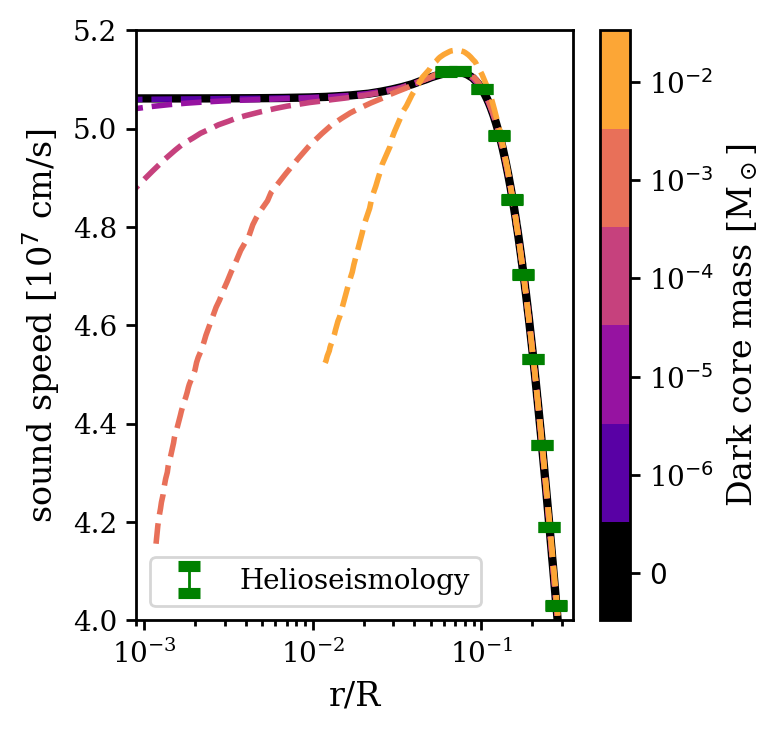

In [34]:
plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    plt.plot(10**df.logR, df.csound/10**7, color=cmap(norm(mass)), 
            ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

cbar()
plt.xlabel('r/R')
plt.ylabel(r'sound speed [10$^7$ cm/s]')
plt.xlim(9e-4, 0.35)
plt.ylim([4, 5.2])
plt.semilogx()

plt.errorbar(Basu2009_DF.x, Basu2009_DF.c/10**7, yerr=Basu2009_DF.sigma_c/10**7, ls='',
            c='green', ecolor='green', elinewidth=1, capsize=4, 
             barsabove=1, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=4,
            zorder=999, label='Helioseismology')
plt.legend(loc='lower left')
plt.tight_layout()

plt.savefig('figs/csound.pdf')

In [35]:
Basu2009_DF

x           c  sigma_c     x_rho         rho  sigma_rho
0   0.061949  51170000.0  9217.80  0.058884  120.780000   0.116010
1   0.074948  51169000.0  4383.40  0.077225  105.320000   0.077585
2   0.100520  50803000.0  4910.80  0.102080   85.937000   0.051525
3   0.127330  49858000.0  4427.40  0.127060   69.226000   0.031670
4   0.152080  48559000.0  4419.30  0.151620   55.510000   0.020105
5   0.176360  47033000.0  3582.90  0.177090   43.772000   0.012053
6   0.201840  45316000.0  3447.00  0.202330   34.221000   0.006919
7   0.227460  43569000.0  3059.20  0.227300   26.514000   0.004606
8   0.252530  41897000.0  2885.80  0.252770   20.234000   0.004391
9   0.277710  40301000.0  2588.40  0.278030   15.355000   0.004572
10  0.303200  38798000.0  2450.60  0.303330   11.570000   0.003991
11  0.328470  37395000.0  2301.80  0.328790    8.683800   0.003263
12  0.353700  36090000.0  2111.90  0.354030    6.534600   0.002585
13  0.379120  34866000.0  1952.90  0.379460    4.912300   0.001982
14  0.404390  33710000.0  1863.80  0.404740    3.716000   0.001534
15  0.429700  32629000.0  1738.30  0.430060    2.820100   0.001141
16  0.455040  31604000.0  1641.10  0.455350    2.152100   0.000894
17  0.480310  30634000.0  1515.20  0.480630    1.651700   0.000678
18  0.505660  29712000.0  1438.50  0.505920    1.273700   0.000541
19  0.530960  28822000.0  1380.80  0.531210    0.988500   0.000419
20  0.556300  27972000.0  1314.60  0.556510    0.770540   0.000339
21  0.581600  27130000.0  1260.40  0.581810    0.604450   0.000264
22  0.606930  26311000.0  1191.90  0.607110    0.476340   0.000215
23  0.632230  25483000.0  1139.00  0.632430    0.377560   0.000170
24  0.657540  24637000.0  1061.90  0.657720    0.300950   0.000140
25  0.682830  23706000.0  1004.50  0.683040    0.241970   0.000113
26  0.708110  22614000.0   936.80  0.708380    0.196850   0.000094
27  0.733370  21257000.0   898.53  0.733710    0.162810   0.000079
28  0.758690  19881000.0   870.96  0.759030    0.133110   0.000065
29  0.784040  18495000.0   777.63  0.784350    0.107030   0.000054
30  0.809340  17089000.0   730.27  0.809670    0.084315   0.000043
31  0.834640  15649000.0   686.48  0.834990    0.064667   0.000034
32  0.859950  14156000.0   614.51  0.860310    0.047800   0.000027
33  0.885270  12582000.0   578.96  0.885640    0.033507   0.000020
34  0.910600  10881000.0   592.97  0.910960    0.021657   0.000014
35  0.935900   8977100.0   555.48  0.936280    0.012157   0.000010
36  0.956610   7138800.0   492.86  0.957540    0.005984   0.000006

In [36]:
def compute_fwhm(radius, kernel):
    max_val = np.max(kernel)
    half_max_val = max_val / 2
    
    above_half_max = np.where(kernel >= half_max_val)[0]
    fwhm = np.abs(radius[above_half_max[-1]] - radius[above_half_max[0]])
    
    return fwhm

data = pd.read_csv('avker.bison13', delim_whitespace=True, header=None)

radius = data.iloc[:, 0].values
kernels = data.iloc[:, 1:].values

results = {'x0': [], 'FWHM': []}

for kernel in kernels.T:
    x0 = radius[np.argmax(kernel)]
    fwhm = compute_fwhm(radius, kernel)
    
    results['x0'].append(x0)
    results['FWHM'].append(fwhm)

FWHM_DF = pd.DataFrame(results)
FWHM_DF

/tmp/ipykernel_1943715/3015153253.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('avker.bison13', delim_whitespace=True, header=None)


x0      FWHM
0   0.058080  0.061059
1   0.064010  0.068691
2   0.074896  0.076859
3   0.089151  0.078972
4   0.101714  0.076848
..       ...       ...
71  0.946763  0.019158
72  0.958496  0.019051
73  0.969463  0.018601
74  0.978295  0.017146
75  0.979452  0.016851

[76 rows x 2 columns]

In [37]:
def find_closest_x(x, x0_values, fwhm_values):
    closest_x0_indices = [np.argmin(np.abs(x0_values - xi)) for xi in x]
    closest_fwhm_values = [fwhm_values[idx] for idx in closest_x0_indices]
    return closest_fwhm_values
Basu2009_DF['FWHM'] = find_closest_x(Basu2009_DF['x'].values, FWHM_DF['x0'].values, FWHM_DF['FWHM'].values)

In [38]:
Basu2009_DF

x           c  sigma_c     x_rho         rho  sigma_rho      FWHM
0   0.061949  51170000.0  9217.80  0.058884  120.780000   0.116010  0.068691
1   0.074948  51169000.0  4383.40  0.077225  105.320000   0.077585  0.076859
2   0.100520  50803000.0  4910.80  0.102080   85.937000   0.051525  0.076848
3   0.127330  49858000.0  4427.40  0.127060   69.226000   0.031670  0.077744
4   0.152080  48559000.0  4419.30  0.151620   55.510000   0.020105  0.075607
5   0.176360  47033000.0  3582.90  0.177090   43.772000   0.012053  0.072934
6   0.201840  45316000.0  3447.00  0.202330   34.221000   0.006919  0.070499
7   0.227460  43569000.0  3059.20  0.227300   26.514000   0.004606  0.067603
8   0.252530  41897000.0  2885.80  0.252770   20.234000   0.004391  0.064589
9   0.277710  40301000.0  2588.40  0.278030   15.355000   0.004572  0.061185
10  0.303200  38798000.0  2450.60  0.303330   11.570000   0.003991  0.059232
11  0.328470  37395000.0  2301.80  0.328790    8.683800   0.003263  0.057037
12  0.353700  36090000.0  2111.90  0.354030    6.534600   0.002585  0.054260
13  0.379120  34866000.0  1952.90  0.379460    4.912300   0.001982  0.052665
14  0.404390  33710000.0  1863.80  0.404740    3.716000   0.001534  0.049416
15  0.429700  32629000.0  1738.30  0.430060    2.820100   0.001141  0.049154
16  0.455040  31604000.0  1641.10  0.455350    2.152100   0.000894  0.047122
17  0.480310  30634000.0  1515.20  0.480630    1.651700   0.000678  0.044937
18  0.505660  29712000.0  1438.50  0.505920    1.273700   0.000541  0.044311
19  0.530960  28822000.0  1380.80  0.531210    0.988500   0.000419  0.043573
20  0.556300  27972000.0  1314.60  0.556510    0.770540   0.000339  0.040807
21  0.581600  27130000.0  1260.40  0.581810    0.604450   0.000264  0.039666
22  0.606930  26311000.0  1191.90  0.607110    0.476340   0.000215  0.038330
23  0.632230  25483000.0  1139.00  0.632430    0.377560   0.000170  0.036740
24  0.657540  24637000.0  1061.90  0.657720    0.300950   0.000140  0.034906
25  0.682830  23706000.0  1004.50  0.683040    0.241970   0.000113  0.035115
26  0.708110  22614000.0   936.80  0.708380    0.196850   0.000094  0.032308
27  0.733370  21257000.0   898.53  0.733710    0.162810   0.000079  0.031658
28  0.758690  19881000.0   870.96  0.759030    0.133110   0.000065  0.028253
29  0.784040  18495000.0   777.63  0.784350    0.107030   0.000054  0.026018
30  0.809340  17089000.0   730.27  0.809670    0.084315   0.000043  0.024977
31  0.834640  15649000.0   686.48  0.834990    0.064667   0.000034  0.022127
32  0.859950  14156000.0   614.51  0.860310    0.047800   0.000027  0.020303
33  0.885270  12582000.0   578.96  0.885640    0.033507   0.000020  0.018722
34  0.910600  10881000.0   592.97  0.910960    0.021657   0.000014  0.016165
35  0.935900   8977100.0   555.48  0.936280    0.012157   0.000010  0.013067
36  0.956610   7138800.0   492.86  0.957540    0.005984   0.000006  0.019051

In [39]:
columns = ['x', 'c', 'rho', 'A1', 'A2', 'A3', 'A4', 'A5']
BP04 = pd.read_csv('BP04.dat', delim_whitespace=True, names=columns, skiprows=1)
BP04

/tmp/ipykernel_1943715/3125898499.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  BP04 = pd.read_csv('BP04.dat', delim_whitespace=True, names=columns, skiprows=1)


x           c           rho          A1           A2        A3  \
0     1.001225    710803.7  1.279453e-10    0.996334  3769.654000  1.602867   
1     1.001222    710778.6  1.302147e-10    0.996342  3769.931000  1.603559   
2     1.001219    710756.2  1.325065e-10    0.996351  3770.179000  1.604243   
3     1.001217    710736.2  1.348209e-10    0.996359  3770.402000  1.604919   
4     1.001214    710717.4  1.371581e-10    0.996367  3770.612000  1.605582   
...        ...         ...           ...         ...          ...       ...   
2697  0.007009  50560650.0  1.530466e+02  108.713000     0.003984  1.665368   
2698  0.006903  50560220.0  1.530644e+02  108.715200     0.003865  1.665368   
2699  0.006799  50559810.0  1.530817e+02  108.716900     0.003749  1.665368   
2700  0.006696  50559400.0  1.530985e+02  108.718200     0.003636  1.665368   
2701  0.006595  50559010.0  1.531148e+02  108.718900     0.003527  1.665368   

               A4            A5  
0     2442.556000  2.735175e-10  
1     2442.385000  2.783665e-10  
2     2442.242000  2.832634e-10  
3     2442.123000  2.882085e-10  
4     2442.014000  2.932023e-10  
...           ...           ...  
2697     0.003785  2.998523e+00  
2698     0.003671  2.998812e+00  
2699     0.003561  2.999104e+00  
2700     0.003455  2.999399e+00  
2701     0.003350  2.999697e+00  

[2702 rows x 8 columns]

In [40]:
S.x

array([1.00071255e+00, 1.00070468e+00, 1.00069676e+00, ...,
       1.40979085e-03, 1.39108313e-03, 1.43680335e-60])

In [41]:
S.x[S.rho<=1]

array([1.00071255, 1.00070468, 1.00069676, ..., 0.53213759, 0.53111689,
       0.5300967 ])

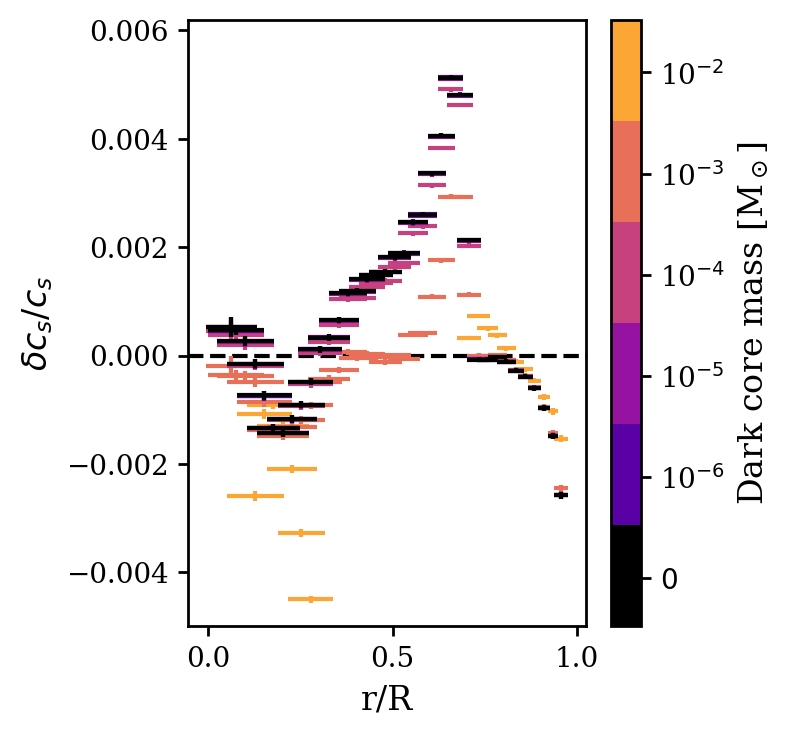

In [42]:
#gyre0 = gyre.load_gyre('dark-core-calibrate/LOGS/solar.data.GYRE')
#gyre3 = gyre.load_gyre('dark-core-calibrate/griddense/LOGS_-3.0/solar.data.GYRE')
#gyre3 = gyre.load_gyre('dark-core-calibrate/LOGS/solar.data.GYRE')
#gyrs6 = [gyre0, gyre6, gyre5, gyre4, gyre3, gyre2]

#plt.figure(figsize=(10, 8))
fig = plt.figure(figsize=(width,height))

for mass, df in zip(masses[::-1], gyrs6[::-1]):
#for mass, df in zip([1e-8, 1e-3], [gyrs6[0], gyrs6[-2]]):
    #if mass != 1e-3 and mass != 1e-8: 
    #    continue
    interp_func = interp1d(df.x, df.cs, bounds_error=False, fill_value=np.nan)
    interp_csound = interp_func(Basu2009_DF['x'])
    relative_diff = (Basu2009_DF['c'] - interp_csound) / Basu2009_DF['c']
    
    #plt.plot(Basu2009_DF['x'], relative_diff, color=cmap(norm(mass)),
    #         ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
    plt.errorbar(Basu2009_DF.x, relative_diff, 
                 yerr=Basu2009_DF.sigma_c / Basu2009_DF.c, 
                 xerr=Basu2009_DF.FWHM,
                 ls='', c=cmap(norm(mass)), 
                 mec='k',
             #capsize=5 if mass > 1e-8 else 6, 
                 zorder=999999, label=mass)

"""
interp_func = interp1d(S.x, S.cs, bounds_error=False, fill_value=np.nan)
interp_csound = interp_func(Basu2009_DF['x'])
relative_diff = (Basu2009_DF['c'] - interp_csound) / Basu2009_DF['c']
plt.errorbar(Basu2009_DF.x, relative_diff, 
             yerr=Basu2009_DF.sigma_c / Basu2009_DF.c, 
             xerr=Basu2009_DF.FWHM, 
             ls='', c='darkgreen', zorder=999, label='Model S')
"""

"""
interp_func = interp1d(BP04.x, BP04.c, bounds_error=False, fill_value=np.nan)
interp_csound = interp_func(Basu2009_DF['x'])
relative_diff = (Basu2009_DF['c'] - interp_csound) / Basu2009_DF['c']
plt.errorbar(Basu2009_DF.x, relative_diff, 
             yerr=Basu2009_DF.sigma_c / Basu2009_DF.c, 
             xerr=Basu2009_DF.FWHM, 
             ls='', c='purple', zorder=999, label='BP04')
"""

"""
interp_func = interp1d(mrg.x, mrg.cs, bounds_error=False, fill_value=np.nan)
interp_csound = interp_func(Basu2009_DF['x'])
relative_diff = (Basu2009_DF['c'] - interp_csound) / Basu2009_DF['c']
plt.errorbar(Basu2009_DF.x, relative_diff, yerr=Basu2009_DF.sigma_c / Basu2009_DF.c, ls='', c='red', 
         capsize=5 if mass > 1e-8 else 6, zorder=999, label='MRG')
"""

"""
interp_func = interp1d(tmp.x, tmp.cs, bounds_error=False, fill_value=np.nan)
interp_csound = interp_func(Basu2009_DF['x'])
relative_diff = (Basu2009_DF['c'] - interp_csound) / Basu2009_DF['c']
plt.errorbar(Basu2009_DF.x, relative_diff, yerr=Basu2009_DF.sigma_c / Basu2009_DF.c,  
             xerr=Basu2009_DF.FWHM, 
             ls='', c='blue', zorder=99999999, label='tmp')
"""

plt.axhline(0, ls='--', c='k')
cbar()

plt.xlabel('r/R')
plt.ylabel(r'$\delta c_s/c_s$')
plt.ylim([-5e-3, 6.2e-3])
plt.tight_layout()
plt.show()


In [43]:
((Basu2009_DF.sigma_c / Basu2009_DF.c)*100).median()

0.00532746942903552

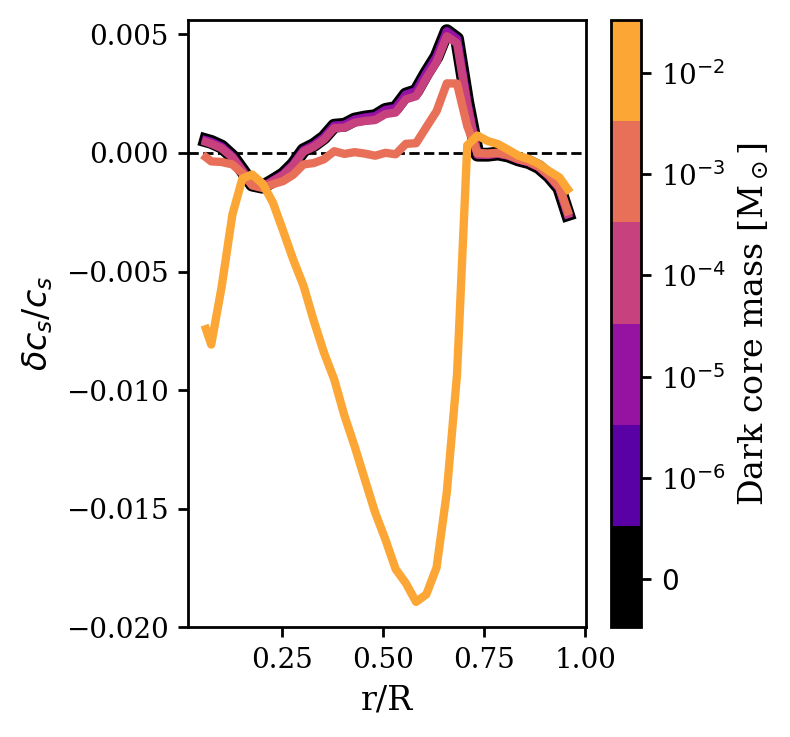

In [44]:
plt.figure(figsize=(width, height))

for mass, df in zip(masses, gyrs6):
    interp_func = interp1d(df.x, df.cs, bounds_error=False, fill_value=np.nan)
    interp_csound = interp_func(Basu2009_DF['x'])
    relative_diff = (Basu2009_DF['c'] - interp_csound) / Basu2009_DF['c']
    plt.plot(Basu2009_DF['x'], relative_diff, c=cmap(norm(mass)), lw=5 if mass <= 1e-8 else 3)

"""
interp_func = interp1d(S.x, S.cs, bounds_error=False, fill_value=np.nan)
interp_csound = interp_func(Basu2009_DF['x'])
relative_diff = (Basu2009_DF['c'] - interp_csound) / Basu2009_DF['c']
plt.plot(Basu2009_DF.x, relative_diff, c='darkgreen', lw=2, label='Model S')

interp_func = interp1d(BP04.x, BP04.c, bounds_error=False, fill_value=np.nan)
interp_csound = interp_func(Basu2009_DF['x'])
relative_diff = (Basu2009_DF['c'] - interp_csound) / Basu2009_DF['c']
plt.plot(Basu2009_DF.x, relative_diff, c='purple', lw=2, label='BP04')
"""

cbar()

plt.axhline(0, ls='--', c='k', lw=1, zorder=-999)
plt.xlabel('r/R')
plt.ylabel(r'$\delta c_s/c_s$')
plt.ylim([-20e-3, 5.6e-3])
#plt.legend()
plt.tight_layout()
plt.show()

In [45]:
dfs53 = [m0, m6, m5, m4, m3]
gyrs53 = [gyre0, gyre5, gyre4, gyre3]
masses53 = [1e-8, 1e-5, 1e-4, 1e-3]
colors53 = plt.cm.plasma(np.linspace(0.1, 0.7, len(masses53)))
colors53[0, :] = [0, 0, 0, 1]
cmap53 = ListedColormap(colors53)
norm53 = LogNorm(vmin=1e-6, vmax=1e-2)

def cbar_53():
    tick_locs = [3e-6, 3e-5, 3e-4, 3e-3]
    tick_labels = [r'$10^{' + str(int(np.log10(m))) + r'}$' if m > 1e-8 else r'$0$' for m in masses53]
    sm = plt.cm.ScalarMappable(cmap=cmap53, norm=norm53)
    cbar = plt.colorbar(sm, ax=plt.gca(), ticks=tick_locs)
    cbar.ax.set_yticklabels(tick_labels)
    cbar.ax.minorticks_off()
    cbar.set_label(r'Dark core mass [M$_\odot$]')

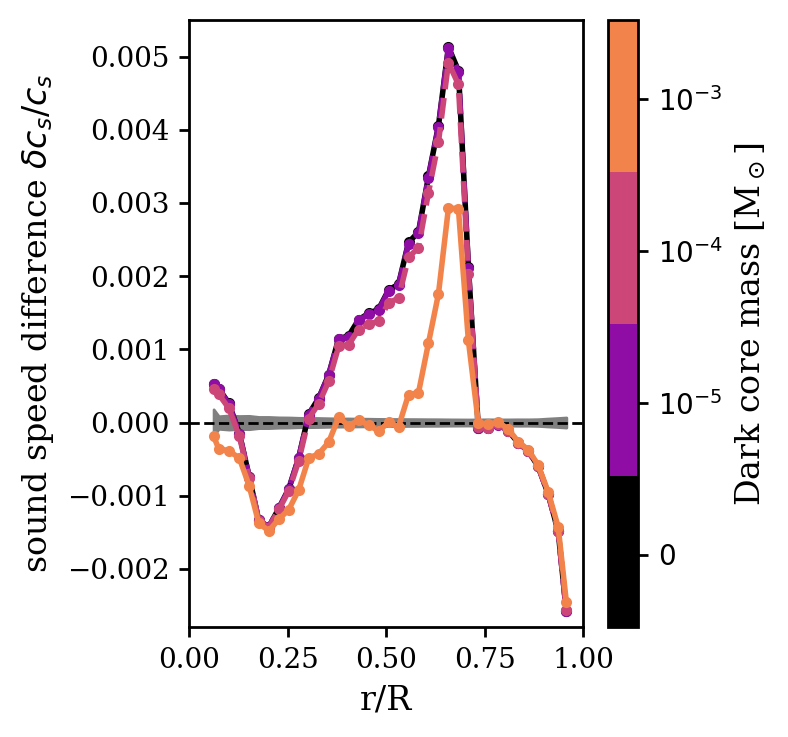

In [46]:
plt.figure(figsize=(width, height))

for mass, df in zip(masses53, gyrs53):
    interp_func = interp1d(df.x, df.cs, bounds_error=False, fill_value=np.nan)
    interp_csound = interp_func(Basu2009_DF['x'])
    relative_diff = (Basu2009_DF['c'] - interp_csound) / Basu2009_DF['c']
    plt.plot(Basu2009_DF['x'], relative_diff, c=cmap53(norm53(mass)), lw=2 if mass <= 1e-8 else 2,
            ls='--' if mass > 1e-8 and mass != 1e-3 else '-', marker='.')

cbar_53()

plt.fill_between(Basu2009_DF['x'], Basu2009_DF.sigma_c / Basu2009_DF.c, color='gray', zorder=-999)
plt.fill_between(Basu2009_DF['x'], -Basu2009_DF.sigma_c / Basu2009_DF.c, color='gray', zorder=-999)

plt.axhline(0, ls='--', c='k', lw=1, zorder=-999)
plt.xlabel('r/R')
plt.ylabel(r'sound speed difference $\delta c_s/c_s$')
#plt.ylim([-20e-3, 5.6e-3])
plt.xlim([0, 1])
plt.ylim(-2.8e-3, 5.5e-3)
#plt.legend()
plt.tight_layout()
#plt.show()

plt.savefig('figs/dcs.pdf')

In [47]:
#gyre0 = gyre.load_gyre('dark-core-calibrate/LOGS/solar.data.GYRE')
gyrs_dense = [gyre0, 
              #gyre.load_gyre('dark-core-calibrate/grid/LOGS_-4/solar.data.GYRE'), 
              gyre.load_gyre('dark-core-calibrate/griddense2/LOGS_-3.2/solar.data.GYRE'), 
              gyre.load_gyre('dark-core-calibrate/griddense/LOGS_2.0/solar.data.GYRE'), 
              #gyre.load_gyre('dark-core-calibrate/griddense/LOGS_1.8/solar.data.GYRE'), 
              #gyre.load_gyre('dark-core-calibrate/griddense/LOGS_1.6/solar.data.GYRE'), 
              gyre.load_gyre('dark-core-calibrate/griddense/LOGS_1.4/solar.data.GYRE'), 
              #gyre.load_gyre('dark-core-calibrate/griddense/LOGS_1.2/solar.data.GYRE'), 
              gyre.load_gyre('dark-core-calibrate/griddense/LOGS_1.0/solar.data.GYRE'), 
              #gyre.load_gyre('dark-core-calibrate/griddense/LOGS_0.8/solar.data.GYRE')
             ]
mass_dense = [1e-8, 10**-3.2, 2e-3, 1.4e-3, 1.0e-3]




#gyrs_dense = [gyre0, 
#              gyre.load_gyre('dark-core-calibrate/griddense/LOGS_0.4/solar.data.GYRE'), 
#              gyre.load_gyre('dark-core-calibrate/griddense/LOGS_2.0/solar.data.GYRE'), 
#              gyre.load_gyre('dark-core-calibrate/griddense/LOGS_1.5/solar.data.GYRE'), 
#              gyre.load_gyre('dark-core-calibrate/griddense/LOGS_1.0/solar.data.GYRE')
#             ]
#mass_dense = [1e-8, 0.4e-3, 2e-3, 1.5e-3, 1.0e-3]


colors_dense = plt.cm.winter(np.linspace(0, 1, len(mass_dense)))
colors_dense[0, :] = [0, 0, 0, 1]
cmap_dense = ListedColormap(colors_dense)
#norm_dense = (vmin=5e-5, vmax=5e-3)
norm_dense = Normalize(vmin=0, vmax=2e-3)

def cbar_dense():
    #tick_locs = [0.1e-3, 0.5e-3, 1e-3, 5e-3, 10e-3]
    #tick_labels = [r'$10^{' + str(int(np.log10(m))) + r'}$' if m > 1e-8 else r'$0$' for m in [1e-8, 1e-4, 5e-4, 1e-3, 5e-3]]
    #tick_locs = np.array([0, 0.5, 1, 1.5, 2])*1e-3 #np.arange(0, 1e-3, 5) + 0.2e-3
    #tick_locs = np.array([0.15, 0.5, 0.8, 1.15, 1.5, 1.8])*1e-3 #np.arange(0, 1e-3, 5) + 0.2e-3
    #tick_locs = np.linspace(0, 2e-3, 5)+3e-4
    #tick_labels = [str((x-3e-4)/(1e-3)) for x in tick_locs]
    tick_locs = np.array([0.2, 0.6, 1, 1.4, 1.8])*1e-3
    tick_labels = ["0", "0.5", "1", "1.5", "2"]
    tick_labels[0] = "0"
    sm = plt.cm.ScalarMappable(cmap=cmap_dense, norm=norm_dense)
    cbar = plt.colorbar(sm, ax=plt.gca(), ticks=tick_locs)
    cbar.ax.set_yticklabels(tick_labels)
    cbar.ax.minorticks_off()
    cbar.set_label(r'Dark core mass [$10^{-3}$ M$_\odot$]')

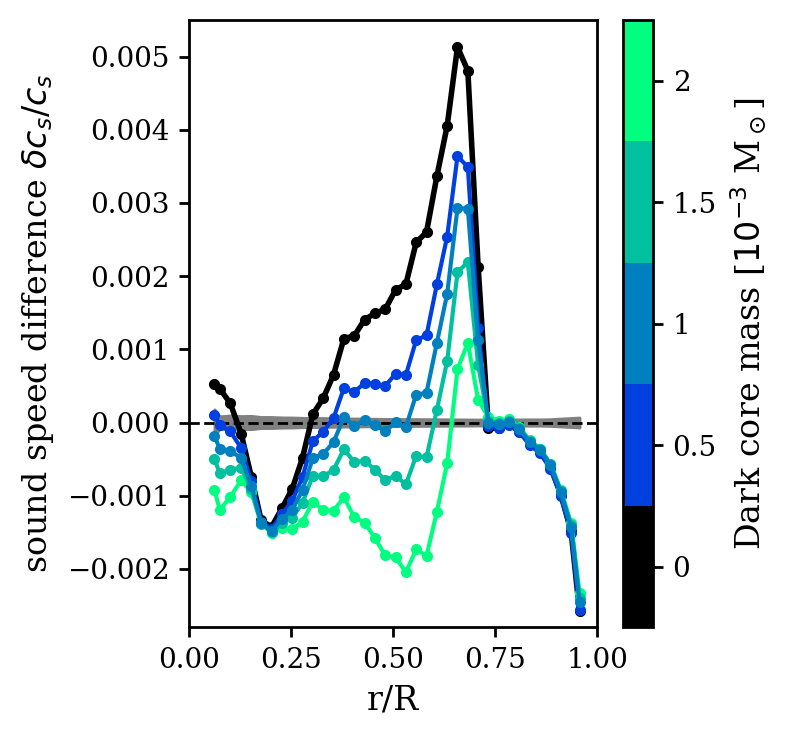

In [48]:
plt.figure(figsize=(width, height))

for mass, df in zip(mass_dense, gyrs_dense):
    interp_func = interp1d(df.x, df.cs, bounds_error=False, fill_value=np.nan)
    interp_csound = interp_func(Basu2009_DF['x'])
    relative_diff = (Basu2009_DF['c'] - interp_csound) / Basu2009_DF['c']
    plt.plot(Basu2009_DF['x'], relative_diff, c=cmap_dense(norm_dense(mass)), lw=2 if mass <= 1e-8 else 1.5,
            ls='-' if mass > 1e-8 and mass != 1e-3 else '-', marker='.')

#cbar_53()
cbar_dense()

plt.fill_between(Basu2009_DF['x'], Basu2009_DF.sigma_c / Basu2009_DF.c, color='gray', zorder=-999)
plt.fill_between(Basu2009_DF['x'], -Basu2009_DF.sigma_c / Basu2009_DF.c, color='gray', zorder=-999)

plt.axhline(0, ls='--', c='k', lw=1, zorder=-999)
plt.xlabel('r/R')
plt.ylabel(r'sound speed difference $\delta c_s/c_s$')
#plt.ylim([-20e-3, 5.6e-3])
plt.xlim([0, 1])
plt.ylim(-2.8e-3, 5.5e-3)
#plt.legend()
plt.tight_layout()
#plt.show()

plt.savefig('figs/dcs-dense.pdf')

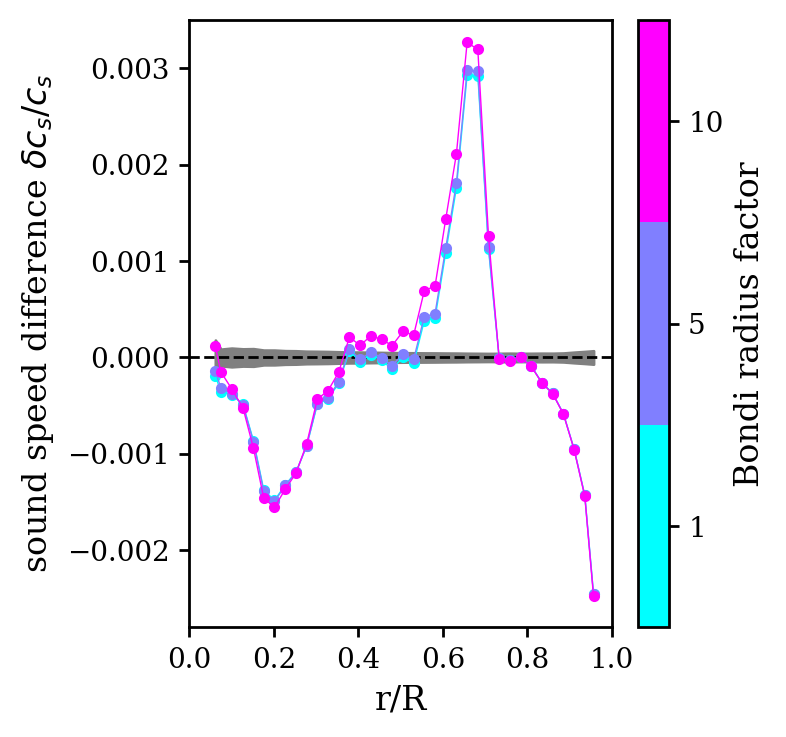

In [49]:
#gyrs_Rb = [gyre.load_gyre('dark-core-calibrate/griddense/LOGS_1.0/solar.data.GYRE'), 
#              gyre.load_gyre('dark-core-calibrate/gridRb/LOGS_0.9/solar.data.GYRE'), 
#              gyre.load_gyre('dark-core-calibrate/gridRb/LOGS_1.1/solar.data.GYRE'), 
#              gyre.load_gyre('dark-core-calibrate/gridRb/LOGS_1.25/solar.data.GYRE'), 
#              gyre.load_gyre('dark-core-calibrate/gridRb/LOGS_1.5/solar.data.GYRE')]
#mass_Rb = [1.0, 0.9, 1.1, 1.25, 1.5]

gyrs_Rb = [#gyre.load_gyre('dark-core-calibrate/gridRb/LOGS_0.9/solar.data.GYRE'), 
           gyre.load_gyre('dark-core-calibrate/griddense/LOGS_1.0/solar.data.GYRE'), 
           #gyre.load_gyre('dark-core-calibrate/gridRb/LOGS_2/solar.data.GYRE'), 
           gyre.load_gyre('dark-core-calibrate/gridRb/LOGS_5/solar.data.GYRE'), 
           gyre.load_gyre('dark-core-calibrate/gridRb/LOGS_10/solar.data.GYRE')]
mass_Rb = [1, 5, 10]

colors_Rb = plt.cm.cool(np.linspace(0, 1, len(mass_Rb)))
#colors_dense[0, :] = [0, 0, 0, 1]
cmap_Rb = ListedColormap(colors_Rb)
#norm_Rb = Normalize(vmin=0.9, vmax=1.5)
norm_Rb = Normalize(vmin=1, vmax=10)

def cbar_Rb():
    tick_locs = np.array([2.5, 5.5, 8.5])
    tick_labels = ["1", "5", "10"]
    #tick_labels[0] = "0"
    sm = plt.cm.ScalarMappable(cmap=cmap_Rb, norm=norm_Rb)
    cbar = plt.colorbar(sm, ax=plt.gca(), ticks=tick_locs)
    cbar.ax.set_yticklabels(tick_labels)
    cbar.ax.minorticks_off()
    cbar.set_label(r'Bondi radius factor')

plt.figure(figsize=(width, height))

for mass, df in zip(mass_Rb, gyrs_Rb):
    interp_func = interp1d(df.x, df.cs, bounds_error=False, fill_value=np.nan)
    interp_csound = interp_func(Basu2009_DF['x'])
    relative_diff = (Basu2009_DF['c'] - interp_csound) / Basu2009_DF['c']
    plt.plot(Basu2009_DF['x'], relative_diff, c=cmap_Rb(norm_Rb(mass)), lw=0.5,
            ls='-', marker='.')

cbar_Rb()

plt.fill_between(Basu2009_DF['x'], Basu2009_DF.sigma_c / Basu2009_DF.c, color='gray', zorder=-999)
plt.fill_between(Basu2009_DF['x'], -Basu2009_DF.sigma_c / Basu2009_DF.c, color='gray', zorder=-999)

plt.axhline(0, ls='--', c='k', lw=1, zorder=-999)
plt.xlabel('r/R')
plt.ylabel(r'sound speed difference $\delta c_s/c_s$')
#plt.ylim([-20e-3, 5.6e-3])
plt.xlim([0, 1])
plt.ylim(-2.8e-3, 3.5e-3)
#plt.legend()
plt.tight_layout()
#plt.show()

plt.savefig('figs/dcs-Rb.pdf')

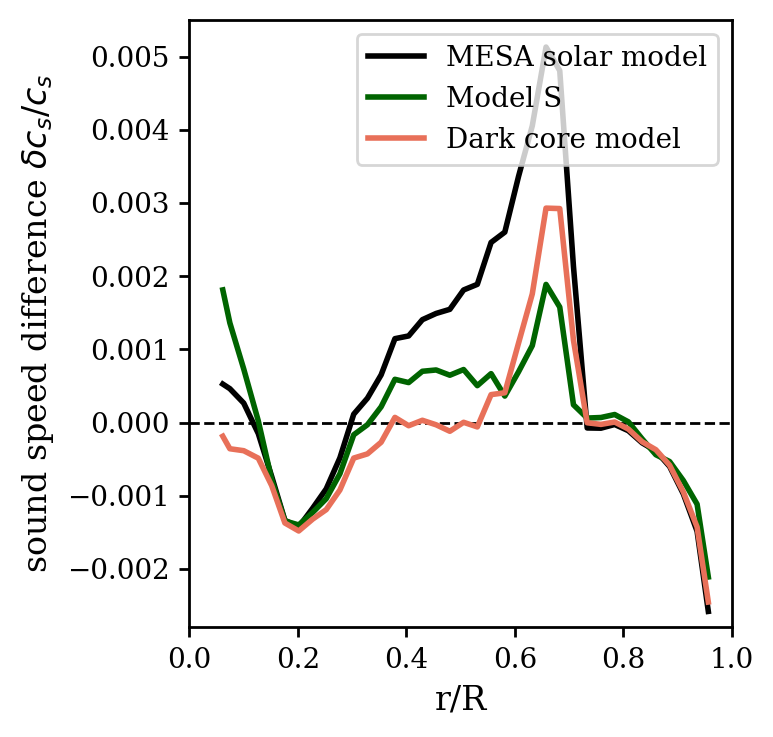

In [50]:
plt.figure(figsize=(width, height))

mass = 1e-8
df = gyre0
interp_func = interp1d(df.x, df.cs, bounds_error=False, fill_value=np.nan)
interp_csound = interp_func(Basu2009_DF['x'])
relative_diff = (Basu2009_DF['c'] - interp_csound) / Basu2009_DF['c']
plt.plot(Basu2009_DF['x'], relative_diff, c=cmap(norm(mass)), lw=2 if mass <= 1e-8 else 2,
        ls='--' if mass > 1e-8 and mass != 1e-3 else '-', label='MESA solar model')

interp_func = interp1d(S.x, S.cs, bounds_error=False, fill_value=np.nan)
interp_csound = interp_func(Basu2009_DF['x'])
relative_diff = (Basu2009_DF['c'] - interp_csound) / Basu2009_DF['c']
plt.plot(Basu2009_DF.x, relative_diff, c='darkgreen', lw=2, label='Model S')

mass = 1e-3
df = gyre3
interp_func = interp1d(df.x, df.cs, bounds_error=False, fill_value=np.nan)
interp_csound = interp_func(Basu2009_DF['x'])
relative_diff = (Basu2009_DF['c'] - interp_csound) / Basu2009_DF['c']
plt.plot(Basu2009_DF['x'], relative_diff, c=cmap(norm(mass)), lw=2 if mass <= 1e-8 else 2,
        ls='--' if mass > 1e-8 and mass != 1e-3 else '-', label='Dark core model')

plt.axhline(0, ls='--', c='k', lw=1, zorder=-999)
plt.xlabel('r/R')
plt.ylabel(r'sound speed difference $\delta c_s/c_s$')
plt.xlim([0, 1])
plt.ylim(-2.8e-3, 5.5e-3)
plt.legend()
plt.tight_layout()
#plt.show()

plt.savefig('figs/modelS.pdf')

In [51]:
cbar_63

<function __main__.cbar_63()>

In [52]:
abundances = dfs[0][['h1', 'h2', 'he3', 'he4', 'li7', 'be7', 'b8', 'c12', 'c13', 'n13', 'n14', 'n15', 'o14', 'o15', 'o16', 'o17', 'o18', 'f17', 'f18', 'f19', 'ne18', 'ne19', 'ne20', 'mg22', 'mg24']].max()
abundances[abundances > 1e-5]

h1      0.739736
he3     0.003176
he4     0.632792
c12     0.003158
c13     0.000547
n14     0.004799
o16     0.008865
o17     0.000547
o18     0.000021
ne20    0.001989
mg24    0.003893
dtype: float64

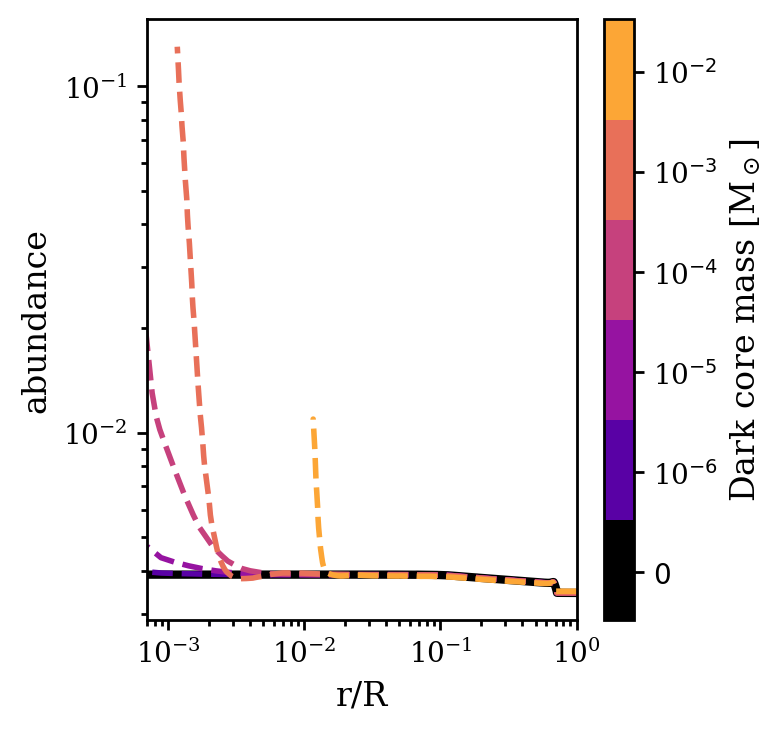

In [53]:
fig = plt.figure(figsize=(width,height))

# n14 

for mass, df in zip(masses, dfs):
    plt.plot(10**df.logR, df.mg24, color=cmap(norm(mass)), 
            ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
    #plt.plot(10**df.logR, df.cno, color=cmap(norm(mass)), 
    #        ls=':' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

cbar()
plt.xlabel('r/R')
plt.ylabel(r'abundance')
plt.xlim(7e-4, 1)
plt.semilogy()
plt.semilogx()
#plt.ylim([0, 18.5])

plt.tight_layout()

In [54]:
gyre0.x[(gyre0.data['nabla'] > gyre0.data['nabla_ad']).argmax()]

0.7167688268416021

Text(0, 0.5, '$\\nabla - \\nabla_{\\rm{ad}}$')

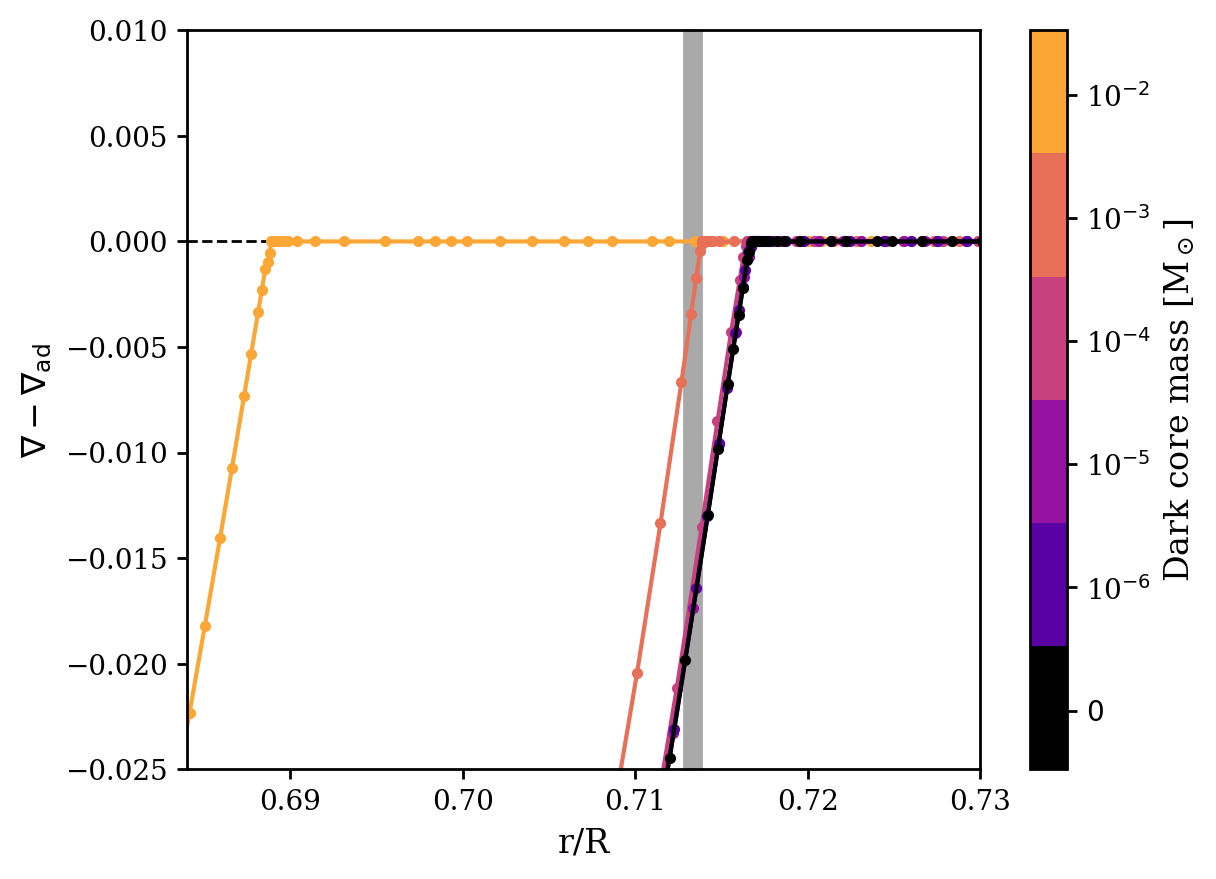

In [55]:
Rcz_solar = 0.7133 # 0.0005
Rcz_solar_e = 0.0005

for mass, df in zip(masses[::-1], gyrs6[::-1]):
    plt.plot(df.x, df.data['nabla']-df.data['nabla_ad'], '.-', c=cmap(norm(mass)))
#plt.plot(gyre3.x, gyre3.data['nabla'] - gyre3.data['nabla_ad'])

plt.axvspan(Rcz_solar-Rcz_solar_e, Rcz_solar+Rcz_solar_e, color='darkgray', zorder=-999)
#plt.axvline(Rcz_solar, ls='--', c='gray', zorder=-99)

cbar()

plt.axhline(0, ls='--', c='k', zorder=-999, lw=1)
plt.xlim([0.684, 0.73])
plt.xlabel('r/R')
plt.ylim([-0.025, 0.01])
plt.ylabel(r'$\nabla - \nabla_{\rm{ad}}$')

0.24340356960529208
0.24339820886551372
0.24331843951867024
0.24255333882684185
0.23497802885852875


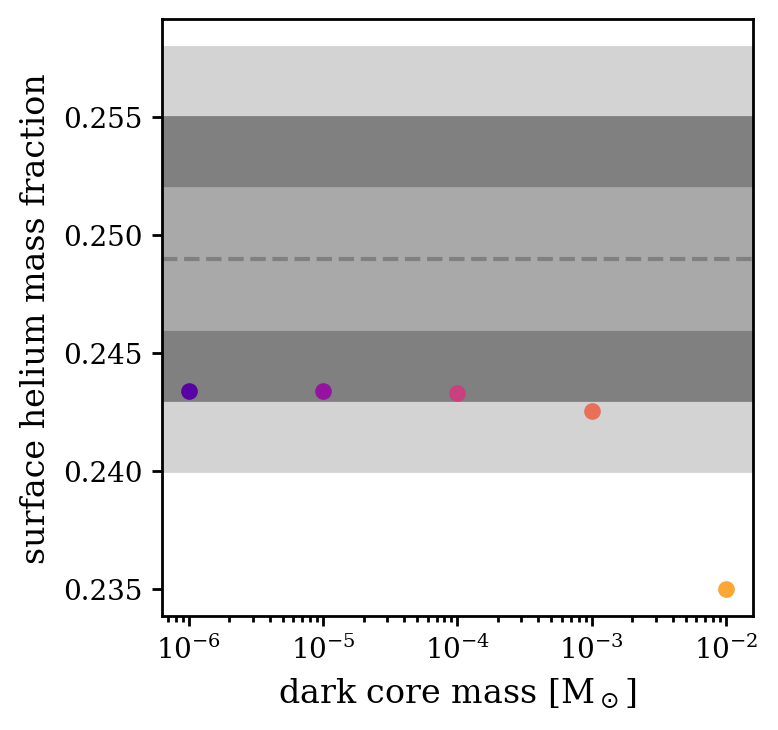

In [56]:
Ys_solar = 0.249
Ys_solar_e = 0.003

plt.figure(figsize=(width,height))

for mass, df in zip(masses[1:], dfs[1:]):
    print(df.y_mass_fraction_He[50])
    plt.plot(mass, df.y_mass_fraction_He[50], '.', c=cmap(norm(mass)), ms=10)

plt.axhspan(Ys_solar-Ys_solar_e, Ys_solar+Ys_solar_e, color='darkgray', zorder=-999)
plt.axhline(Ys_solar, ls='--', c='gray', zorder=-99)
plt.axhspan(Ys_solar-2*Ys_solar_e, Ys_solar+2*Ys_solar_e, color='gray', zorder=-9999)
plt.axhspan(Ys_solar-3*Ys_solar_e, Ys_solar+3*Ys_solar_e, color='lightgray', zorder=-99999)
plt.semilogx()

#cbar()
plt.xlabel(r'dark core mass [M$_\odot$]')
plt.ylabel(r'surface helium mass fraction')
#plt.xlim(9e-4, 0.35)
#plt.ylim([4, 5.2])
plt.tight_layout()

#plt.savefig('figs/csound.pdf')

In [57]:
((0.24340356960529208-0.23497802885852875)/0.23497802885852875)*100

3.5856717275622487

In [58]:
df = gyrs6[0]
(df.x[(df.data['nabla'] > df.data['nabla_ad']).argmax()] - 0.7133)/0.0005

6.9376536832042035

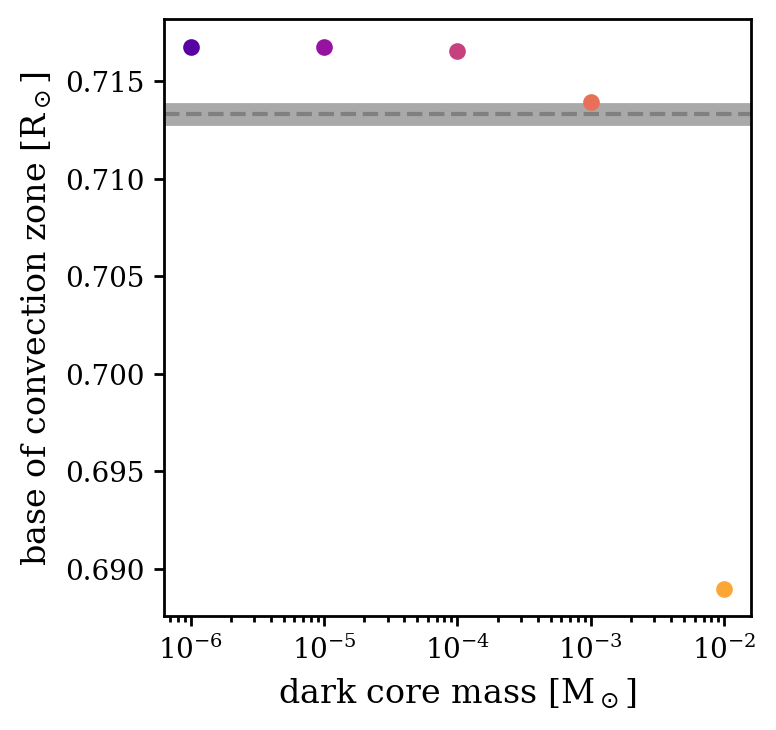

In [59]:
# base of the convection zone
Rcz_solar = 0.7133 # 0.0005
Rcz_solar_e = 0.0005


plt.figure(figsize=(width,height))

for mass, df in zip(masses[1:], gyrs6[1:]):
    plt.plot(mass, df.x[(df.data['nabla'] > df.data['nabla_ad']).argmax()], '.', c=cmap(norm(mass)), ms=10)
    #plt.plot(10**df.logR, df.csound/10**7, color=cmap(norm(mass)), 
    #        ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

plt.axhspan(Rcz_solar-Rcz_solar_e, Rcz_solar+Rcz_solar_e, color='darkgray', zorder=-999)
plt.axhline(Rcz_solar, ls='--', c='gray', zorder=-99)
plt.semilogx()

#cbar()
plt.xlabel(r'dark core mass [M$_\odot$]')
plt.ylabel(r'base of convection zone [R$_\odot$]')
#plt.xlim(9e-4, 0.35)
#plt.ylim([4, 5.2])
plt.tight_layout()

#plt.savefig('figs/csound.pdf')

## Nuclear reactions

In [60]:
avo = 6.02214076e23
au = 1.49597870700e13

0.4617152883552107
0.4616463511536934
0.4618133836357064
0.463052562540324
0.476332381307948
0.6294378449720623


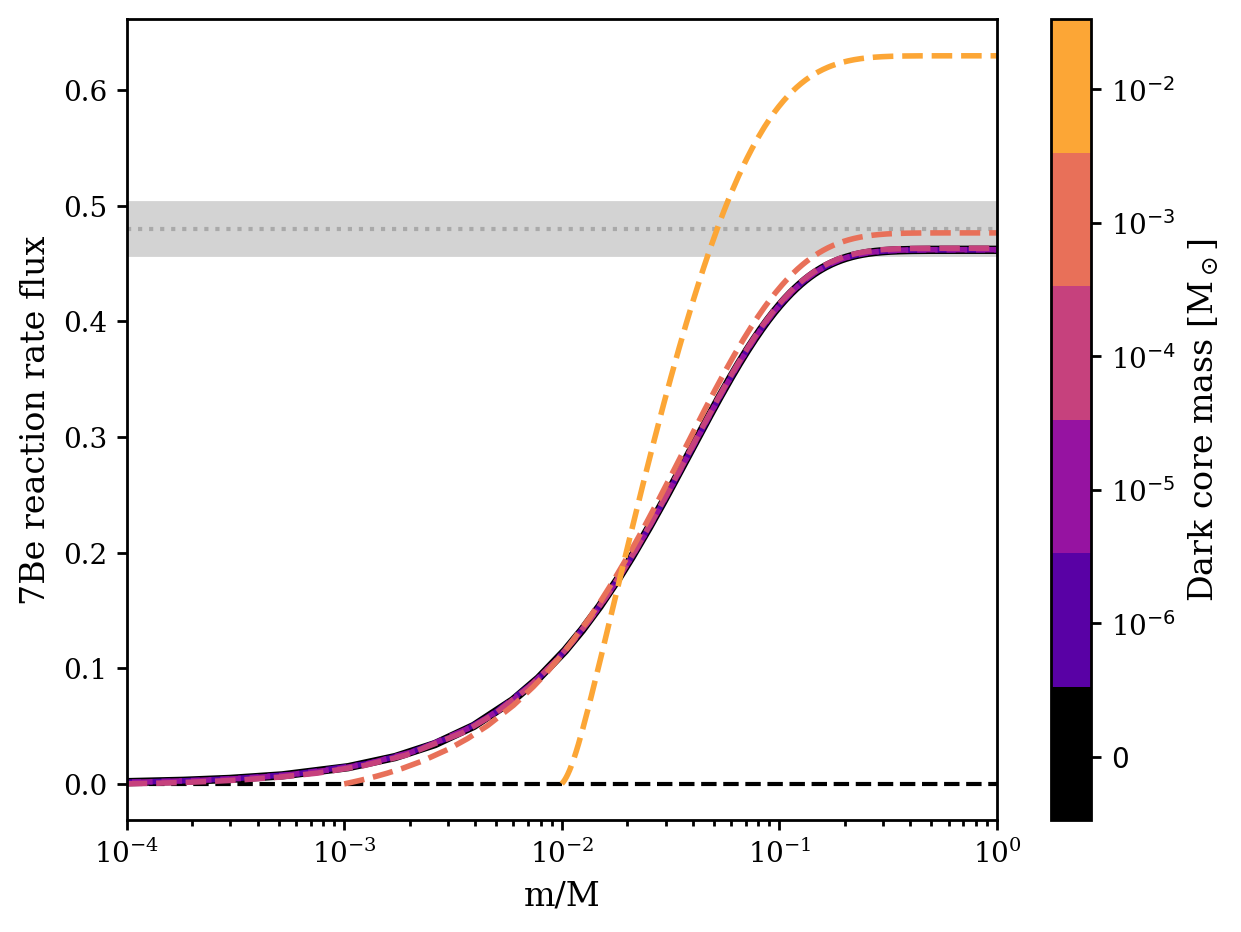

In [61]:
for mass, df in zip(masses, dfs):
    #if mass > 1e-6:
    #    continue
    plt.plot(df.mass[::-1], np.cumsum(df.screened_rate_r_be7_wk_li7[::-1] / (4*np.pi*au*au)/10e9), color=cmap(norm(mass)), 
             ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
    print(np.sum(df.screened_rate_r_be7_wk_li7 / (4*np.pi*au*au))/10e9)

plt.xlabel('m/M')
plt.ylabel(r'7Be reaction rate flux')
plt.semilogx()
#plt.semilogy()
plt.xlim([1e-4, 1e0])
#plt.ylim([1e2, 200])

cbar()

plt.axhline(0, ls='--', c='k', zorder=-999)
plt.axhline(0.480, ls=':', c='darkgray', zorder=-999)
plt.axhspan(0.480-0.023, 0.480+0.023, color='lightgray', zorder=-99999)

plt.tight_layout()

0.00044512717582748996
0.00044493981475421396
0.00044555893900400365
0.000450130358737792
0.0005011226526502621
0.0013977794683461744


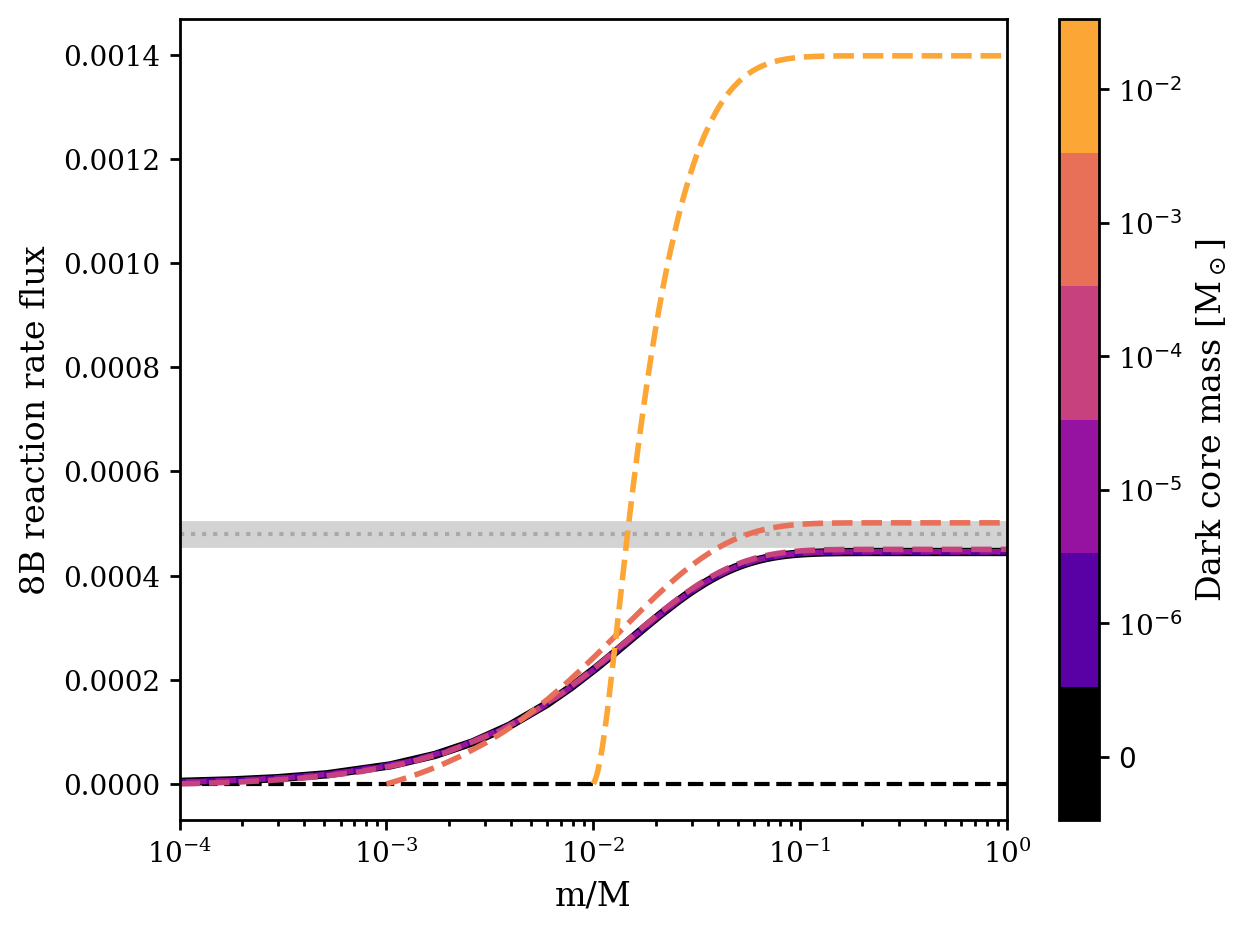

In [62]:
for mass, df in zip(masses, dfs):
    #if mass > 1e-6:
    #    continue
    plt.plot(df.mass[::-1], np.cumsum(df.screened_rate_r_b8_wk_he4_he4[::-1] / (4*np.pi*au*au)/10e9), color=cmap(norm(mass)), 
             ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
    print(np.sum(df.screened_rate_r_b8_wk_he4_he4 / (4*np.pi*au*au))/10e9)

plt.xlabel('m/M')
plt.ylabel(r'8B reaction rate flux')
plt.semilogx()
#plt.semilogy()
plt.xlim([1e-4, 1e0])
#plt.ylim([1e2, 200])

plt.axhline(0, ls='--', c='k', zorder=-999)
plt.axhline(0.00048, ls=':', c='darkgray', zorder=-999)
plt.axhspan(0.00048-0.000023, 0.00048+0.000023, color='lightgray', zorder=-99999)

cbar()

plt.tight_layout()

0.0390439083360846
0.03902378095731903
0.039063645993764606
0.03935425726040256
0.042635875452343173
0.12170093637786379


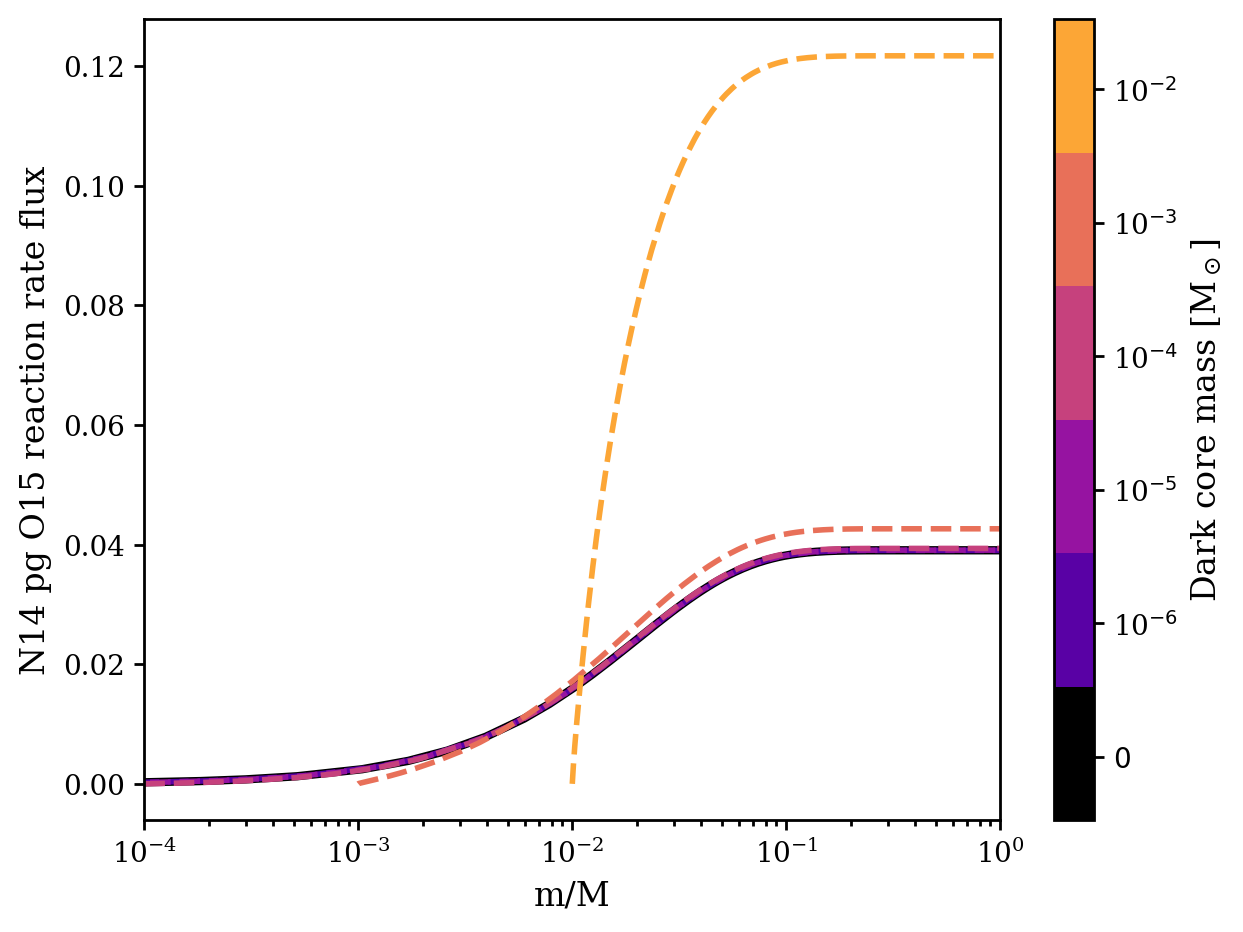

In [63]:
for mass, df in zip(masses, dfs):
    plt.plot(df.mass[::-1], np.cumsum(df.screened_rate_r_n14_pg_o15[::-1] / (4*np.pi*au*au)/10e9), color=cmap(norm(mass)), 
             ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
    print(np.sum(df.screened_rate_r_n14_pg_o15 / (4*np.pi*au*au))/10e9)

plt.xlabel('m/M')
plt.ylabel(r'N14 pg O15 reaction rate flux')
plt.semilogx()
plt.xlim([1e-4, 1e0])

cbar()

plt.tight_layout()

0.04616125912063442
0.046140080012149524
0.046178897629846116
0.04645900579138949
0.04963722056296971
0.12773553509710858


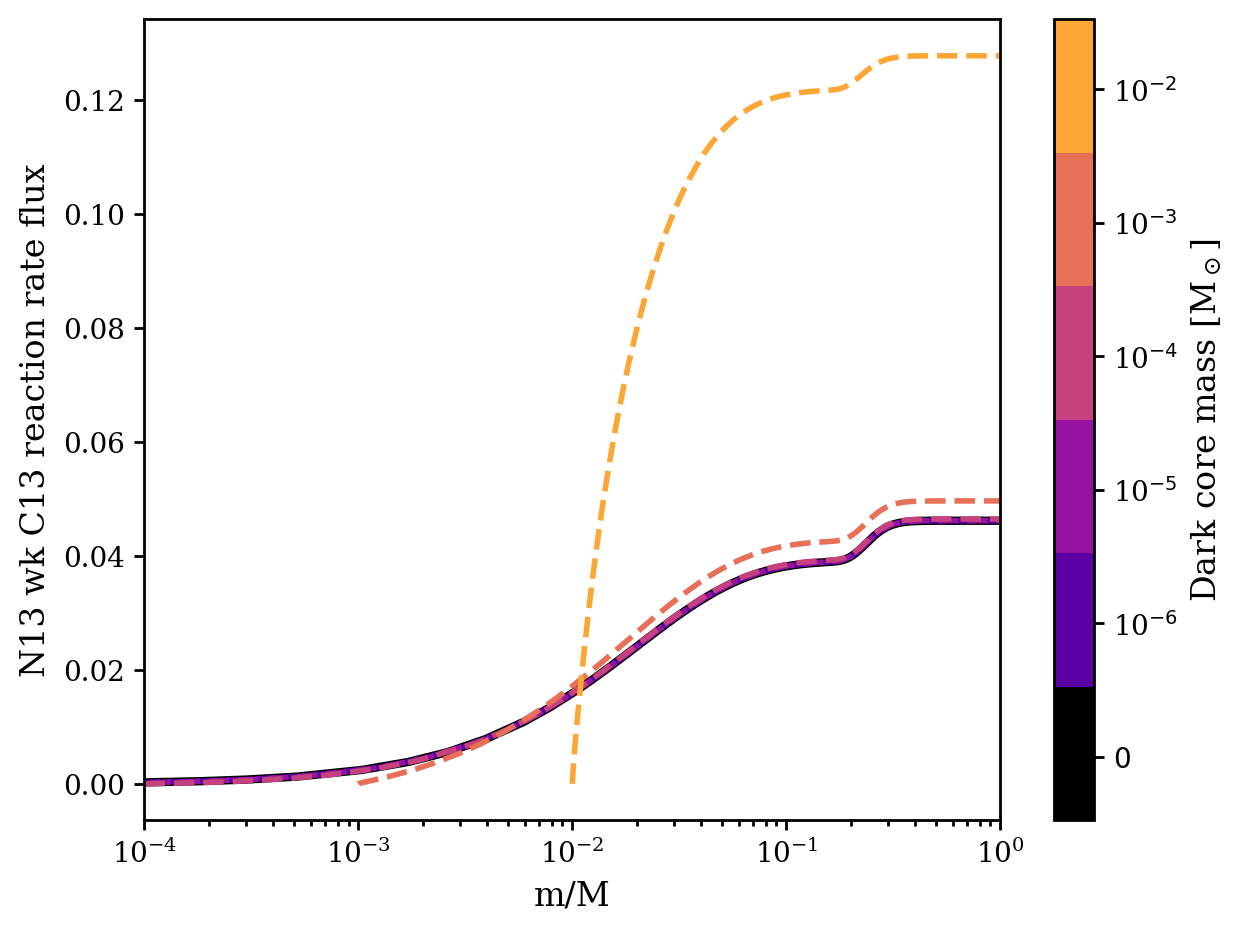

In [64]:
for mass, df in zip(masses, dfs):
    plt.plot(df.mass[::-1], np.cumsum(df.screened_rate_r_n13_wk_c13[::-1] / (4*np.pi*au*au)/10e9), color=cmap(norm(mass)), 
             ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
    print(np.sum(df.screened_rate_r_n13_wk_c13 / (4*np.pi*au*au))/10e9)

plt.xlabel('m/M')
plt.ylabel(r'N13 wk C13 reaction rate flux')
plt.semilogx()
plt.xlim([1e-4, 1e0])

cbar()

plt.tight_layout()

0.03904390833607903
0.03902378095731567
0.03906364599376105
0.03935425726039965
0.04263587545233364
0.12170093637796033


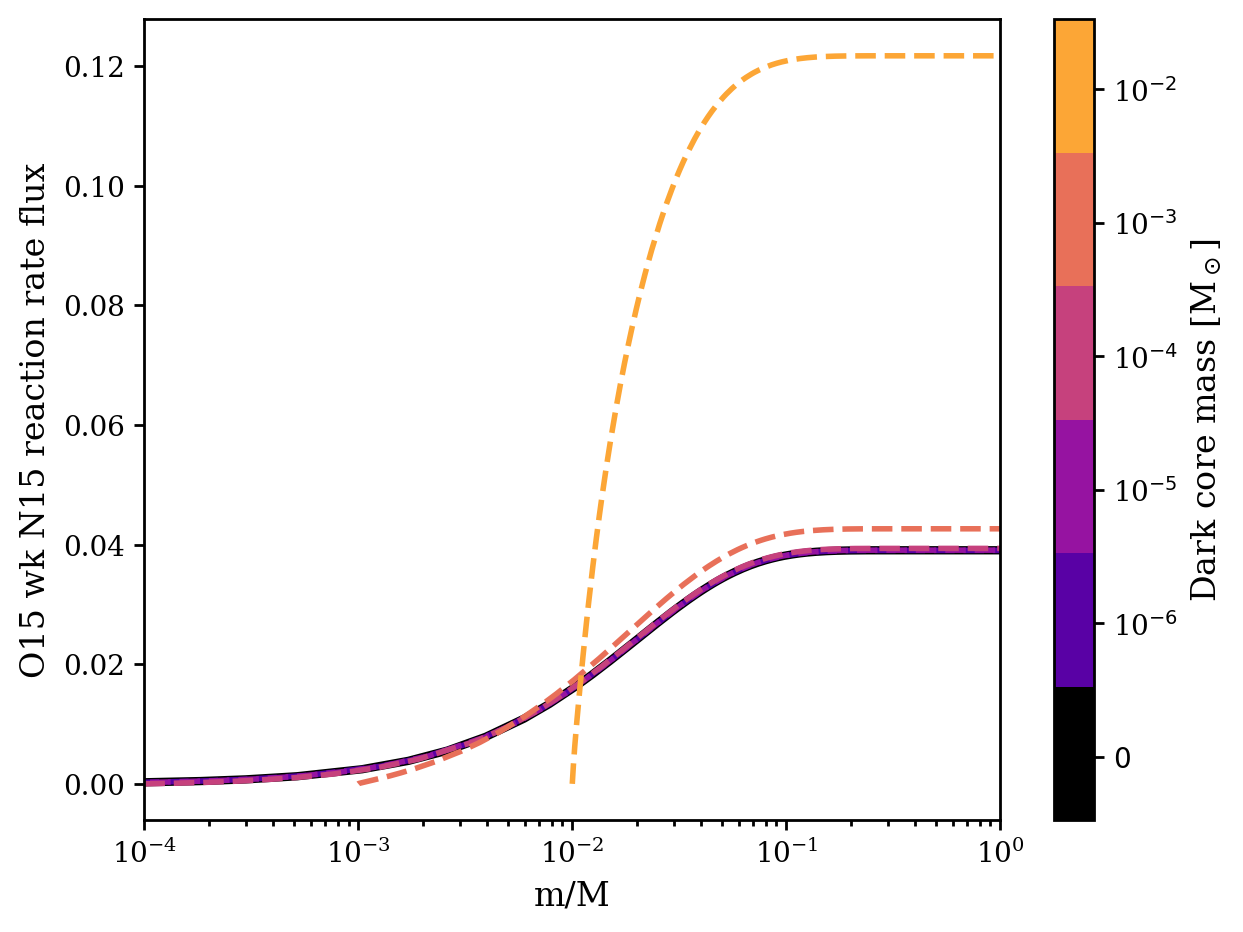

In [65]:
for mass, df in zip(masses, dfs):
    plt.plot(df.mass[::-1], np.cumsum(df.screened_rate_r_o15_wk_n15[::-1] / (4*np.pi*au*au)/10e9), color=cmap(norm(mass)), 
             ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
    print(np.sum(df.screened_rate_r_o15_wk_n15 / (4*np.pi*au*au))/10e9)

plt.xlabel('m/M')
plt.ylabel(r'O15 wk N15 reaction rate flux')
plt.semilogx()
plt.xlim([1e-4, 1e0])

cbar()

plt.tight_layout()

0.00048467707891843107
0.0004844128366682902
0.0004849643859680289
0.0004889622227750015
0.0005341293178974606
0.001522909101815837


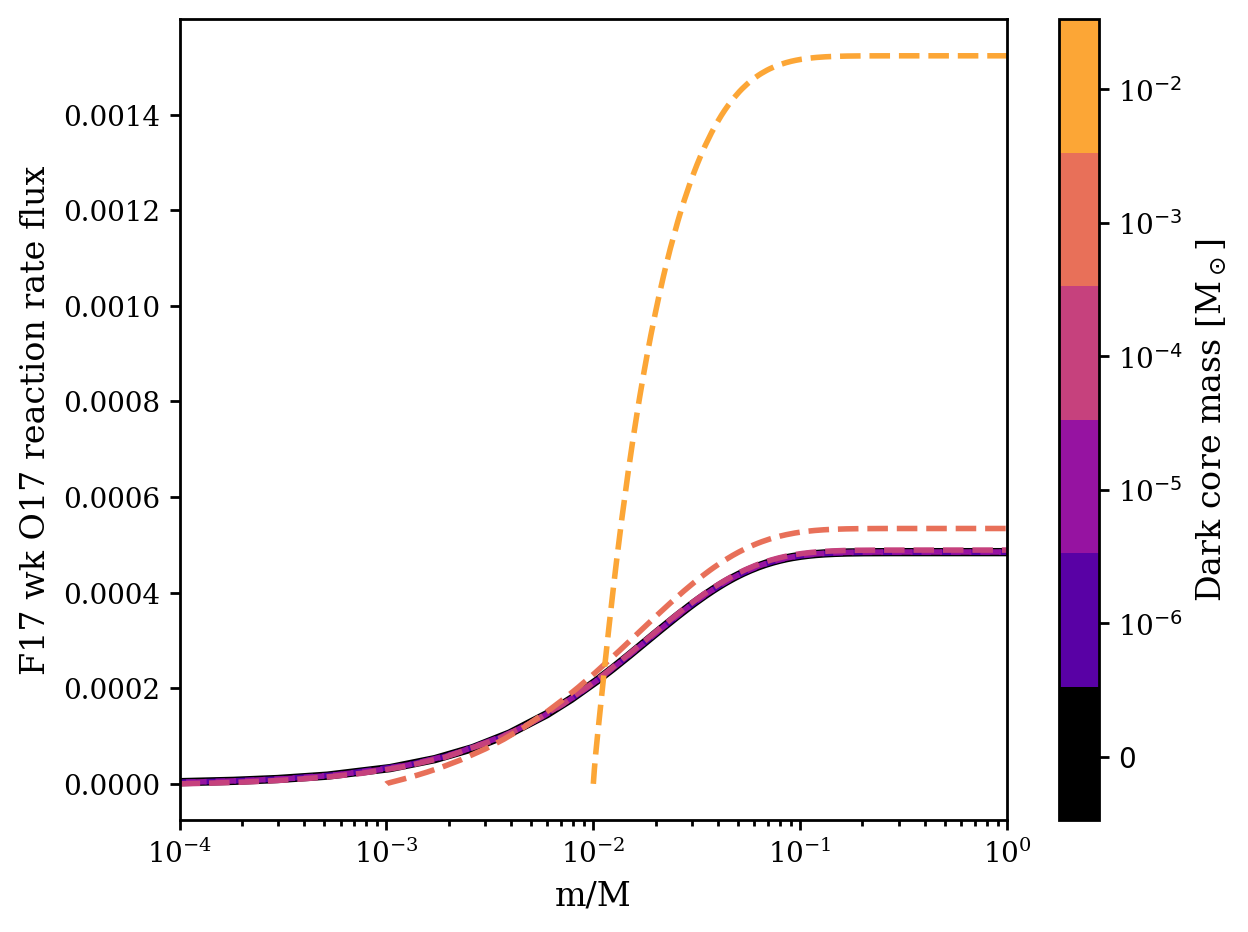

In [66]:
for mass, df in zip(masses, dfs):
    plt.plot(df.mass[::-1], np.cumsum(df.screened_rate_r_f17_wk_o17[::-1] / (4*np.pi*au*au)/10e9), color=cmap(norm(mass)), 
             ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
    print(np.sum(df.screened_rate_r_f17_wk_o17 / (4*np.pi*au*au))/10e9)

plt.xlabel('m/M')
plt.ylabel(r'F17 wk O17 reaction rate flux')
plt.semilogx()
plt.xlim([1e-4, 1e0])

cbar()

plt.tight_layout()

0.04713061327847129
0.047108905685486105
0.047148826401782175
0.04743693023693951
0.05070547919876463
0.13078135330074028


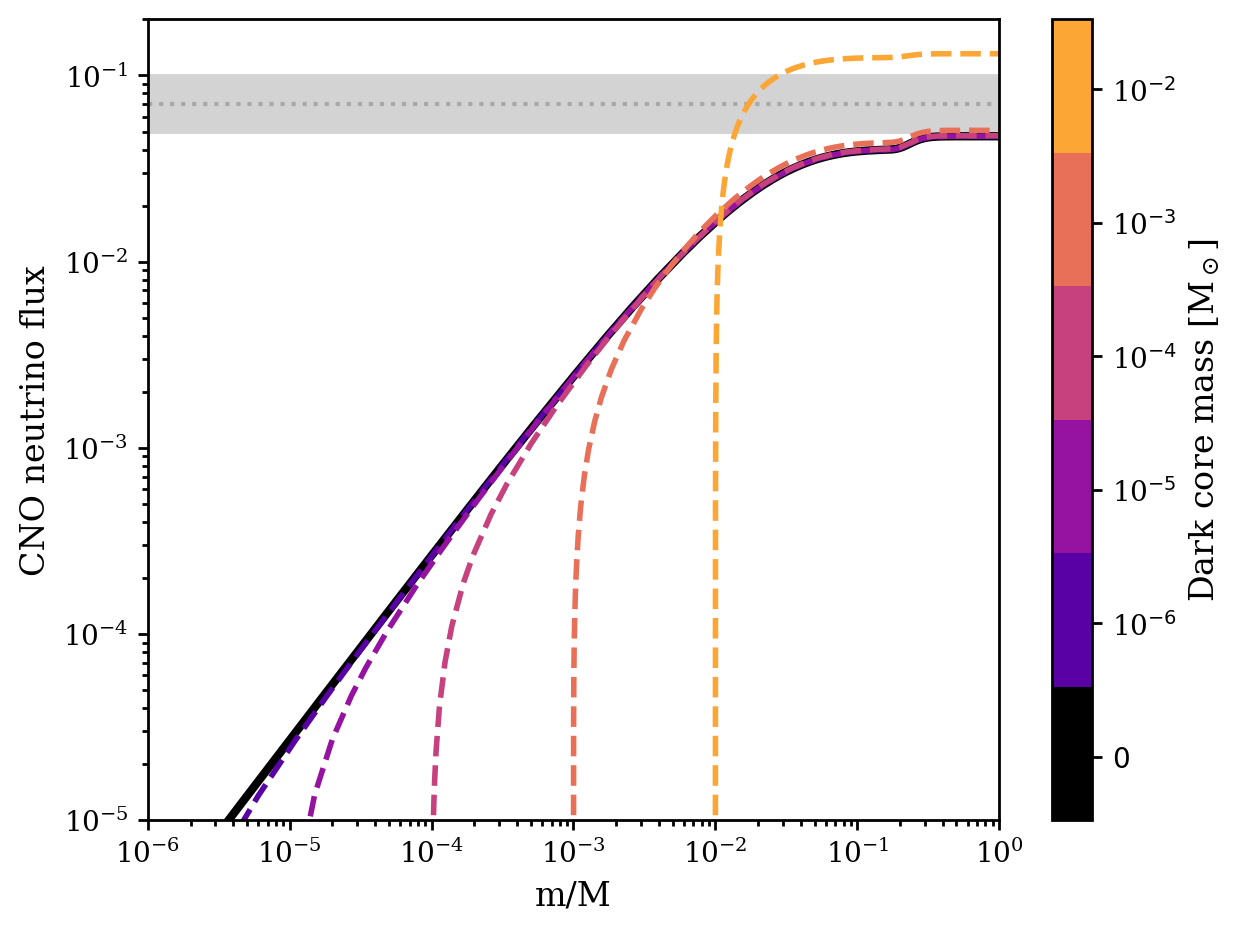

In [67]:
for mass, df in zip(masses, dfs):
    plt.plot(df.mass[::-1], np.cumsum(
        (df.screened_rate_r_f17_wk_o17[::-1] + df.screened_rate_r_n13_wk_c13[::-1] + df.screened_rate_r_f17_wk_o17[::-1]) 
        / (4*np.pi*au*au)/10e9), color=cmap(norm(mass)), 
             ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
    print(np.sum((df.screened_rate_r_f17_wk_o17[::-1] + df.screened_rate_r_n13_wk_c13[::-1] + df.screened_rate_r_f17_wk_o17[::-1]) / (4*np.pi*au*au))/10e9)

plt.xlabel('m/M')
plt.ylabel(r'CNO neutrino flux')
plt.semilogx()
plt.semilogy()
plt.xlim([1e-6, 1e0])
plt.ylim([1e-5, 2e-1])

cbar()

#plt.axhline(0, ls='--', c='k', zorder=-999)
plt.axhline(0.07, ls=':', c='darkgray', zorder=-999)
plt.axhspan(0.07+0.03, 0.07-0.02, color='lightgray', zorder=-99999)

plt.tight_layout()

0.04713061327847129
0.047108905685486105
0.047148826401782175
0.04743693023693951
0.05070547919876463
0.13078135330074028


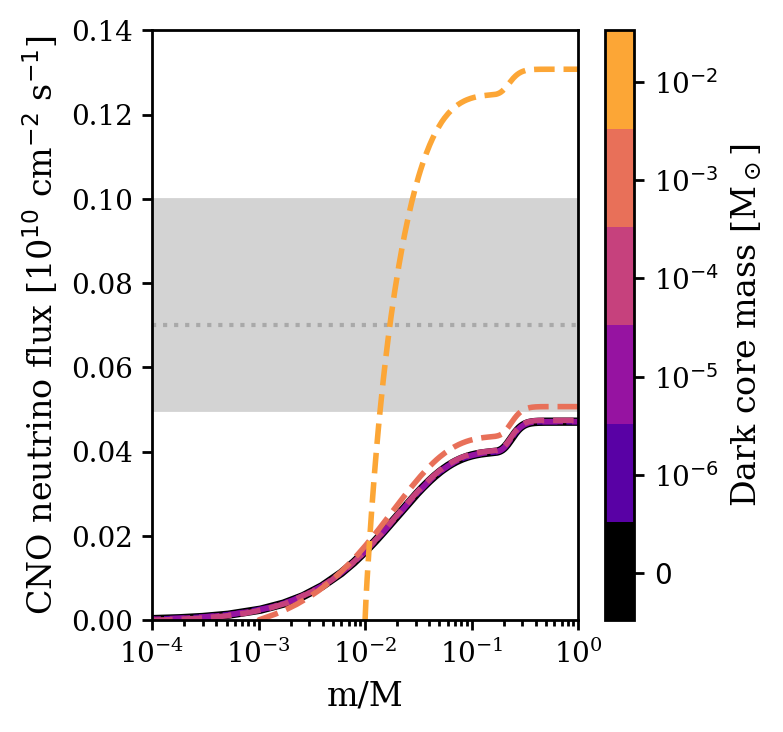

In [68]:
plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    plt.plot(df.mass[::-1], np.cumsum(
        (df.screened_rate_r_f17_wk_o17[::-1] + df.screened_rate_r_n13_wk_c13[::-1] + df.screened_rate_r_f17_wk_o17[::-1]) 
        / (4*np.pi*au*au)/1e10), color=cmap(norm(mass)), 
             ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
    print(np.sum((df.screened_rate_r_f17_wk_o17[::-1] + 
                  df.screened_rate_r_n13_wk_c13[::-1] + 
                  df.screened_rate_r_f17_wk_o17[::-1]) / (4*np.pi*au*au))/10e9)

plt.xlabel('m/M')
plt.ylabel(r'CNO neutrino flux [10$^{10}$ cm$^{-2}$ s$^{-1}$]')
plt.semilogx()
#plt.semilogy()
plt.xlim([1e-4, 1e0])
plt.ylim([0, 0.14])

cbar()

#plt.axhline(0, ls='--', c='k', zorder=-999)
plt.axhline(0.07, ls=':', c='darkgray', zorder=-999)
plt.axhspan(0.07+0.03, 0.07-0.02, color='lightgray', zorder=-99999)

plt.tight_layout()

plt.savefig('figs/neutrino-cno.pdf')

5.954896284088883
5.955000930225801
5.954768950123207
5.953056991061548
5.934388475178014
5.6397340923083386


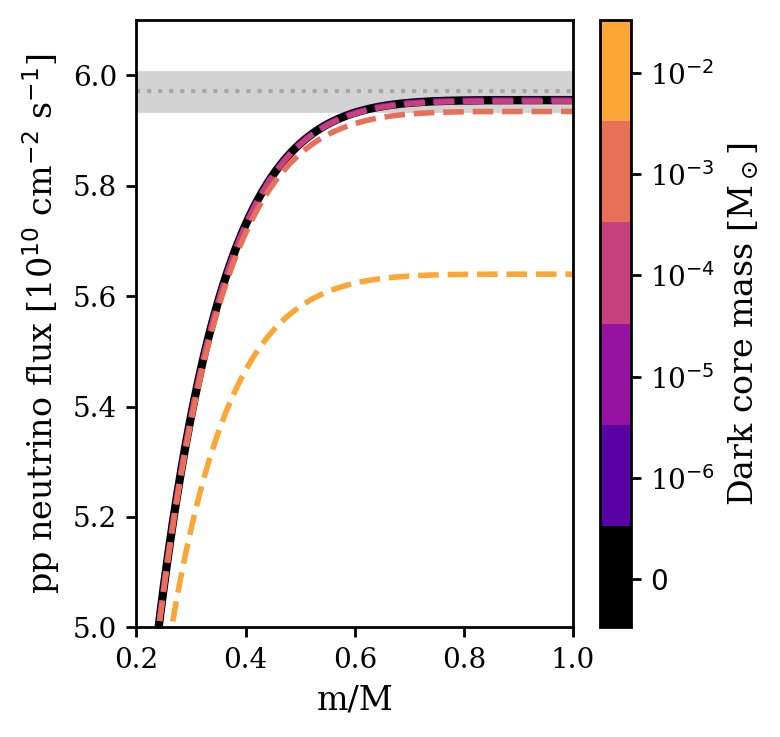

In [69]:
plt.figure(figsize=(width,height))

for mass, df in zip(masses, dfs):
    plt.plot(df.mass[::-1], np.cumsum(df.screened_rate_r_h1_h1_wk_h2[::-1] / (4*np.pi*au*au)/10e9), color=cmap(norm(mass)), 
             ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
    print(np.sum(df.screened_rate_r_h1_h1_wk_h2 / (4*np.pi*au*au))/1e10)

plt.xlabel('m/M')
plt.ylabel(r'pp neutrino flux [10$^{10}$ cm$^{-2}$ s$^{-1}$]')
#plt.semilogx()
plt.xlim([0.2, 1e0])
plt.ylim([5, 6.1])

cbar()

plt.axhline(5.971, ls=':', c='darkgray', zorder=-999)
plt.axhspan(5.971+0.035, 5.971-0.035, color='lightgray', zorder=-99999)

plt.tight_layout()

plt.savefig('figs/neutrino-pp.pdf')

## Calibration

In [71]:
hist5

model_number  num_zones      star_age    log_dt  star_mass  log_xmstar  \
0               1       1901  1.000000e+05  5.000000   0.999972    33.29849   
1               2       1737  2.800000e+05  5.255273   0.999972    33.29849   
2               3       1684  6.040000e+05  5.510545   0.999972    33.29849   
3               4       1656  1.187200e+06  5.765818   0.999972    33.29849   
4               5       1645  2.236960e+06  6.021090   0.999972    33.29849   
..            ...        ...           ...       ...        ...         ...   
459           460       1548  4.533650e+09  7.000000   0.999972    33.29849   
460           461       1548  4.543650e+09  7.000000   0.999972    33.29849   
461           462       1545  4.553650e+09  7.000000   0.999972    33.29849   
462           463       1552  4.563650e+09  7.000000   0.999972    33.29849   
463           464       1546  4.572000e+09  6.921689   0.999972    33.29849   

     log_abs_mdot  mass_conv_core  conv_mx1_top  conv_mx1_bot  ...  \
0           -99.0             0.0      0.046717      0.006274  ...   
1           -99.0             0.0      0.030694      0.000041  ...   
2           -99.0             0.0      0.033558      0.000047  ...   
3           -99.0             0.0      0.031632      0.000058  ...   
4           -99.0             0.0      1.000000      0.969981  ...   
..            ...             ...           ...           ...  ...   
459         -99.0             0.0      1.000000      0.976761  ...   
460         -99.0             0.0      1.000000      0.976784  ...   
461         -99.0             0.0      1.000000      0.976772  ...   
462         -99.0             0.0      1.000000      0.976792  ...   
463         -99.0             0.0      1.000000      0.976801  ...   

      center_ne19  center_ne20   center_mg22  center_mg24  surface_c12  \
0    6.274907e-39     0.001931  1.069410e-13     0.003777     0.003157   
1    6.554619e-39     0.001932  3.035563e-13     0.003778     0.003157   
2    6.964673e-39     0.001932  6.680330e-13     0.003779     0.003157   
3    7.644610e-39     0.001934  1.354281e-12     0.003782     0.003157   
4    8.790584e-39     0.001936  2.675002e-12     0.003786     0.003157   
..            ...          ...           ...          ...          ...   
459  2.039022e-33     0.002317  6.130653e-08     0.004694     0.002895   
460  2.094132e-33     0.002317  6.187015e-08     0.004694     0.002894   
461  2.150760e-33     0.002317  6.243932e-08     0.004694     0.002894   
462  2.208939e-33     0.002317  6.301412e-08     0.004694     0.002893   
463  2.258734e-33     0.002317  6.349798e-08     0.004694     0.002893   

     surface_o16  total_mass_h1  total_mass_he4  num_retries  num_iters  
0       0.008663       0.710726        0.270540            0          8  
1       0.008663       0.710725        0.270541            0          5  
2       0.008663       0.710722        0.270543            0          5  
3       0.008663       0.710718        0.270546            0          5  
4       0.008663       0.710710        0.270552            0          5  
..           ...            ...             ...          ...        ...  
459     0.007970       0.673535        0.307005            0          6  
460     0.007968       0.673438        0.307101            0          6  
461     0.007967       0.673342        0.307197            0          6  
462     0.007965       0.673245        0.307294            0         10  
463     0.007964       0.673165        0.307374            0          6  

[464 rows x 157 columns]

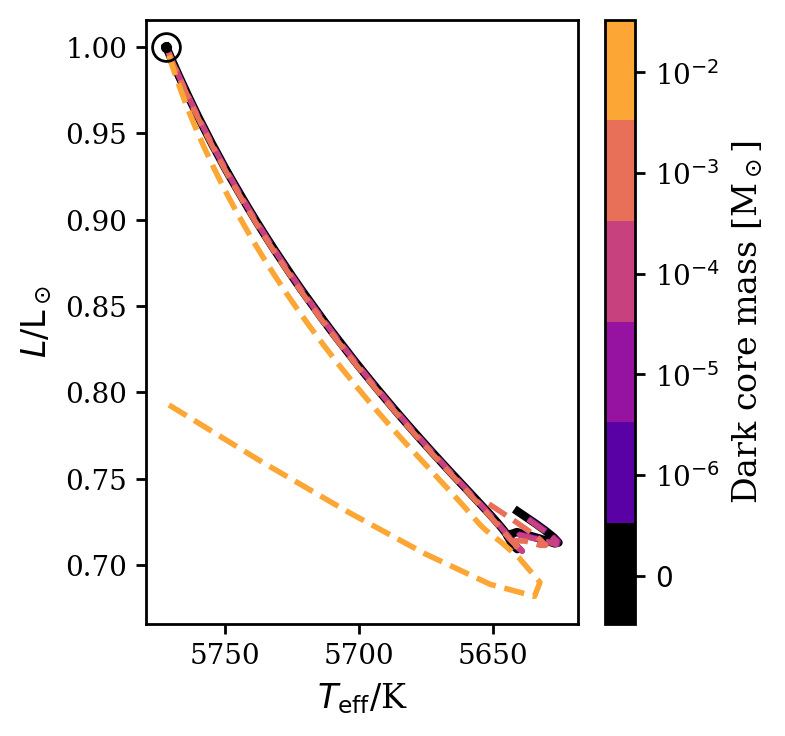

In [72]:
plt.figure(figsize=(width,height))

for mass, df in zip(masses, hists):
    plt.plot(10**df.log_Teff, 10**df.log_L, color=cmap(norm(mass)), 
             ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)

plt.plot(5772.003429098915, 1, 'k.')
plt.plot(5772.003429098915, 1, 'ko', mfc='none', ms=10)
cbar()

plt.xlabel(r'$T_{\rm{eff}}/$K')
plt.ylabel(r'$L/\rm{L}_\odot$')
plt.gca().invert_xaxis()

plt.tight_layout()
plt.savefig('figs/calibration.pdf')

In [73]:
import os
import re
import pandas as pd

root_dir = "dark-core-calibrate/grid"
data = []

alpha_pattern = re.compile(r"mixing_length_alpha = (\d+.\d+)")
y_pattern = re.compile(r"new_Y = (\d+.\d+)")

for subdir in sorted(os.listdir(root_dir)):
    if "LOGS_" in subdir:
        print(subdir)
        x = int(subdir.split('_')[-1])  # Extract the value of X from the directory name
        file_path = os.path.join(root_dir, subdir, "inlist_calibrate")
        try:
            with open(file_path, 'r') as file:
                contents = file.read()
                alpha_match = alpha_pattern.search(contents)
                y_match = y_pattern.search(contents)
                print(alpha_match)
                print(y_match)
                if alpha_match and y_match:
                    alpha = float(alpha_match.group(1))
                    y = float(y_match.group(1))
                    data.append({'X': x, 'initial_y': y, 'mixing_length_alpha': alpha})
        except FileNotFoundError:
            print(f"File not found: {file_path}")

df = pd.DataFrame(data, columns=['X', 'initial_y', 'mixing_length_alpha'])
df


LOGS_-2
<re.Match object; span=(1137, 1177), match='mixing_length_alpha = 2.1410847671327953'>
<re.Match object; span=(519, 545), match='new_Y = 0.2550896031680376'>
LOGS_-3
<re.Match object; span=(1139, 1179), match='mixing_length_alpha = 1.8397287085538894'>
<re.Match object; span=(519, 545), match='new_Y = 0.2690053587447685'>
LOGS_-4
<re.Match object; span=(1139, 1179), match='mixing_length_alpha = 1.8139668557252162'>
<re.Match object; span=(519, 545), match='new_Y = 0.2705348225959986'>
LOGS_-5
<re.Match object; span=(1139, 1179), match='mixing_length_alpha = 1.8114548272896525'>
<re.Match object; span=(519, 545), match='new_Y = 0.2706918207376719'>
LOGS_-6
<re.Match object; span=(1139, 1179), match='mixing_length_alpha = 1.8111913251597787'>
<re.Match object; span=(519, 545), match='new_Y = 0.2707062736772575'>
LOGS_-7
<re.Match object; span=(1138, 1178), match='mixing_length_alpha = 1.8112103034442144'>
<re.Match object; span=(519, 546), match='new_Y = 0.27070765699638116'>
LOG

X  initial_y  mixing_length_alpha
0 -2   0.255090             2.141085
1 -3   0.269005             1.839729
2 -4   0.270535             1.813967
3 -5   0.270692             1.811455
4 -6   0.270706             1.811191
5 -7   0.270708             1.811210
6 -8   0.270717             1.811187

In [74]:
Y0 = 0.2707218387037811
alpha0 = 1.8111840927273646

In [75]:
df[:-2]

X  initial_y  mixing_length_alpha
0 -2   0.255090             2.141085
1 -3   0.269005             1.839729
2 -4   0.270535             1.813967
3 -5   0.270692             1.811455
4 -6   0.270706             1.811191

In [76]:
cmap(norm(masses[1:]))

array([[0.35015 , 0.004382, 0.646298, 1.      ],
       [0.589719, 0.072878, 0.630408, 1.      ],
       [0.775796, 0.253658, 0.491171, 1.      ],
       [0.910098, 0.439268, 0.34961 , 1.      ],
       [0.98826 , 0.652325, 0.211364, 1.      ]])

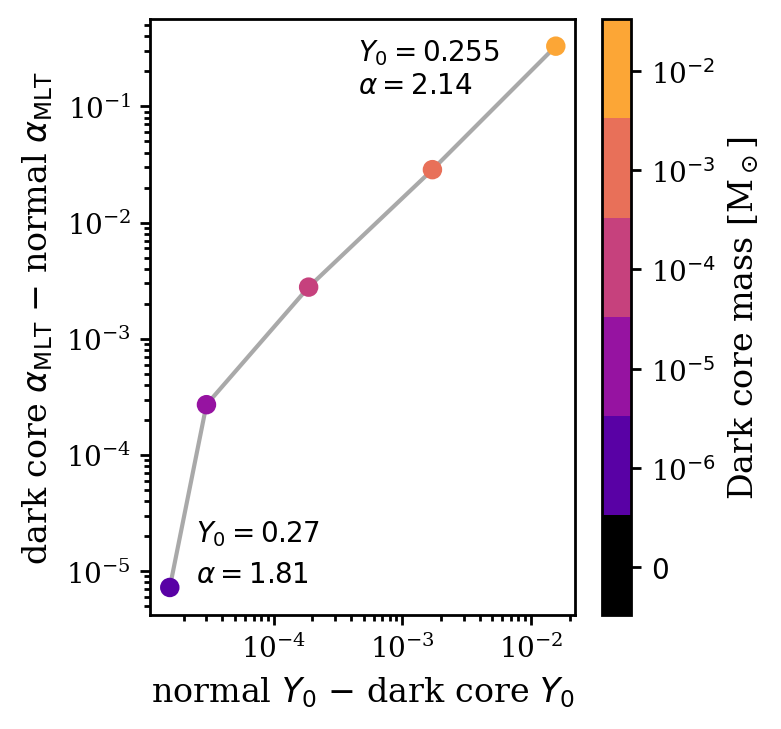

In [77]:
plt.figure(figsize=(width,height))

plt.plot(Y0 - df.initial_y[:-2], df.mixing_length_alpha[:-2]-alpha0, ls='-', c='darkgray', zorder=1)
plt.scatter(Y0 - df.initial_y[:-2], df.mixing_length_alpha[:-2]-alpha0, color=cmap(norm(masses[1:]))[::-1], zorder=2)
plt.xlabel(r'normal $Y_0$ $-$ dark core $Y_0$')
plt.ylabel(r'dark core $\alpha_{\rm{MLT}}$ $-$ normal $\alpha_{\rm{MLT}}$')
plt.semilogx()
plt.semilogy()
plt.gca().set_axisbelow(True)
#plt.grid(ls='--', zorder=-99999)

plt.text(250e-7, 18e-6, r'$Y_0 = 0.27$', bbox=dict(boxstyle='square,pad=.1', facecolor='white', edgecolor='white'))
plt.text(250e-7,  8e-6, r'$\alpha=1.81$', bbox=dict(boxstyle='square,pad=.1', facecolor='white', edgecolor='white'))

plt.text(45e-5, 250e-3, r'$Y_0 = 0.255$', bbox=dict(boxstyle='square,pad=.1', facecolor='white', edgecolor='white'))
plt.text(45e-5, 130e-3, r'$\alpha=2.14$', bbox=dict(boxstyle='square,pad=.1', facecolor='white', edgecolor='white'))

cbar()

plt.tight_layout()
plt.savefig('figs/calibration-Ya.pdf')

## Seismology

In [78]:
filename = 'dark-core-calibrate/grid/LOGS_-7/solar.data.GYRE'
df = pd.DataFrame(gyre.load_gyre(filename).data)
R = gyre.load_gyre(filename).R
df

k             r             m           L_r             P  \
0        1  0.000000e+00  0.000000e+00  0.000000e+00  2.353793e+17   
1        2  4.948613e+07  2.765156e+26  1.309753e+27  2.353648e+17   
2        3  6.235003e+07  3.541903e+26  2.619574e+27  2.353490e+17   
3        4  7.855809e+07  5.095396e+26  5.239166e+27  2.353339e+17   
4        5  9.897975e+07  8.202382e+26  1.047814e+28  2.353158e+17   
...    ...           ...           ...           ...           ...   
1829  1830  6.961509e+10  1.988355e+33  3.828005e+33  3.112734e+03   
1830  1831  6.961525e+10  1.988355e+33  3.828005e+33  3.072369e+03   
1831  1832  6.961540e+10  1.988355e+33  3.828005e+33  3.032506e+03   
1832  1833  6.961555e+10  1.988355e+33  3.828005e+33  2.993138e+03   
1833  1834  6.961569e+10  1.988355e+33  3.828005e+33  2.958477e+03   

                 T           rho     nabla            N2   Gamma_1  nabla_ad  \
0     1.563054e+07  1.530363e+02  0.004082  0.000000e+00  1.665418  0.395328   
1     1.563038e+07  1.530068e+02  0.091891  3.969437e-08  1.665417  0.395329   
2     1.563027e+07  1.529904e+02  0.143476  1.824754e-08  1.665417  0.395329   
3     1.563010e+07  1.529777e+02  0.199463  1.376155e-08  1.665417  0.395329   
4     1.562984e+07  1.529628e+02  0.247812  1.306081e-08  1.665417  0.395329   
...            ...           ...       ...           ...       ...       ...   
1829  4.855520e+03  9.684422e-09  0.000807  9.244119e-04  1.656897  0.395704   
1830  4.855474e+03  9.558858e-09  0.000790  9.244488e-04  1.656889  0.395701   
1831  4.855430e+03  9.434851e-09  0.000773  9.244839e-04  1.656879  0.395697   
1832  4.855387e+03  9.312381e-09  0.000757  9.245170e-04  1.656868  0.395692   
1833  4.855349e+03  9.204555e-09  0.000743  9.245450e-04  1.656857  0.395687   

         delta     kappa  kappa_kappa_T  kappa_kappa_rho        eps  \
0     0.978394  1.247911      -2.369002         0.450324  16.849224   
1     0.978397  1.247894      -2.368904         0.450322  16.850460   
2     0.978399  1.247887      -2.368855         0.450322  16.850834   
3     0.978401  1.247888      -2.368836         0.450327  16.850351   
4     0.978402  1.247904      -2.368835         0.450338  16.849499   
...        ...       ...            ...              ...        ...   
1829  1.003321  0.016999       0.028294         0.013702   0.000000   
1830  1.003334  0.016821       0.028239         0.013547   0.000000   
1831  1.003348  0.016645       0.028183         0.013395   0.000000   
1832  1.003362  0.016471       0.028128         0.013244   0.000000   
1833  1.003375  0.016317       0.028080         0.013112   0.000000   

       eps_eps_T  eps_eps_rho  Omega  
0     169.524006    17.386579    0.0  
1     169.530276    17.387922    0.0  
2     169.531473    17.388337    0.0  
3     169.524064    17.387876    0.0  
4     169.513411    17.387042    0.0  
...          ...          ...    ...  
1829    0.000000     0.000000    0.0  
1830    0.000000     0.000000    0.0  
1831    0.000000     0.000000    0.0  
1832    0.000000     0.000000    0.0  
1833    0.000000     0.000000    0.0  

[1834 rows x 19 columns]

/home/epb37/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/epb37/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/epb37/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/epb37/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/epb37/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/epb37/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:399:

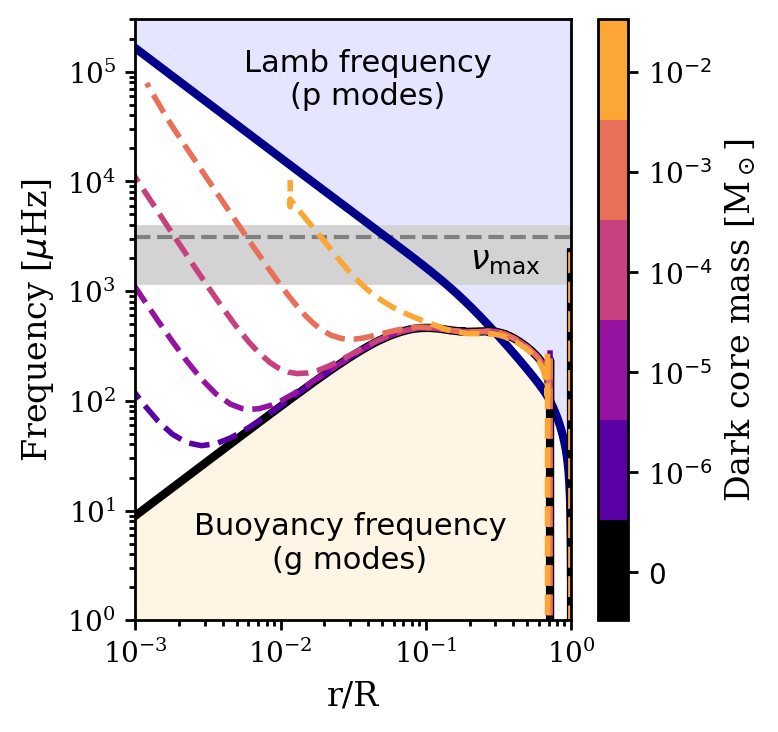

In [79]:
plt.figure(figsize=(width,height))

muHz = 10**6/(2*np.pi)
x = 10**m0.logR
lamb = m0.lamb_S*muHz
plt.plot(x, lamb, c='darkblue', lw=3)

for mass, df in zip(masses, dfs):
    N = np.sqrt(df.brunt_N2) * muHz
    N[N<=0] = 0
    N[np.isnan(N)] = 0
    plt.plot(10**df.logR[:-1], N[:-1], color=cmap(norm(mass)), ls='--' if mass > 1e-8 else '-', lw=3 if mass == 1e-8 else 2)
    if mass == 1e-8:
        brunt = N

gmodes = np.minimum(brunt, lamb)
pmodes = np.maximum(brunt, lamb)
plt.fill_between(x, 
                 np.zeros(len(gmodes)), 
                 gmodes, 
                 color='orange', alpha=0.1, zorder=-999999)
plt.fill_between(x, 
                 1e99*np.ones(len(pmodes)), 
                 pmodes, 
                 color='blue', alpha=0.1, zorder=-999999)

"""
for mass, df in zip(masses[::-1], dfs[::-1]):
    if mass == 1e-8: 
        continue
    N = np.sqrt(df.brunt_N2) * muHz
    N[N<=0] = 0
    N[np.isnan(N)] = 0
    gmodes = np.minimum(N, df.lamb_S*muHz)
    plt.fill_between(10**df.logR, 
                 np.zeros(len(gmodes)), 
                 gmodes, 
                 color=cmap(norm(mass)), alpha=1, zorder=-99999999)
"""

plt.axhline(3090, ls='--', c='gray', label=r'$\nu_{\max}$', zorder=-99)
plt.axhspan(1185.592, 3913.570, color='lightgray', zorder=-99999)

plt.text(4e-2, 5e4, 'Lamb frequency\n(p modes)', size=11, ha='center', font='Sans Serif')
plt.text(3e-2, 3e0, 'Buoyancy frequency\n(g modes)', size=11, ha='center', font='Sans Serif')
plt.text(2e-1, 1.6e3, r'$\nu_{\max}$', size=12)

plt.xlabel('r/R')
plt.ylabel(r'Frequency [$\mu$Hz]')
plt.semilogx()
plt.semilogy()
plt.ylim([1e0, 3e5])
plt.xlim([1e-3, 1e0])
cbar()

plt.tight_layout()
plt.savefig('figs/propagation.pdf')

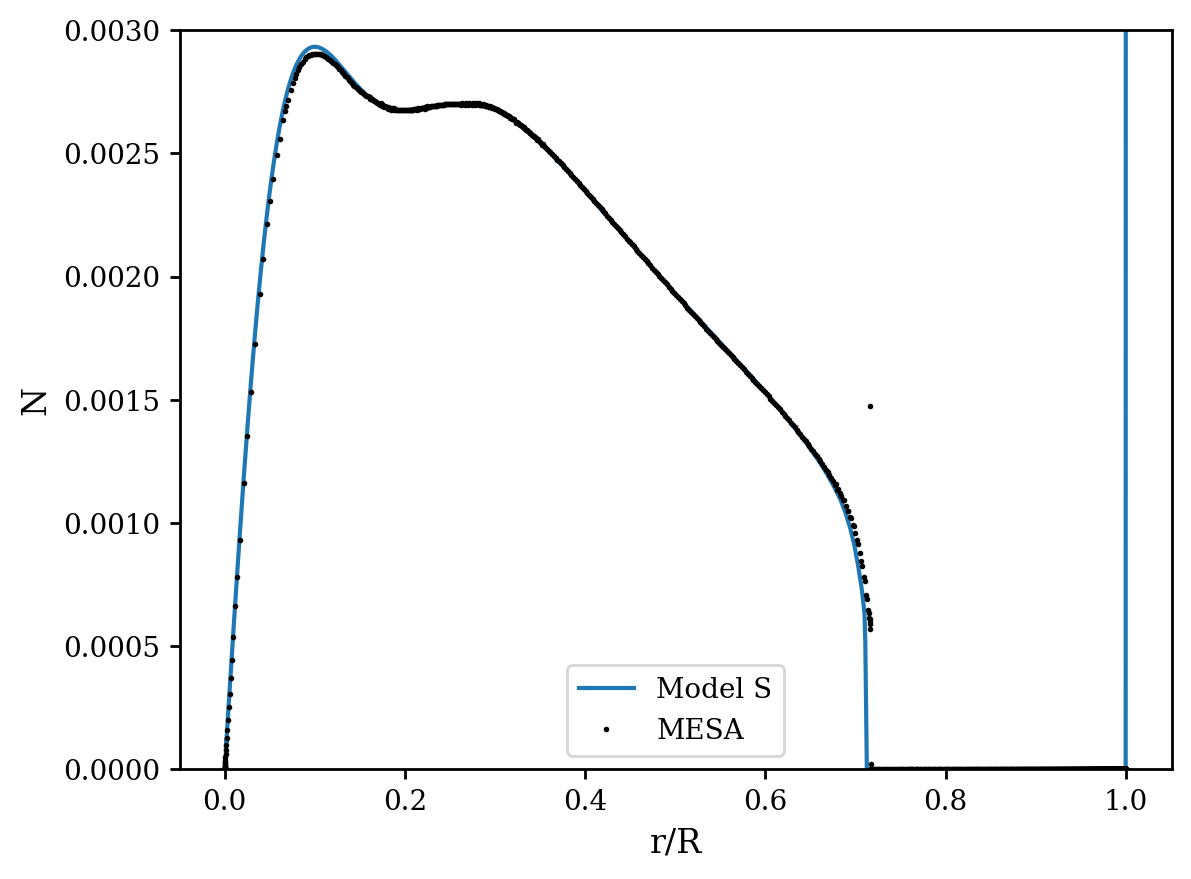

In [80]:
plt.plot(S.x, S.N, label='Model S')
#plt.plot(gyre0.x, gyre0.N, '-', c='gray', lw=1)
plt.plot(gyre0.x, gyre0.N, 'k.', ms=2, label='MESA')
#plt.semilogy()
plt.ylim([0, 3e-3])
plt.xlabel('r/R')
plt.ylabel('N')
plt.legend()

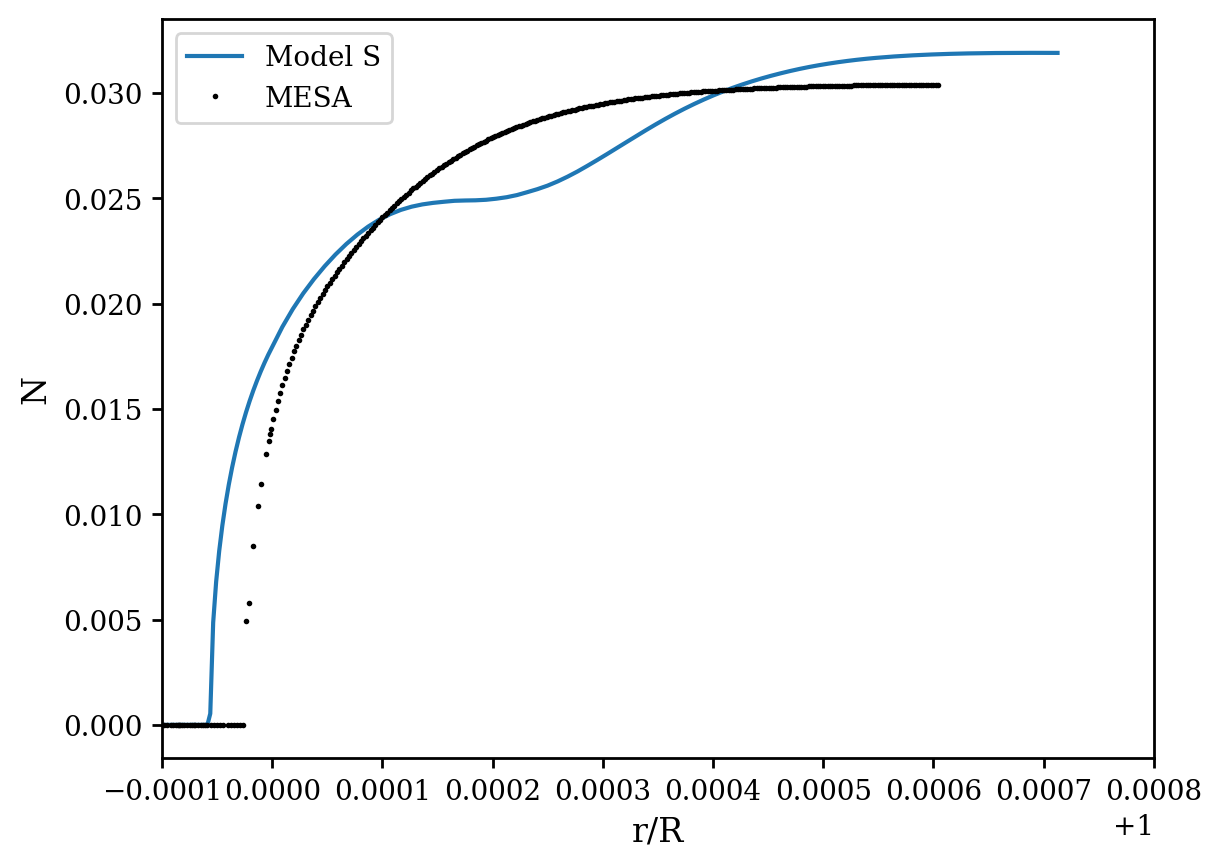

In [81]:
plt.plot(S.x, S.N, label='Model S')
#plt.plot(gyre0.x, gyre0.N, '-', c='gray', lw=1)
plt.plot(gyre0.x, gyre0.N, 'k.', ms=2, label='MESA')
#plt.semilogy()
plt.xlim([0.9999, 1.0008])
#plt.semilogx()
#plt.ylim([0, 3e-3])
plt.xlabel('r/R')
plt.ylabel('N')
plt.legend()

(0.0, 0.25)

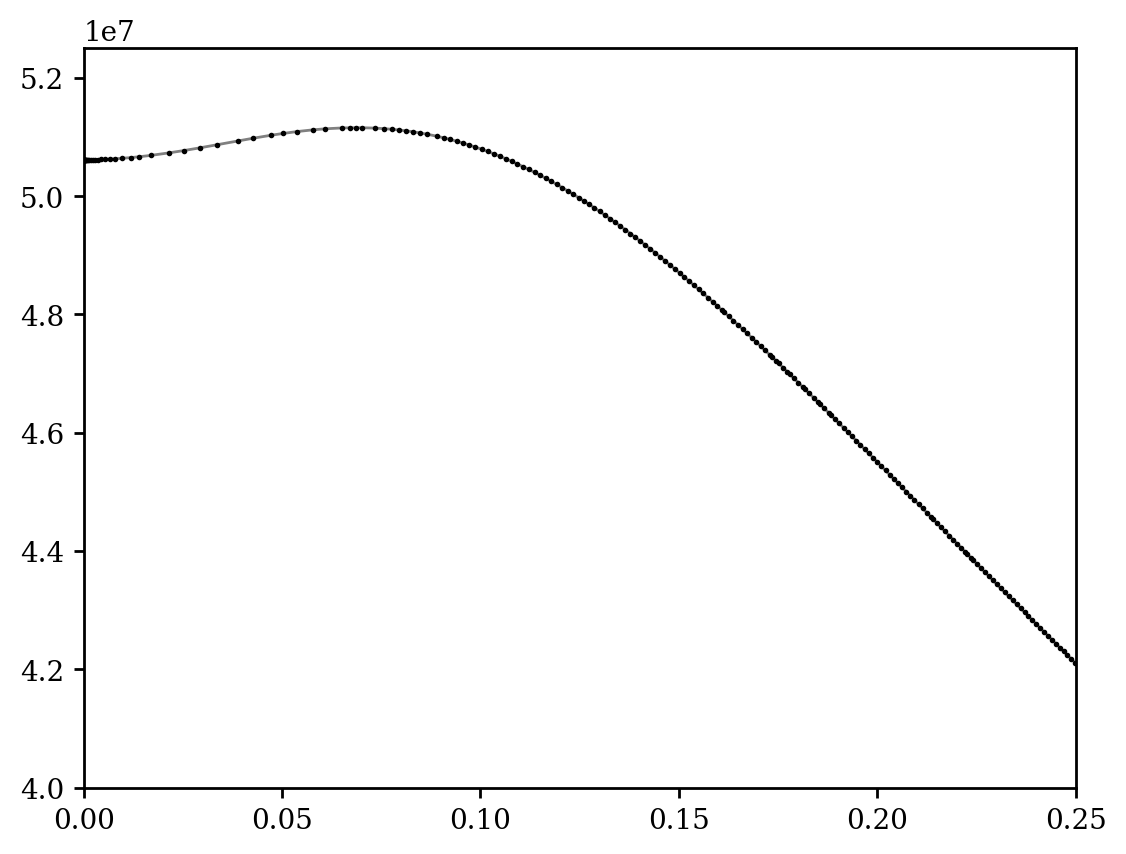

In [82]:
plt.plot(gyre0.x, gyre0.cs, '-', c='gray', lw=1)
plt.plot(gyre0.x, gyre0.cs, 'k.', ms=2)
#plt.semilogy()
plt.ylim([4e7, 5.25e7])
plt.xlim([0, 0.25])

In [83]:
obs_DF = pd.read_table('Sun-freqs.dat', sep='\s+')

In [84]:
obs_DF

n  l        nu    dnu
0    6  0   972.613  0.002
1    7  1  1185.592  0.004
2    8  0  1263.162  0.012
3    8  1  1329.629  0.004
4    8  2  1394.680  0.011
..  .. ..       ...    ...
74  26  2  3839.717  0.144
75  27  0  3846.993  0.177
76  27  1  3913.570  0.068
77  27  2  3976.930  0.298
78  28  0  3984.214  0.323

[79 rows x 4 columns]

In [85]:
freqS = pd.read_table('dark-core-calibrate/modelS/solar-freqs.dat', skiprows=5, sep='\s+')

In [87]:
freq0 = pd.read_table('dark-core-calibrate/LOGS_solar/solar-freqs.dat', skiprows=5, sep='\s+')
#freq0 = pd.read_table('dark-core-calibrate/modelS/solar-freqs.dat', skiprows=5, sep='\s+')
freq8 = pd.read_table('dark-core-calibrate/grid/LOGS_-8/solar-freqs.dat', skiprows=5, sep='\s+')
freq7 = pd.read_table('dark-core-calibrate/grid/LOGS_-7/solar-freqs.dat', skiprows=5, sep='\s+')
freq6 = pd.read_table('dark-core-calibrate/grid/LOGS_-6/solar-freqs.dat', skiprows=5, sep='\s+')
freq5 = pd.read_table('dark-core-calibrate/grid/LOGS_-5/solar-freqs.dat', skiprows=5, sep='\s+')
freq4 = pd.read_table('dark-core-calibrate/grid/LOGS_-4/solar-freqs.dat', skiprows=5, sep='\s+')
freq3 = pd.read_table('dark-core-calibrate/grid/LOGS_-3/solar-freqs.dat', skiprows=5, sep='\s+')
freq2 = pd.read_table('dark-core-calibrate/grid/LOGS_-2/solar-freqs.dat', skiprows=5, sep='\s+')

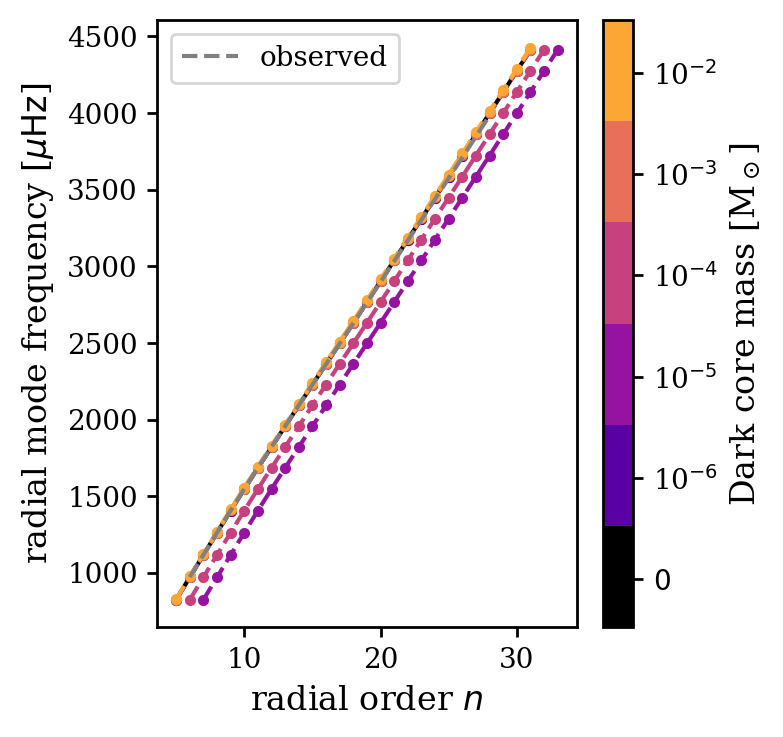

In [88]:
plt.figure(figsize=(width,height))

radial = freq0[freq0.l == 0]
for freqk, mass in zip([freq0, freq6, freq5, freq4, freq3, freq2], masses):
    radk = freqk[freqk.l == 0]
    plt.plot(radk['n_pg'], radk['Re(freq)'], color=cmap(norm(mass)), ls='--' if mass > 1e-7 else '-')
    
    plt.plot(radk['n_pg'], radk['Re(freq)'], '.', color=cmap(norm(mass)))

obs_rad = obs_DF[obs_DF.l == 0]
plt.plot(obs_rad.n, obs_rad.nu, c='gray', label='observed', ls='--')

plt.xlabel(r'radial order $n$')
plt.ylabel(r'radial mode frequency [$\mu\rm{Hz}$]')
plt.legend()
cbar()

#plt.xlim([18, 22])
#plt.ylim([2500, 3000])

plt.tight_layout()
#plt.savefig('figs/radial.pdf')

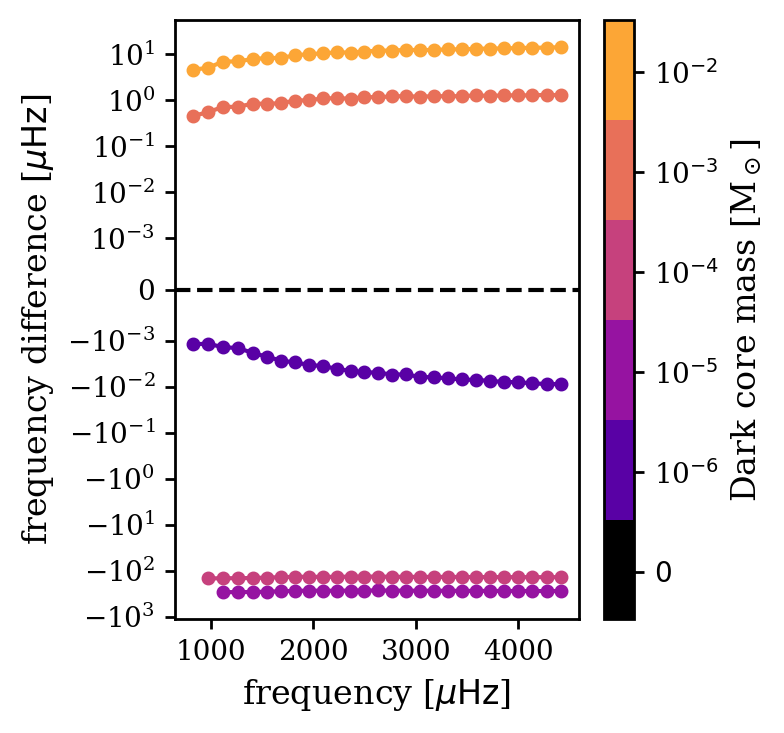

In [89]:
plt.figure(figsize=(width,height))

radial = freq0[freq0.l == 0]
for freqk, mass in zip([freq6, freq5, freq4, freq3, freq2], masses[1:]):
    #print(mass)
    radk = freqk[freqk.l == 0]
    comp = pd.merge(radial, radk, on='n_p')
    #print(comp['Re(freq)_y'] - comp['Re(freq)_x'])
    #plt.plot(comp['Re(freq)_x'], comp['Re(freq)_y'] - comp['Re(freq)_x'], color=cmap(norm(mass)))
    #plt.plot(comp['Re(freq)_x'], comp['Re(freq)_y'] - comp['Re(freq)_x'], '.', color=cmap(norm(mass)), ms=10)
    plt.plot(comp['Re(freq)_x'], comp['Re(freq)_y'] - comp['Re(freq)_x'], color=cmap(norm(mass)))
    plt.plot(comp['Re(freq)_x'], comp['Re(freq)_y'] - comp['Re(freq)_x'], '.', color=cmap(norm(mass)), ms=8)

obs_rad = obs_DF[obs_DF.l == 0]
#plt.axhspan(obs_rad.dnu.min(), obs_rad.dnu.max(), color='lightgray', zorder=-9999)
#plt.axhspan(obs_rad.dnu.min(), obs_rad.dnu.max(), color='lightgray', zorder=-9999)
#plt.plot(obs_rad.nu, obs_rad.dnu, c='gray', label='uncertainty', ls='--')
#plt.plot(obs_rad.nu, obs_rad.dnu, '.', c='gray', ms=8)

plt.xlabel(r'frequency [$\mu\rm{Hz}$]')
plt.ylabel(r'frequency difference [$\mu\rm{Hz}$]')
#plt.legend()
#plt.semilogy()
plt.gca().set_yscale('symlog', linthresh=1e-3)
plt.axhline(0, ls='--', c='k')
cbar()
#cbar_no0()


plt.tight_layout()
#plt.savefig('figs/radial.pdf')

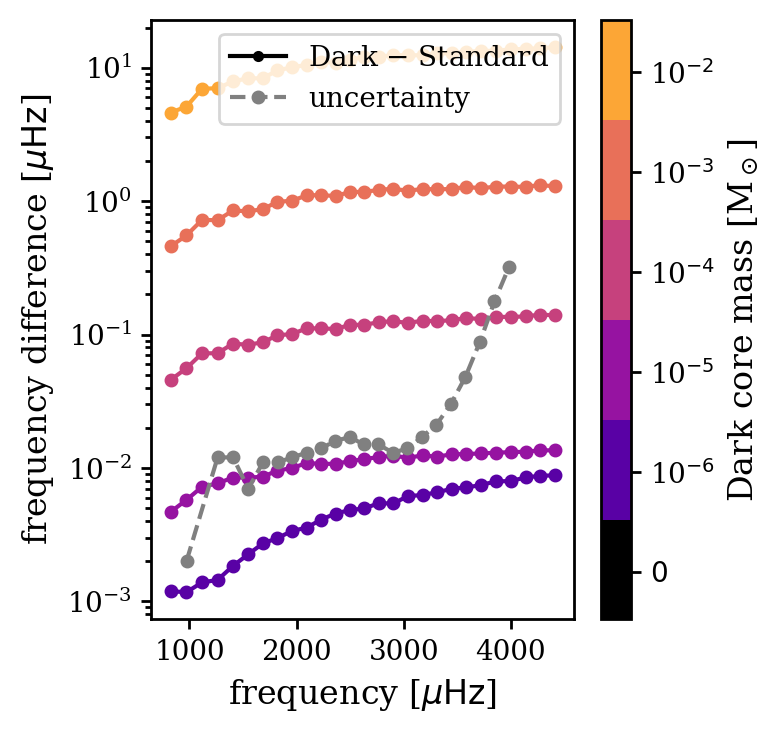

In [90]:
plt.figure(figsize=(width, height))

radial = freq0[freq0.l == 0]
for freqk, mass in zip([freq6, freq5, freq4, freq3, freq2], masses[1:]):
    radk = freqk[freqk.l == 0]
    differences = []
    
    for freq in radial['Re(freq)']:
        closest_freq = radk['Re(freq)'].iloc[(radk['Re(freq)'] - freq).abs().argsort()[:1]]
        diff = np.abs(closest_freq.values[0] - freq)
        differences.append(diff)
    
    plt.plot(radial['Re(freq)'], differences, color=cmap(norm(mass)))
    plt.plot(radial['Re(freq)'], differences, '.', color=cmap(norm(mass)), ms=8)

plt.plot([], [], ls='-', c='k', marker='.', label=r'Dark $-$ Standard')
obs_rad = obs_DF[obs_DF.l == 0]
plt.plot(obs_rad.nu, obs_rad.dnu, '.', c='gray', ms=8, label='uncertainty', ls='--')
#plt.plot(obs_rad.nu, obs_rad.dnu, '.', c='gray', ms=8)

plt.xlabel(r'frequency [$\mu\rm{Hz}$]')
plt.ylabel(r'frequency difference [$\mu\rm{Hz}$]')
plt.legend(loc='upper right')
plt.semilogy()
cbar()

plt.tight_layout()

plt.savefig('figs/radial.pdf')

1e-08 1.113563770589743e-08 -3.1728204497264385e-07 [0.37598575 0.16601186 0.55251289 0.42961212 0.35759568 0.55360112
 0.35336445 0.43006636 0.27128074 0.22342652 0.21841417 0.32182627
 0.37313576 0.14060219 0.189048   0.04259052 0.2666615  0.46147449
 0.89938565 0.92422819 1.1150391  2.17826975]
1e-06 1.1192242486131809e-08 -3.1740609254346877e-07 [0.37713362 0.1673616  0.55416144 0.43146551 0.35956661 0.5553337
 0.35486618 0.43103029 0.27183336 0.22350555 0.2190963  0.32302562
 0.37404619 0.14182736 0.18924402 0.04243057 0.26775278 0.46322106
 0.90256326 0.92836756 1.12067045 2.18521995]
1e-05 1.0973543387964538e-08 -3.1672249689443026e-07 [0.37029445 0.15862642 0.54459312 0.42227012 0.35111607 0.54753229
 0.34858208 0.4263162  0.27014803 0.22186613 0.21529308 0.31808289
 0.36960796 0.13799549 0.18693927 0.04203136 0.26393491 0.45446553
 0.88963998 0.90920878 1.09753923 2.15524909]
0.0001 9.476492207389889e-09 -3.115697749265615e-07 [0.32080208 0.0964526  0.47262862 0.35742426 0.291

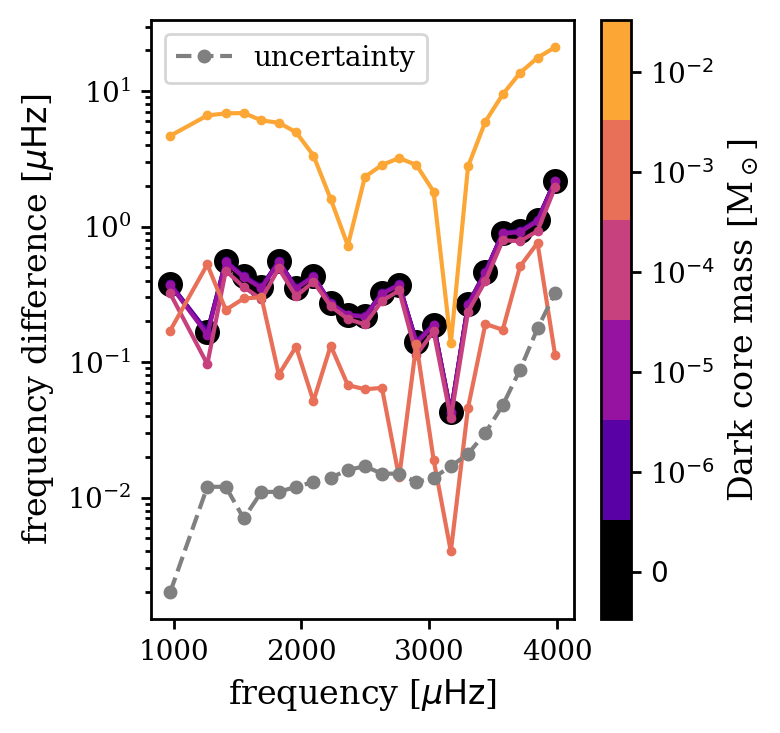

In [91]:
plt.figure(figsize=(width, height))

nu_ac=5000

def fit_surface_term(nu_obs, nu_mod, E_norm, sigma, nu_ac=5000):
    y = (nu_obs - nu_mod) / sigma
    X1 = (nu_mod / nu_ac)**-1 / E_norm
    X2 = (nu_mod / nu_ac)**3 / E_norm
    X = np.vstack([X1, X2]).T / sigma[:, np.newaxis]
    a = np.linalg.lstsq(X, y, rcond=None)[0]  
    return a

radial = obs_DF[obs_DF.l == 0]
for freqk, mass in zip([freq0, freq6, freq5, freq4, freq3, freq2], masses):
    radk = freqk[freqk.l == 0]
    closest_indices = np.abs(radk['Re(freq)'].values[:, None] - radial['nu'].values).argmin(axis=0)
    matched_freqs = radk['Re(freq)'].values[closest_indices]
    matched_inertia = radk['E_norm'].values[closest_indices]
    
    a_minus1, a_3 = fit_surface_term(radial['nu'].values, matched_freqs, matched_inertia, radial['dnu'].values)
    delta_nu = (a_minus1 * (matched_freqs / nu_ac)**-1 + a_3 * (matched_freqs / nu_ac)**3) / matched_inertia
    differences = np.abs(matched_freqs + delta_nu - radial['nu'].values)
    print(mass, a_minus1, a_3, differences)
    
    plt.plot(radial['nu'], differences, color=cmap(norm(mass)), marker='.', ms=5 if mass > 1e-8 else 16)

obs_rad = obs_DF[obs_DF.l == 0]
plt.plot(obs_rad.nu, obs_rad.dnu, c='gray', label='uncertainty', ls='--', marker='.', ms=8)

plt.xlabel(r'frequency [$\mu\rm{Hz}$]')
plt.ylabel(r'frequency difference [$\mu\rm{Hz}$]')
plt.legend()
plt.semilogy()
cbar()
plt.tight_layout()


1e-08 1.113563770589743e-08 -3.1728204497264385e-07 [0.37598575 0.16601186 0.55251289 0.42961212 0.35759568 0.55360112
 0.35336445 0.43006636 0.27128074 0.22342652 0.21841417 0.32182627
 0.37313576 0.14060219 0.189048   0.04259052 0.2666615  0.46147449
 0.89938565 0.92422819 1.1150391  2.17826975]
1e-06 1.1192242486131809e-08 -3.1740609254346877e-07 [0.37713362 0.1673616  0.55416144 0.43146551 0.35956661 0.5553337
 0.35486618 0.43103029 0.27183336 0.22350555 0.2190963  0.32302562
 0.37404619 0.14182736 0.18924402 0.04243057 0.26775278 0.46322106
 0.90256326 0.92836756 1.12067045 2.18521995]
1e-05 1.0973543387964538e-08 -3.1672249689443026e-07 [0.37029445 0.15862642 0.54459312 0.42227012 0.35111607 0.54753229
 0.34858208 0.4263162  0.27014803 0.22186613 0.21529308 0.31808289
 0.36960796 0.13799549 0.18693927 0.04203136 0.26393491 0.45446553
 0.88963998 0.90920878 1.09753923 2.15524909]
0.0001 9.476492207389889e-09 -3.115697749265615e-07 [0.32080208 0.0964526  0.47262862 0.35742426 0.291

(-0.1, 1.0)

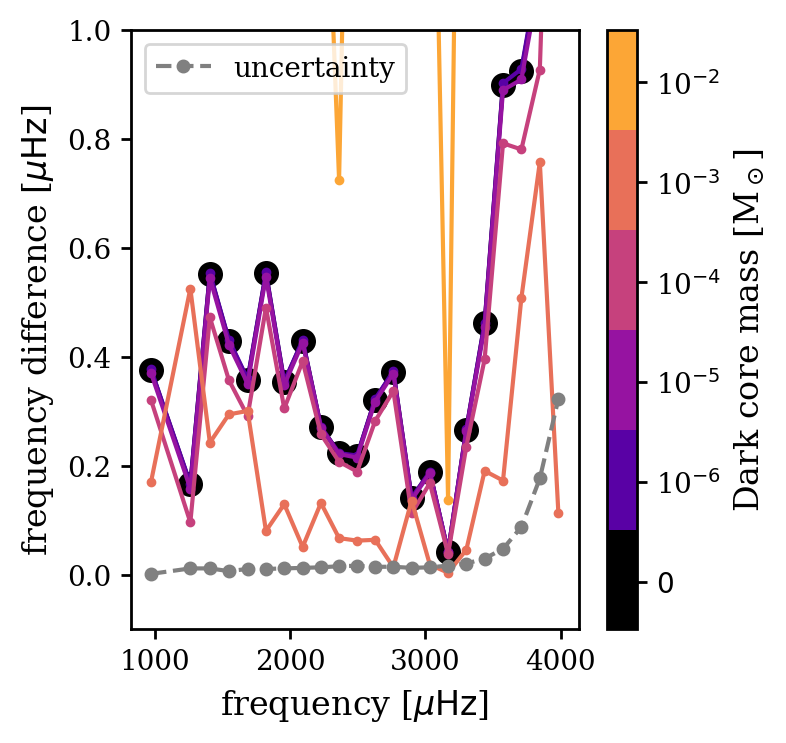

In [92]:
plt.figure(figsize=(width, height))

def fit_surface_term(nu_obs, nu_mod, E_norm, sigma, nu_ac=5000):
    y = (nu_obs - nu_mod) / sigma
    X1 = (nu_mod / nu_ac)**-1 / E_norm
    X2 = (nu_mod / nu_ac)**3 / E_norm
    X = np.vstack([X1, X2]).T / sigma[:, np.newaxis]
    a = np.linalg.lstsq(X, y, rcond=None)[0]  # Use least squares for better stability
    return a

radial = obs_DF[obs_DF.l == 0]
for freqk, mass in zip([freq0, freq6, freq5, freq4, freq3, freq2], masses):
    radk = freqk[freqk.l == 0]
    closest_indices = np.abs(radk['Re(freq)'].values[:, None] - radial['nu'].values).argmin(axis=0)
    matched_freqs = radk['Re(freq)'].values[closest_indices]
    matched_inertia = radk['E_norm'].values[closest_indices]
    #print(mass, matched_freqs - radial['nu'].values)
    
    a_minus1, a_3 = fit_surface_term(radial['nu'].values, matched_freqs, matched_inertia, radial['dnu'].values)
    delta_nu = (a_minus1 * (matched_freqs / nu_ac)**-1 + a_3 * (matched_freqs / nu_ac)**3) / matched_inertia
    differences = np.abs(matched_freqs + delta_nu - radial['nu'].values)
    print(mass, a_minus1, a_3, differences)
    
    plt.plot(radial['nu'], differences, color=cmap(norm(mass)), marker='.', ms=5 if mass > 1e-8 else 16)

obs_rad = obs_DF[obs_DF.l == 0]
plt.plot(obs_rad.nu, obs_rad.dnu, c='gray', label='uncertainty', ls='--', marker='.', ms=8)

plt.xlabel(r'frequency [$\mu\rm{Hz}$]')
plt.ylabel(r'frequency difference [$\mu\rm{Hz}$]')
plt.legend()
#plt.semilogy()
cbar()
plt.tight_layout()
plt.ylim(-0.1, 1)


1e-08 1.113563770589743e-08 -3.1728204497264385e-07 [0.37598575 0.16601186 0.55251289 0.42961212 0.35759568 0.55360112
 0.35336445 0.43006636 0.27128074 0.22342652 0.21841417 0.32182627
 0.37313576 0.14060219 0.189048   0.04259052 0.2666615  0.46147449
 0.89938565 0.92422819 1.1150391  2.17826975]
1e-06 1.1192242486131809e-08 -3.1740609254346877e-07 [0.37713362 0.1673616  0.55416144 0.43146551 0.35956661 0.5553337
 0.35486618 0.43103029 0.27183336 0.22350555 0.2190963  0.32302562
 0.37404619 0.14182736 0.18924402 0.04243057 0.26775278 0.46322106
 0.90256326 0.92836756 1.12067045 2.18521995]
1e-05 1.0973543387964538e-08 -3.1672249689443026e-07 [0.37029445 0.15862642 0.54459312 0.42227012 0.35111607 0.54753229
 0.34858208 0.4263162  0.27014803 0.22186613 0.21529308 0.31808289
 0.36960796 0.13799549 0.18693927 0.04203136 0.26393491 0.45446553
 0.88963998 0.90920878 1.09753923 2.15524909]
0.0001 9.476492207389889e-09 -3.115697749265615e-07 [0.32080208 0.0964526  0.47262862 0.35742426 0.291

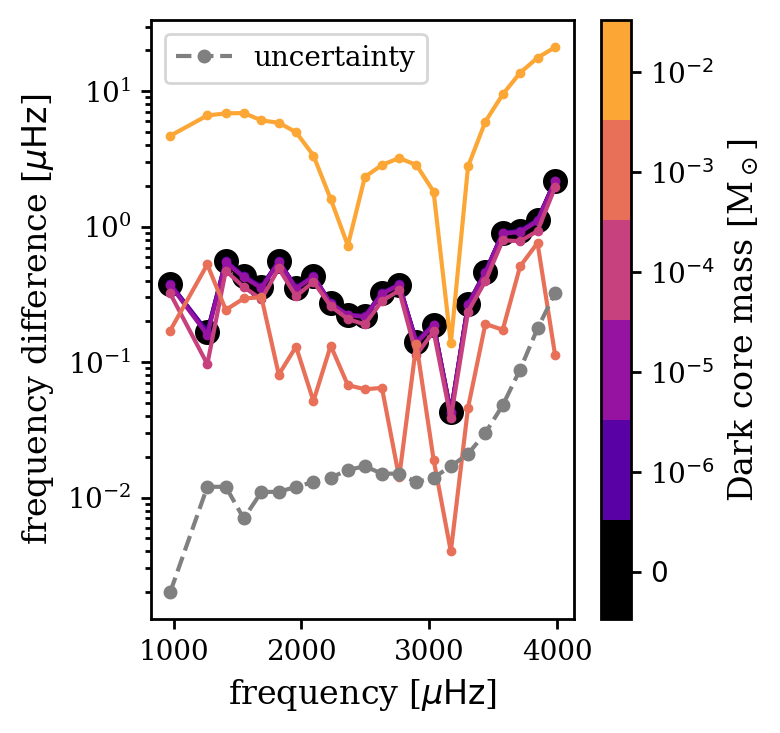

In [93]:
plt.figure(figsize=(width, height))

def fit_surface_term(nu_obs, nu_mod, E_norm, sigma, nu_ac=5000):
    y = (nu_obs - nu_mod) / sigma
    X1 = (nu_mod / nu_ac)**-1 / E_norm
    X2 = (nu_mod / nu_ac)**3 / E_norm
    X = np.vstack([X1, X2]).T / sigma[:, np.newaxis]
    a = np.linalg.lstsq(X, y, rcond=None)[0]  # Use least squares for better stability
    return a

radial = obs_DF[obs_DF.l == 0]
for freqk, mass in zip([freq0, freq6, freq5, freq4, freq3, freq2], masses):
    radk = freqk[freqk.l == 0]
    closest_indices = np.abs(radk['Re(freq)'].values[:, None] - radial['nu'].values).argmin(axis=0)
    matched_freqs = radk['Re(freq)'].values[closest_indices]
    matched_inertia = radk['E_norm'].values[closest_indices]
    #print(mass, matched_freqs - radial['nu'].values)
    
    a_minus1, a_3 = fit_surface_term(radial['nu'].values, matched_freqs, matched_inertia, radial['dnu'].values)
    delta_nu = (a_minus1 * (matched_freqs / nu_ac)**-1 + a_3 * (matched_freqs / nu_ac)**3) / matched_inertia
    differences = np.abs(matched_freqs + delta_nu - radial['nu'].values)
    print(mass, a_minus1, a_3, differences)
    
    plt.plot(radial['nu'], differences, color=cmap(norm(mass)), marker='.', ms=5 if mass > 1e-8 else 16)

obs_rad = obs_DF[obs_DF.l == 0]
plt.plot(obs_rad.nu, obs_rad.dnu, c='gray', label='uncertainty', ls='--', marker='.', ms=8)

plt.xlabel(r'frequency [$\mu\rm{Hz}$]')
plt.ylabel(r'frequency difference [$\mu\rm{Hz}$]')
plt.legend()
plt.semilogy()
cbar()
plt.tight_layout()
plt.savefig('figs/radial-sun.pdf')


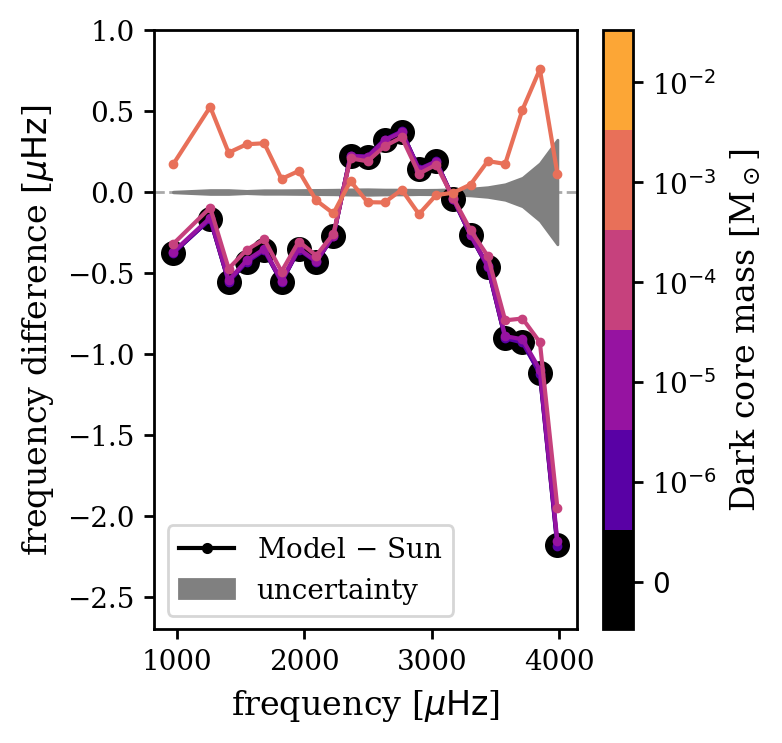

In [94]:
plt.figure(figsize=(width, height))

def fit_surface_term(nu_obs, nu_mod, E_norm, sigma, nu_ac=5000):
    y = (nu_obs - nu_mod) / sigma
    X1 = (nu_mod / nu_ac)**-1 / E_norm
    X2 = (nu_mod / nu_ac)**3 / E_norm
    X = np.vstack([X1, X2]).T / sigma[:, np.newaxis]
    a = np.linalg.lstsq(X, y, rcond=None)[0]  # Use least squares for better stability
    return a

radial = obs_DF[obs_DF.l == 0]
for freqk, mass in zip([freq0, freq6, freq5, freq4, freq3], masses[:-1]):
    radk = freqk[freqk.l == 0]
    closest_indices = np.abs(radk['Re(freq)'].values[:, None] - radial['nu'].values).argmin(axis=0)
    matched_freqs = radk['Re(freq)'].values[closest_indices]
    matched_inertia = radk['E_norm'].values[closest_indices]
    #print(mass, matched_freqs - radial['nu'].values)
    
    a_minus1, a_3 = fit_surface_term(radial['nu'].values, matched_freqs, matched_inertia, radial['dnu'].values)
    delta_nu = (a_minus1 * (matched_freqs / nu_ac)**-1 + a_3 * (matched_freqs / nu_ac)**3) / matched_inertia
    differences = matched_freqs + delta_nu - radial['nu'].values
    #print(mass, a_minus1, a_3, differences)
    
    plt.plot(radial['nu'], differences, color=cmap(norm(mass)), marker='.', ms=5 if mass > 1e-8 else 16)

plt.plot([], [], ls='-', c='k', marker='.', label=r'Model $-$ Sun')
obs_rad = obs_DF[obs_DF.l == 0]
#plt.plot(obs_rad.nu, obs_rad.dnu, c='gray', label='uncertainty', ls='--', marker='.', ms=8)
plt.axhline(0, ls='--', lw=1, c='darkgray', zorder=-999)
plt.fill_between(obs_rad.nu, obs_rad.dnu, color='gray', label='uncertainty')
plt.fill_between(obs_rad.nu, -obs_rad.dnu, color='gray')

plt.xlabel(r'frequency [$\mu\rm{Hz}$]')
plt.ylabel(r'frequency difference [$\mu\rm{Hz}$]')
plt.legend(loc='lower left')
#plt.semilogy()
cbar()
plt.tight_layout()
plt.ylim(-2.7, 1)

plt.savefig('figs/radial-sun.pdf')

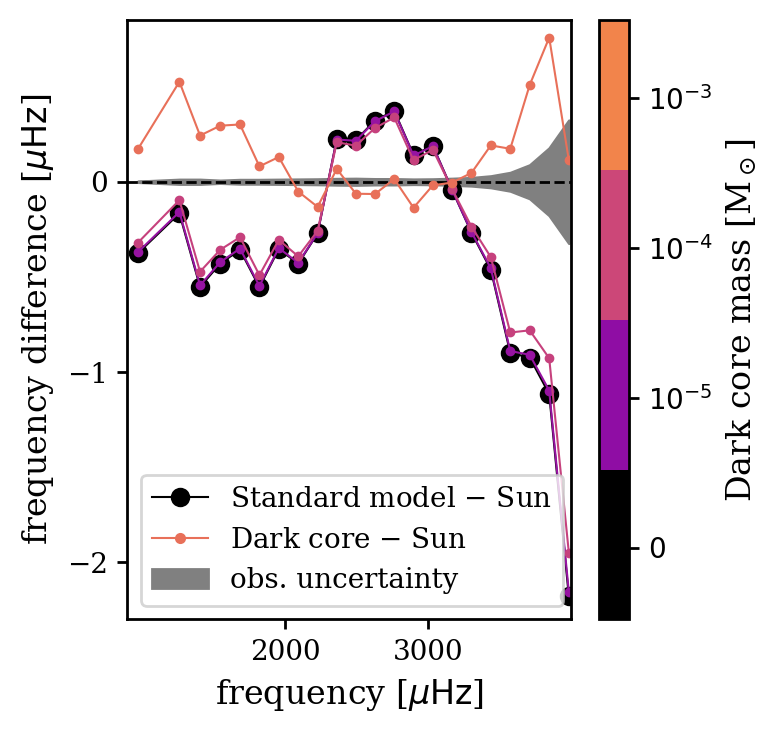

In [95]:
plt.figure(figsize=(width, height))

def fit_surface_term(nu_obs, nu_mod, E_norm, sigma, nu_ac=5000):
    y = (nu_obs - nu_mod) / sigma
    X1 = (nu_mod / nu_ac)**-1 / E_norm
    X2 = (nu_mod / nu_ac)**3 / E_norm
    X = np.vstack([X1, X2]).T / sigma[:, np.newaxis]
    a = np.linalg.lstsq(X, y, rcond=None)[0]  
    return a

def fit_surface_term(nu_obs, nu_mod, E_norm, sigma, nu_ac=5000):
    y = nu_obs - nu_mod 
    W = np.diag(1 / sigma**2) 
    X1 = (nu_mod / nu_ac)**-1 / E_norm
    X2 = (nu_mod / nu_ac)**3 / E_norm
    X = np.vstack([X1, X2]).T 
    a = np.linalg.solve(X.T @ W @ X, X.T @ W @ y) 
    return a

radial = obs_DF[obs_DF.l == 0]
for freqk, mass in zip([freq0, freq5, freq4, freq3], masses53):
    radk = freqk[freqk.l == 0]
    closest_indices = np.abs(radk['Re(freq)'].values[:, None] - radial['nu'].values).argmin(axis=0)
    matched_freqs = radk['Re(freq)'].values[closest_indices]
    matched_inertia = radk['E_norm'].values[closest_indices]
    #print(mass, matched_freqs - radial['nu'].values)
    
    a_minus1, a_3 = fit_surface_term(radial['nu'].values, matched_freqs, matched_inertia, radial['dnu'].values)
    delta_nu = (a_minus1 * (matched_freqs / nu_ac)**-1 + a_3 * (matched_freqs / nu_ac)**3) / matched_inertia
    differences = matched_freqs + delta_nu - radial['nu'].values
    #print(mass, a_minus1, a_3, differences)
    
    plt.plot(radial['nu'], differences, color=cmap(norm(mass)), marker='.', ms=5 if mass > 1e-8 else 12, lw=0.75)

plt.plot([], [], ls='-', c='k', marker='.', label=r'Standard model $-$ Sun', lw=0.75, ms=12)
plt.plot([], [], ls='-', c=cmap(norm(1e-3)), marker='.', label=r'Dark core $-$ Sun', lw=0.75)
obs_rad = obs_DF[obs_DF.l == 0]
#plt.plot(obs_rad.nu, obs_rad.dnu, c='gray', label='uncertainty', ls='--', marker='.', ms=8)
plt.axhline(0, ls='--', lw=1, c='k', zorder=-99)
plt.fill_between(obs_rad.nu, obs_rad.dnu, color='gray', label='obs. uncertainty', zorder=-999)
plt.fill_between(obs_rad.nu, -obs_rad.dnu, color='gray', zorder=-999)

plt.xlabel(r'frequency [$\mu\rm{Hz}$]')
plt.ylabel(r'frequency difference [$\mu\rm{Hz}$]')
plt.legend(loc='lower left')
plt.gca().set_yticks([-2, -1, 0])
plt.gca().set_xticks([2000, 3000])
#plt.semilogy()
cbar_53()
plt.tight_layout()
plt.xlim([900, 4000])
plt.ylim(-2.3, 0.85)

plt.savefig('figs/radial-sun.pdf')

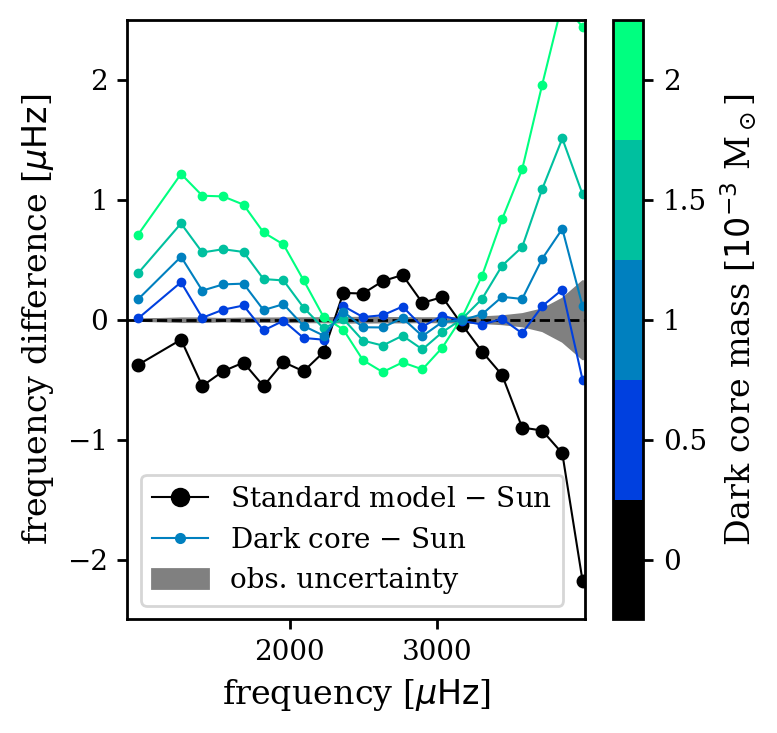

In [96]:
freqs_dense = [pd.read_table('dark-core-calibrate/LOGS_solar/solar-freqs.dat', skiprows=5, sep='\s+'),
              pd.read_table('dark-core-calibrate/griddense2/LOGS_-3.2/solar-freqs.dat', skiprows=5, sep='\s+'),
              pd.read_table('dark-core-calibrate/griddense/LOGS_2.0/solar-freqs.dat', skiprows=5, sep='\s+'),
              #gyre.load_gyre('dark-core-calibrate/griddense/LOGS_1.8/solar.data.GYRE'), 
              #gyre.load_gyre('dark-core-calibrate/griddense/LOGS_1.6/solar.data.GYRE'), 
              pd.read_table('dark-core-calibrate/griddense/LOGS_1.4/solar-freqs.dat', skiprows=5, sep='\s+'),
              #gyre.load_gyre('dark-core-calibrate/griddense/LOGS_1.2/solar.data.GYRE'),
              pd.read_table('dark-core-calibrate/griddense/LOGS_1.0/solar-freqs.dat', skiprows=5, sep='\s+')
              #gyre.load_gyre('dark-core-calibrate/griddense/LOGS_0.8/solar.data.GYRE')
             ]

plt.figure(figsize=(width, height))

def fit_surface_term(nu_obs, nu_mod, E_norm, sigma, nu_ac=5000):
    y = (nu_obs - nu_mod) / sigma
    X1 = (nu_mod / nu_ac)**-1 / E_norm
    X2 = (nu_mod / nu_ac)**3 / E_norm
    X = np.vstack([X1, X2]).T / sigma[:, np.newaxis]
    a = np.linalg.lstsq(X, y, rcond=None)[0]  # Use least squares for better stability
    return a

radial = obs_DF[obs_DF.l == 0]
for freqk, mass in zip(freqs_dense, mass_dense):
    radk = freqk[freqk.l == 0]
    closest_indices = np.abs(radk['Re(freq)'].values[:, None] - radial['nu'].values).argmin(axis=0)
    matched_freqs = radk['Re(freq)'].values[closest_indices]
    matched_inertia = radk['E_norm'].values[closest_indices]
    #print(mass, matched_freqs - radial['nu'].values)
    
    a_minus1, a_3 = fit_surface_term(radial['nu'].values, matched_freqs, matched_inertia, radial['dnu'].values)
    delta_nu = (a_minus1 * (matched_freqs / nu_ac)**-1 + a_3 * (matched_freqs / nu_ac)**3) / matched_inertia
    differences = matched_freqs + delta_nu - radial['nu'].values
    #print(mass, a_minus1, a_3, differences)
    
    plt.plot(radial['nu'], differences, color=cmap_dense(norm_dense(mass)), marker='.', ms=5 if mass > 1e-8 else 8, lw=0.75)

plt.plot([], [], ls='-', c='k', marker='.', label=r'Standard model $-$ Sun', lw=0.75, ms=12)
plt.plot([], [], ls='-', c=cmap_dense(norm_dense(1e-3)), marker='.', label=r'Dark core $-$ Sun', lw=0.75)
obs_rad = obs_DF[obs_DF.l == 0]
#plt.plot(obs_rad.nu, obs_rad.dnu, c='gray', label='uncertainty', ls='--', marker='.', ms=8)
plt.axhline(0, ls='--', lw=1, c='k', zorder=-99)
plt.fill_between(obs_rad.nu, obs_rad.dnu, color='gray', label='obs. uncertainty', zorder=-999)
plt.fill_between(obs_rad.nu, -obs_rad.dnu, color='gray', zorder=-999)

plt.xlabel(r'frequency [$\mu\rm{Hz}$]')
plt.ylabel(r'frequency difference [$\mu\rm{Hz}$]')
plt.legend(loc='lower left')
plt.gca().set_xticks([2000, 3000])
#plt.semilogy()
cbar_dense()
plt.tight_layout()
plt.xlim([900, 4000])
plt.ylim(-2.5, 2.5)

plt.savefig('figs/radial-sun-dense.pdf')

(-2.7, 0.6)

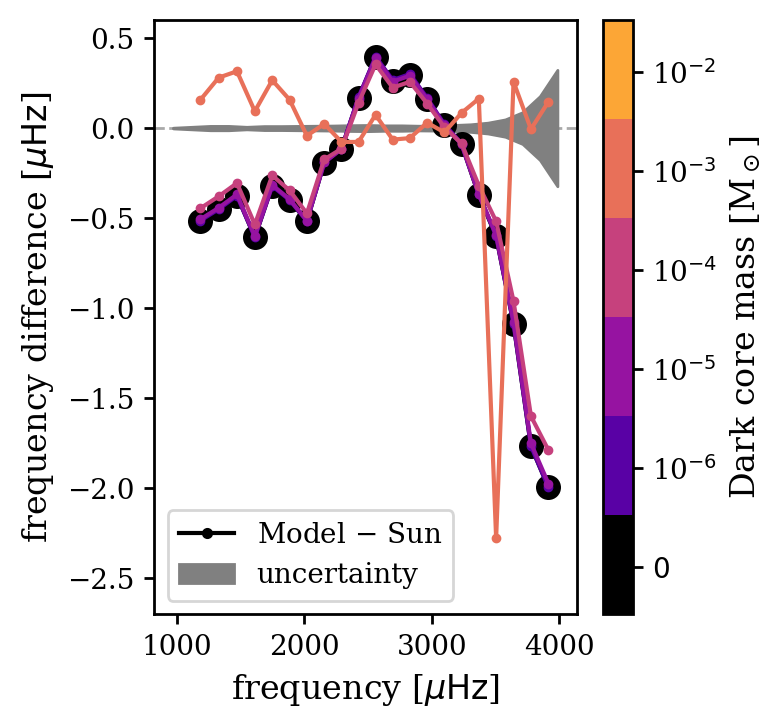

In [97]:
plt.figure(figsize=(width, height))

def fit_surface_term(nu_obs, nu_mod, E_norm, sigma, nu_ac=5000):
    y = (nu_obs - nu_mod) / sigma
    X1 = (nu_mod / nu_ac)**-1 / E_norm
    X2 = (nu_mod / nu_ac)**3 / E_norm
    X = np.vstack([X1, X2]).T / sigma[:, np.newaxis]
    a = np.linalg.lstsq(X, y, rcond=None)[0]  # Use least squares for better stability
    return a

radial = obs_DF[obs_DF.l == 0]
dipole = obs_DF[obs_DF.l == 1]
for freqk, mass in zip([freq0, freq6, freq5, freq4, freq3], masses[:-1]):
    radk = freqk[freqk.l == 0]
    closest_indices = np.abs(radk['Re(freq)'].values[:, None] - radial['nu'].values).argmin(axis=0)
    matched_freqs = radk['Re(freq)'].values[closest_indices]
    matched_inertia = radk['E_norm'].values[closest_indices]
    #print(mass, matched_freqs - radial['nu'].values)
    
    a_minus1, a_3 = fit_surface_term(radial['nu'].values, matched_freqs, matched_inertia, radial['dnu'].values)
    delta_nu = (a_minus1 * (matched_freqs / nu_ac)**-1 + a_3 * (matched_freqs / nu_ac)**3) / matched_inertia
    differences = matched_freqs + delta_nu - radial['nu'].values
    #print(mass, a_minus1, a_3, differences)
    
    radk = freqk[freqk.l == 1]
    #print(radk)
    #if mass < 1e-4:
    #    radk = radk[radk.n_g == 0]
    radk = radk[radk.E_norm < 1e-5]
    closest_indices = np.abs(radk['Re(freq)'].values[:, None] - dipole['nu'].values).argmin(axis=0)
    matched_freqs = radk['Re(freq)'].values[closest_indices]
    matched_inertia = radk['E_norm'].values[closest_indices]
    delta_nu = (a_minus1 * (matched_freqs / nu_ac)**-1 + a_3 * (matched_freqs / nu_ac)**3) / matched_inertia
    differences = matched_freqs + delta_nu - dipole['nu'].values
    
    plt.plot(dipole['nu'], differences, color=cmap(norm(mass)), marker='.', ms=5 if mass > 1e-8 else 16)

plt.plot([], [], ls='-', c='k', marker='.', label=r'Model $-$ Sun')
obs_rad = obs_DF[obs_DF.l == 0]
#plt.plot(obs_rad.nu, obs_rad.dnu, c='gray', label='uncertainty', ls='--', marker='.', ms=8)
plt.axhline(0, ls='--', lw=1, c='darkgray', zorder=-999)
plt.fill_between(obs_rad.nu, obs_rad.dnu, color='gray', label='uncertainty')
plt.fill_between(obs_rad.nu, -obs_rad.dnu, color='gray')

plt.xlabel(r'frequency [$\mu\rm{Hz}$]')
plt.ylabel(r'frequency difference [$\mu\rm{Hz}$]')
plt.legend(loc='lower left')
#plt.semilogy()
cbar()
plt.tight_layout()
plt.ylim(-2.7, 0.6)

#plt.savefig('figs/radial-sun.pdf')

(-2.7, 0.6)

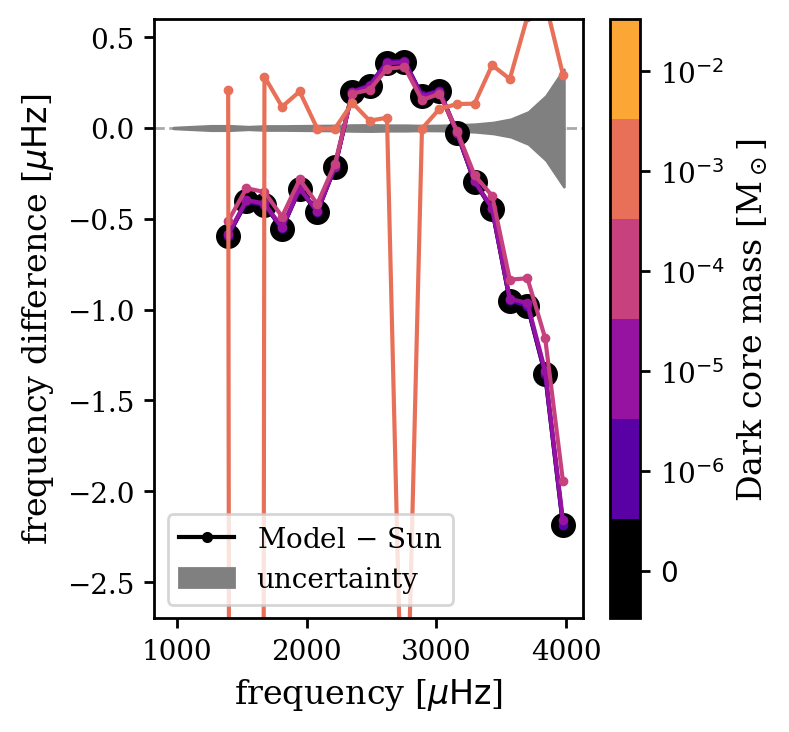

In [98]:
plt.figure(figsize=(width, height))

def fit_surface_term(nu_obs, nu_mod, E_norm, sigma, nu_ac=5000):
    y = (nu_obs - nu_mod) / sigma
    X1 = (nu_mod / nu_ac)**-1 / E_norm
    X2 = (nu_mod / nu_ac)**3 / E_norm
    X = np.vstack([X1, X2]).T / sigma[:, np.newaxis]
    a = np.linalg.lstsq(X, y, rcond=None)[0]  # Use least squares for better stability
    return a

radial = obs_DF[obs_DF.l == 0]
dipole = obs_DF[obs_DF.l == 2]
for freqk, mass in zip([freq0, freq6, freq5, freq4, freq3], masses[:-1]):
    radk = freqk[freqk.l == 0]
    closest_indices = np.abs(radk['Re(freq)'].values[:, None] - radial['nu'].values).argmin(axis=0)
    matched_freqs = radk['Re(freq)'].values[closest_indices]
    matched_inertia = radk['E_norm'].values[closest_indices]
    #print(mass, matched_freqs - radial['nu'].values)
    
    a_minus1, a_3 = fit_surface_term(radial['nu'].values, matched_freqs, matched_inertia, radial['dnu'].values)
    delta_nu = (a_minus1 * (matched_freqs / nu_ac)**-1 + a_3 * (matched_freqs / nu_ac)**3) / matched_inertia
    differences = matched_freqs + delta_nu - radial['nu'].values
    #print(mass, a_minus1, a_3, differences)
    
    radk = freqk[freqk.l == 2]
    #print(radk)
    #if mass < 1e-4:
    #    radk = radk[radk.n_g == 0]
    #radk = radk[radk.E_norm < 1e-5]
    closest_indices = np.abs(radk['Re(freq)'].values[:, None] - dipole['nu'].values).argmin(axis=0)
    matched_freqs = radk['Re(freq)'].values[closest_indices]
    matched_inertia = radk['E_norm'].values[closest_indices]
    delta_nu = (a_minus1 * (matched_freqs / nu_ac)**-1 + a_3 * (matched_freqs / nu_ac)**3) / matched_inertia
    differences = matched_freqs + delta_nu - dipole['nu'].values
    
    plt.plot(dipole['nu'], differences, color=cmap(norm(mass)), marker='.', ms=5 if mass > 1e-8 else 16)

plt.plot([], [], ls='-', c='k', marker='.', label=r'Model $-$ Sun')
obs_rad = obs_DF[obs_DF.l == 0]
#plt.plot(obs_rad.nu, obs_rad.dnu, c='gray', label='uncertainty', ls='--', marker='.', ms=8)
plt.axhline(0, ls='--', lw=1, c='darkgray', zorder=-999)
plt.fill_between(obs_rad.nu, obs_rad.dnu, color='gray', label='uncertainty')
plt.fill_between(obs_rad.nu, -obs_rad.dnu, color='gray')

plt.xlabel(r'frequency [$\mu\rm{Hz}$]')
plt.ylabel(r'frequency difference [$\mu\rm{Hz}$]')
plt.legend(loc='lower left')
#plt.semilogy()
cbar()
plt.tight_layout()
plt.ylim(-2.7, 0.6)

#plt.savefig('figs/radial-sun.pdf')

In [99]:
radial = obs_DF[obs_DF.l == 0]
freqk = freq3
radk = freqk[freqk.l == 0]
closest_indices = np.abs(radk['Re(freq)'].values[:, None] - radial['nu'].values).argmin(axis=0)
matched_freqs = radk['Re(freq)'].values[closest_indices]
matched_inertia = radk['E_norm'].values[closest_indices]
a_minus1, a_3 = fit_surface_term(radial['nu'].values, matched_freqs, matched_inertia, radial['dnu'].values)

corr = freq3.copy()
delta_nu = (a_minus1 * (corr['Re(freq)'] / nu_ac)**-1 + a_3 * (corr['Re(freq)'] / nu_ac)**3) / corr['E_norm']
corr['Re(freq)'] = corr['Re(freq)'] + delta_nu
corr

E_norm     Re(freq)  Im(freq)  l  n_g  n_p  n_pg
0    3.298089e-05   825.405224       0.0  0    0    5     5
1    1.268896e-05   972.783912       0.0  0    0    6     6
2    5.383712e-06  1118.207765       0.0  0    0    7     7
3    2.322499e-06  1263.687450       0.0  0    0    8     8
4    1.030737e-06  1407.723828       0.0  0    0    9     9
..            ...          ...       ... ..  ...  ...   ...
191  8.780526e-09  4037.546521       0.0  3   10   27    17
192  1.999448e-01  4165.745960       0.0  3    9   27    18
193  9.022899e-09  4174.886061       0.0  3    9   28    19
194  9.384773e-09  4312.536061       0.0  3    9   29    20
195  9.882577e-09  4450.226181       0.0  3    9   30    21

[196 rows x 7 columns]

In [100]:
corr.to_csv('m3_corr3.csv', index=False)

In [101]:
radial = obs_DF[obs_DF.l == 0]
freqk = freqS
radk = freqk[freqk.l == 0]
closest_indices = np.abs(radk['Re(freq)'].values[:, None] - radial['nu'].values).argmin(axis=0)
matched_freqs = radk['Re(freq)'].values[closest_indices]
matched_inertia = radk['E_norm'].values[closest_indices]
a_minus1, a_3 = fit_surface_term(radial['nu'].values, matched_freqs, matched_inertia, radial['dnu'].values)

corr = freqk.copy()
delta_nu = (a_minus1 * (corr['Re(freq)'] / nu_ac)**-1 + a_3 * (corr['Re(freq)'] / nu_ac)**3) / corr['E_norm']
corr['Re(freq)'] = corr['Re(freq)'] + delta_nu
corr

E_norm     Re(freq)  Im(freq)  l  n_g  n_p  n_pg
0    3.261040e-05   825.381209       0.0  0    0    5     5
1    1.246050e-05   972.767514       0.0  0    0    6     6
2    5.263073e-06  1118.175592       0.0  0    0    7     7
3    2.257430e-06  1263.554946       0.0  0    0    8     8
4    9.957499e-07  1407.664147       0.0  0    0    9     9
..            ...          ...       ... ..  ...  ...   ...
103  7.141657e-09  3899.675895       0.0  3    0   26    26
104  7.240226e-09  4036.802770       0.0  3    0   27    27
105  7.384791e-09  4173.923726       0.0  3    0   28    28
106  7.610767e-09  4311.389036       0.0  3    0   29    29
107  7.924682e-09  4448.945903       0.0  3    0   30    30

[108 rows x 7 columns]

In [102]:
corr.to_csv('mS_corr.csv', index=False)

<Figure size 1000x600 with 0 Axes>

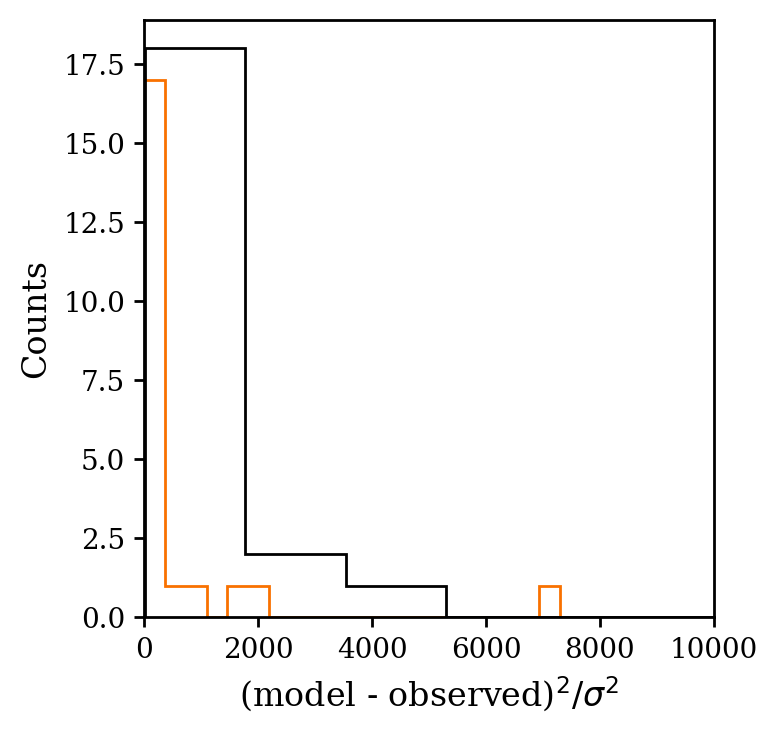

In [103]:
plt.figure(figsize=(10, 6))

def calculate_chi2(obs_freq, model_freq, sigma):
    return np.sum(((obs_freq - model_freq)**2 / sigma)**2)

chi2_values = []
sigma_diffs = []

radial = obs_DF[obs_DF.l == 0]
for freqk, mass in zip([freq0, freq3], [m0, m3]):
    radk = freqk[freqk.l == 0]
    closest_indices = np.abs(radk['Re(freq)'].values[:, None] - radial['nu'].values).argmin(axis=0)
    matched_freqs = radk['Re(freq)'].values[closest_indices]
    matched_inertia = radk['E_norm'].values[closest_indices]
    
    a_minus1, a_3 = fit_surface_term(radial['nu'].values, matched_freqs, matched_inertia, radial['dnu'].values)
    delta_nu = (a_minus1 * (matched_freqs / nu_ac)**-1 + a_3 * (matched_freqs / nu_ac)**3) / matched_inertia
    differences = matched_freqs + delta_nu - radial['nu'].values
    
    chi2_values += [differences**2 / radial['dnu'].values**2]
    sigma_diffs += [np.abs(differences) / radial['dnu'].values]

chi2_m3 = chi2_values[1]
chi2_m0 = chi2_values[0]

sdiffs_m3 = sigma_diffs[1]
sdiffs_m0 = sigma_diffs[0]

plt.figure(figsize=(width, height))
plt.hist(chi2_m3, color=orange, bins=20, histtype='step')
plt.hist(chi2_m0, color='k', bins=20, histtype='step')
#sns.kdeplot(chi2_m3, color=orange, fill=True, label='Model 3')
#sns.kdeplot(chi2_m0, color='k', fill=True, label='Model 0')
plt.xlabel('(model - observed)$^2/\sigma^2$')
plt.ylabel(r'Counts')
plt.xlim([0, 10000])
plt.tight_layout()
#plt.semilogx()

plt.show()


In [104]:
np.sum(chi2_m0)/(len(chi2_m0)-3)

2633.4311945807553

In [105]:
np.sum(chi2_m3)/(len(chi2_m3)-4)

705.5253954652978

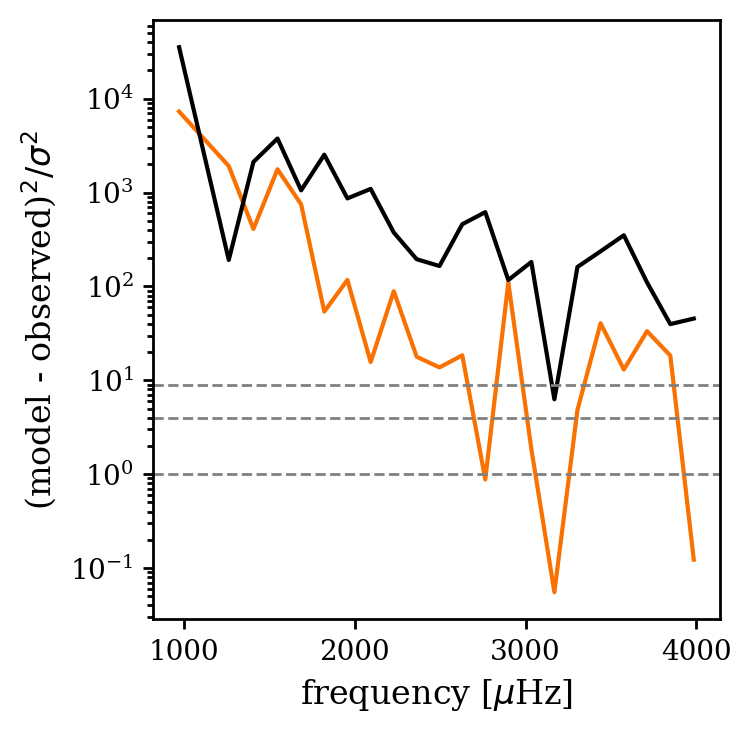

In [106]:
plt.figure(figsize=(width, height))
plt.plot(radial['nu'], chi2_m3, color=orange)
plt.plot(radial['nu'], chi2_m0, color='k')
plt.xlabel(r'frequency [$\mu$Hz]')
plt.ylabel(r'(model - observed)$^2/\sigma^2$')
#plt.xlim([0, 10000])
plt.tight_layout()
#plt.ylim([0, 1000])
plt.axhline(1, ls='--', lw=1, c='gray')
plt.axhline(2**2, ls='--', lw=1, c='gray')
plt.axhline(3**2, ls='--', lw=1, c='gray')
plt.semilogy()
#plt.semilogx()

plt.show()

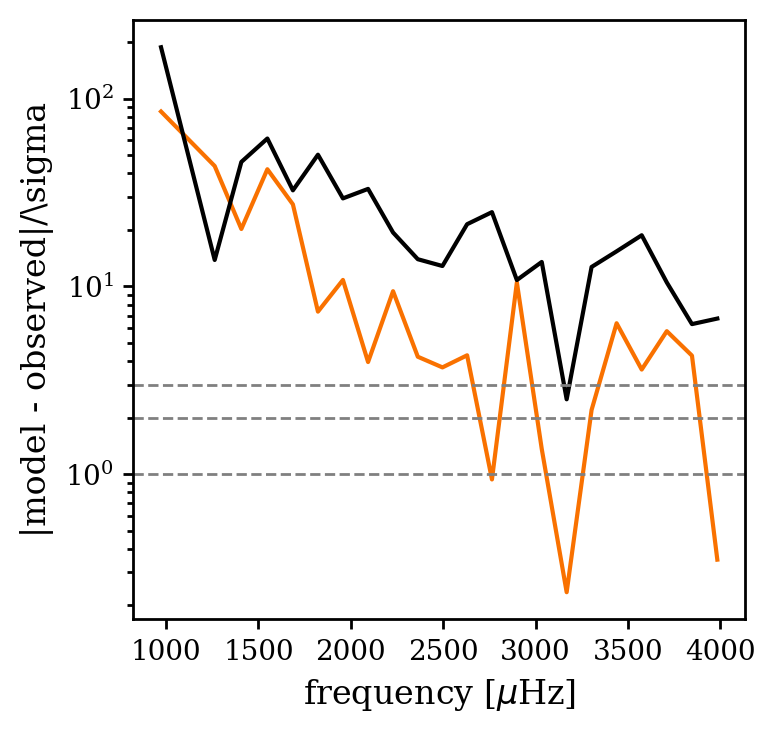

In [107]:
plt.figure(figsize=(width, height))
plt.plot(radial['nu'], sdiffs_m3, color=orange)
plt.plot(radial['nu'], sdiffs_m0, color='k')
plt.xlabel(r'frequency [$\mu$Hz]')
plt.ylabel(r'|model - observed|/\sigma')
#plt.xlim([0, 10000])
plt.tight_layout()
#plt.ylim([0, 1000])
plt.axhline(1, ls='--', lw=1, c='gray')
plt.axhline(2, ls='--', lw=1, c='gray')
plt.axhline(3, ls='--', lw=1, c='gray')
plt.semilogy()
#plt.semilogx()

plt.show()

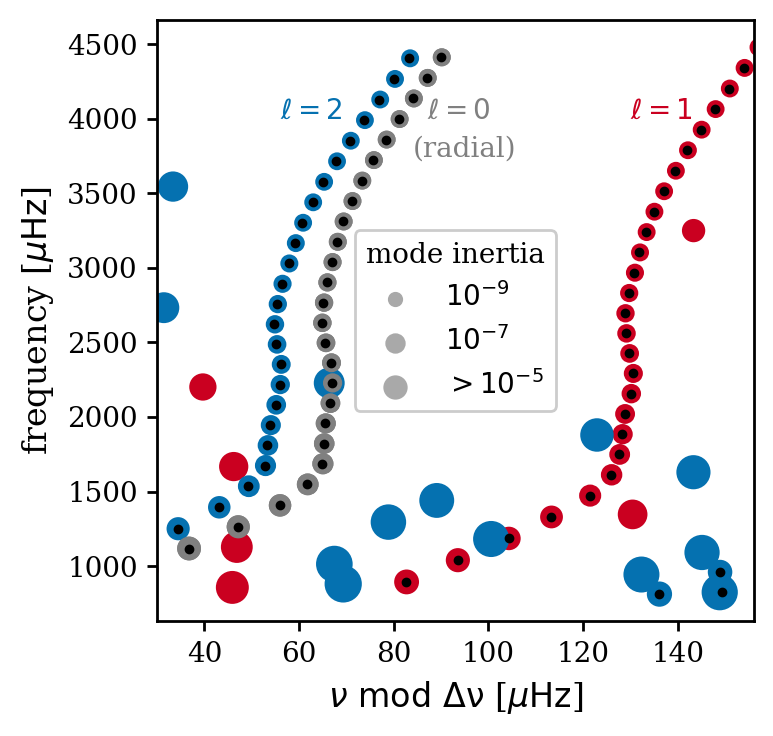

In [108]:
plt.figure(figsize=(width, height))

ref = freq0.copy()
ref = ref[ref.l <= 2]
#ref = ref[ref.n_p > 7]

plt.plot(ref['Re(freq)'] % 135.1, ref['Re(freq)'], 'k.', label=r'$M = 0$', ms=5)
plt.plot(ref['Re(freq)'] % 135.1 + 135.1, ref['Re(freq)'], 'k.', ms=5)
#plt.plot(obs_DF.nu % 135.1, obs_DF.nu, 'k.', ms=2)
#plt.plot(obs_DF.nu % 135.1 + 135.1, obs_DF.nu, 'k.', ms=2)

freqk = freq4.copy()
freqk = freqk[freqk.l <= 2]
#freqk = freqk[freqk.n_p > 7]

sizes = np.log10(freqk['E_norm'])
sizes = 10*(sizes + 11)  # Scale for plotting, adjust as necessary
colors = ['gray', red, blue]
plt.scatter(freqk['Re(freq)'] % 135.1, freqk['Re(freq)'], s=sizes, 
            c=[colors[l] for l in freqk['l'].values], 
            label=r'$M = 10^{-4}~\rm{M}_\odot$', zorder=-999)
plt.scatter(freqk['Re(freq)'] % 135.1 + 135.1, freqk['Re(freq)'], s=sizes, 
            c=[colors[l] for l in freqk['l'].values],
           zorder=-999)
radk = freqk[freqk.l == 0]
plt.scatter(radk['Re(freq)'] % 135.1, radk['Re(freq)'], s=sizes[freqk.l==0], c='gray', zorder=-998)

plt.xlabel(r'$\nu~\rm{ mod }~\Delta\nu$ [$\mu\rm{Hz}$]')
plt.ylabel(r'frequency [$\mu\rm{Hz}$]')

#plt.xlim([30, 165])

# Creating legend for sizes
handles = [
    plt.scatter([], [], s=10*(np.log10(1e-9) + 11), facecolor='darkgray', label='$10^{-9}$'),
    plt.scatter([], [], s=10*(np.log10(1e-7) + 11),  facecolor='darkgray', label='$10^{-7}$'),
    plt.scatter([], [], s=10*(np.log10(1e-5) + 11),  facecolor='darkgray', label='$>10^{-5}$')
]

#plt.axhspan(obs_DF.nu.min(), obs_DF.nu.max(), color='lightgray', zorder=-9999)

plt.xlim([30, 156])
#plt.ylim([900, 4500])

plt.text(56, 4000, r'$\ell=2$', c=blue)
plt.text(87, 4000, r'$\ell=0$', c='gray')
plt.text(84, 3750, r'(radial)', c='gray')
plt.text(130, 4000, r'$\ell=1$', c=red)

plt.legend(handles=handles, title='mode inertia', facecolor='white', framealpha=1)
plt.tight_layout()

plt.savefig('figs/echelle.pdf')


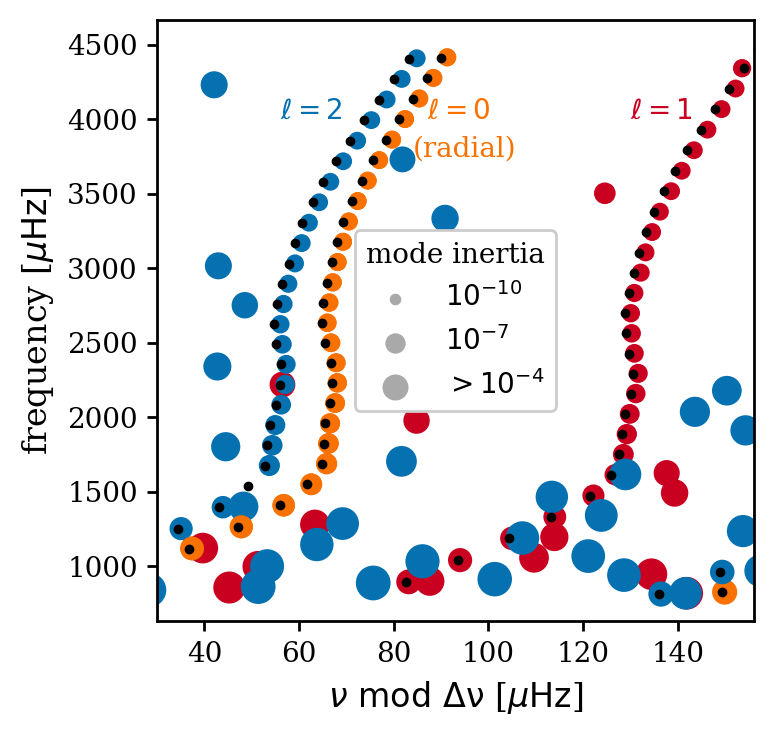

In [109]:
plt.figure(figsize=(width, height))

ref = freq0.copy()
ref = ref[ref.l <= 2]
#ref = ref[ref.n_p > 7]

plt.plot(ref['Re(freq)'] % 135.1, ref['Re(freq)'], 'k.', label=r'$M = 0$', ms=5)
plt.plot(ref['Re(freq)'] % 135.1 + 135.1, ref['Re(freq)'], 'k.', ms=5)
#plt.plot(obs_DF.nu % 135.1, obs_DF.nu, 'k.', ms=2)
#plt.plot(obs_DF.nu % 135.1 + 135.1, obs_DF.nu, 'k.', ms=2)

freqk = freq3.copy()
freqk = freqk[freqk.l <= 2]
#freqk = freqk[freqk.n_p > 7]

sizes = np.log10(freqk['E_norm'])
sizes = 10*(sizes + 11)  # Scale for plotting, adjust as necessary
plt.scatter(freqk['Re(freq)'] % 135.1, freqk['Re(freq)'], s=sizes, c=[[orange, red, blue][l] for l in freqk['l'].values], 
            label=r'$M = 10^{-4}~\rm{M}_\odot$', zorder=-999)
plt.scatter(freqk['Re(freq)'] % 135.1 + 135.1, freqk['Re(freq)'], s=sizes, 
            c=[[orange, red, blue][l] for l in freqk['l'].values],
           zorder=-999)
radk = freqk[freqk.l == 0]
plt.scatter(radk['Re(freq)'] % 135.1, radk['Re(freq)'], s=sizes[freqk.l==0], c=orange, zorder=-998)

plt.xlabel(r'$\nu~\rm{ mod }~\Delta\nu$ [$\mu\rm{Hz}$]')
plt.ylabel(r'frequency [$\mu\rm{Hz}$]')

#plt.xlim([30, 165])

# Creating legend for sizes
handles = [
    plt.scatter([], [], s=10*(np.log10(1e-10) + 11), facecolor='darkgray', label='$10^{-10}$'),
    plt.scatter([], [], s=10*(np.log10(1e-7) + 11),  facecolor='darkgray', label='$10^{-7}$'),
    plt.scatter([], [], s=10*(np.log10(1e-4) + 11),  facecolor='darkgray', label='$>10^{-4}$')
]

#plt.axhspan(obs_DF.nu.min(), obs_DF.nu.max(), color='lightgray', zorder=-9999)

plt.xlim([30, 156])
#plt.ylim([900, 4500])

plt.text(56, 4000, r'$\ell=2$', c=blue)
plt.text(87, 4000, r'$\ell=0$', c=orange)
plt.text(84, 3750, r'(radial)', c=orange)
plt.text(130, 4000, r'$\ell=1$', c=red)

plt.legend(handles=handles, title='mode inertia', facecolor='white', framealpha=1)
plt.tight_layout()

#plt.savefig('figs/echelle.pdf')


## g modes

In [110]:
gS = pd.read_table('dark-core-calibrate/modelS/gmodes.dat', skiprows=5, sep='\s+')
freq0 = pd.read_table('dark-core-calibrate/LOGS_solar/gmodes.dat', skiprows=5, sep='\s+')
freq6 = pd.read_table('dark-core-calibrate/grid/LOGS_-6/gmodes.dat', skiprows=5, sep='\s+')
freq5 = pd.read_table('dark-core-calibrate/grid/LOGS_-5/gmodes.dat', skiprows=5, sep='\s+')
freq4 = pd.read_table('dark-core-calibrate/grid/LOGS_-4/gmodes.dat', skiprows=5, sep='\s+')
freq3 = pd.read_table('dark-core-calibrate/grid/LOGS_-3/gmodes.dat', skiprows=5, sep='\s+')
freq2 = pd.read_table('dark-core-calibrate/grid/LOGS_-2/gmodes.dat', skiprows=5, sep='\s+')

In [111]:
def get_DP(freqk):
    freqk = freqk.sort_values(by=['n_p', 'l', 'n_g'], ascending=[True, True, False])
    freqk['P'] = 1 / (freqk['Re(freq)'] * 1e-6) / 3600  # convert to hours
    freqk['DP'] = freqk['P'].diff().abs() * 60  # convert to minutes
    freqk['adj'] = freqk['n_g'].diff(-1).abs() == 1
    freqk['DP'] = freqk.apply(lambda x: x['DP'] if x['adj'] else None, axis=1)
    return freqk

gS = get_DP(gS)
freq0 = get_DP(freq0)

In [112]:
freq0 = freq0.sort_values(by=['n_p', 'l', 'n_g'], ascending=[True, True, False])
freq0['P'] = 1 / (freq0['Re(freq)'] * 1e-6) / 3600  # convert to hours
freq0['DP'] = freq0['P'].diff().abs() * 60  # convert to minutes
freq0['adj'] = freq0['n_g'].diff(-1).abs() == 1
freq0['DP'] = freq0.apply(lambda x: x['DP'] if x['adj'] else None, axis=1)
freq0

E_norm    Re(freq)  Im(freq)  l  n_g  n_p  n_pg          P         DP  \
0   14.300329   10.033373       0.0  1   66    0   -66  27.685384        NaN   
1   13.917114   10.186971       0.0  1   65    0   -65  27.267945  25.046321   
2   13.522031   10.345414       0.0  1   64    0   -64  26.850330  25.056931   
3   13.132451   10.508847       0.0  1   63    0   -63  26.432756  25.054437   
4   12.751863   10.677415       0.0  1   62    0   -62  26.015451  25.038267   
..        ...         ...       ... ..  ...  ...   ...        ...        ...   
66   0.004504  284.917596       0.0  1    0    0     1   0.974941        NaN   
67   0.000642  448.424366       0.0  1    0    1     2   0.619453        NaN   
68   0.000175  596.810813       0.0  1    0    2     3   0.465437        NaN   
69   0.000055  746.564697       0.0  1    0    3     4   0.372075        NaN   
70   0.000021  893.265942       0.0  1    0    4     5   0.310969        NaN   

      adj  
0    True  
1    True  
2    True  
3    True  
4    True  
..    ...  
66  False  
67  False  
68  False  
69  False  
70  False  

[71 rows x 10 columns]

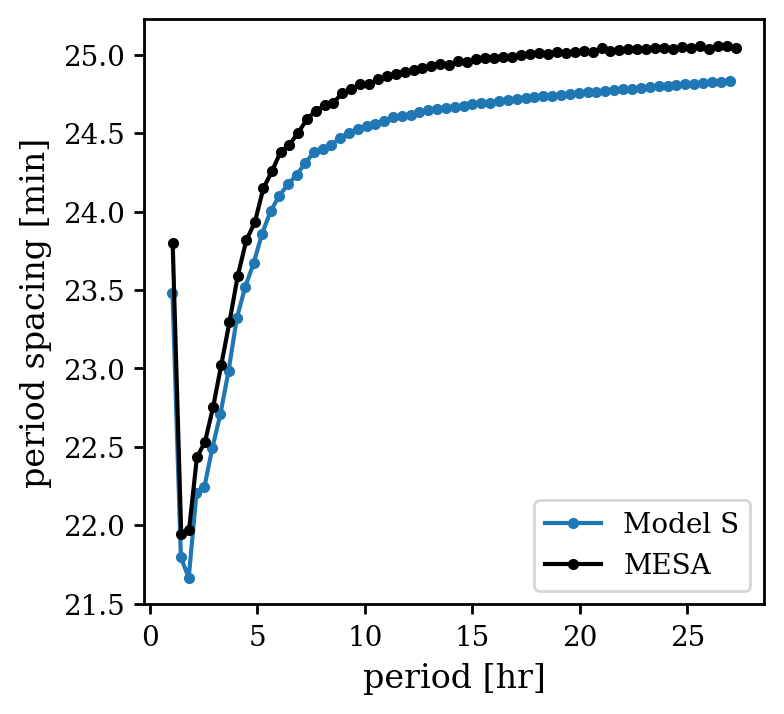

In [113]:
freq0 = pd.read_table('dark-core-calibrate/LOGS_solar/gmodes.dat', skiprows=5, sep='\s+')
freq0 = get_DP(freq0)

plt.figure(figsize=(width, height))
plt.plot(gS.P, gS.DP, '.-', label='Model S')
plt.plot(freq0.P, freq0.DP, 'k.-', label='MESA')
#plt.xlim([0, 100])
#plt.ylim([21.6, 27])#25.2])
plt.xlabel('period [hr]')
plt.ylabel('period spacing [min]')
plt.legend()

In [114]:
#pd.DataFrame(gyre0.data)
gyre0.data['nabla']

array([0.32412199, 0.32548999, 0.32629437, ..., 0.00077341, 0.00075736,
       0.00074338])

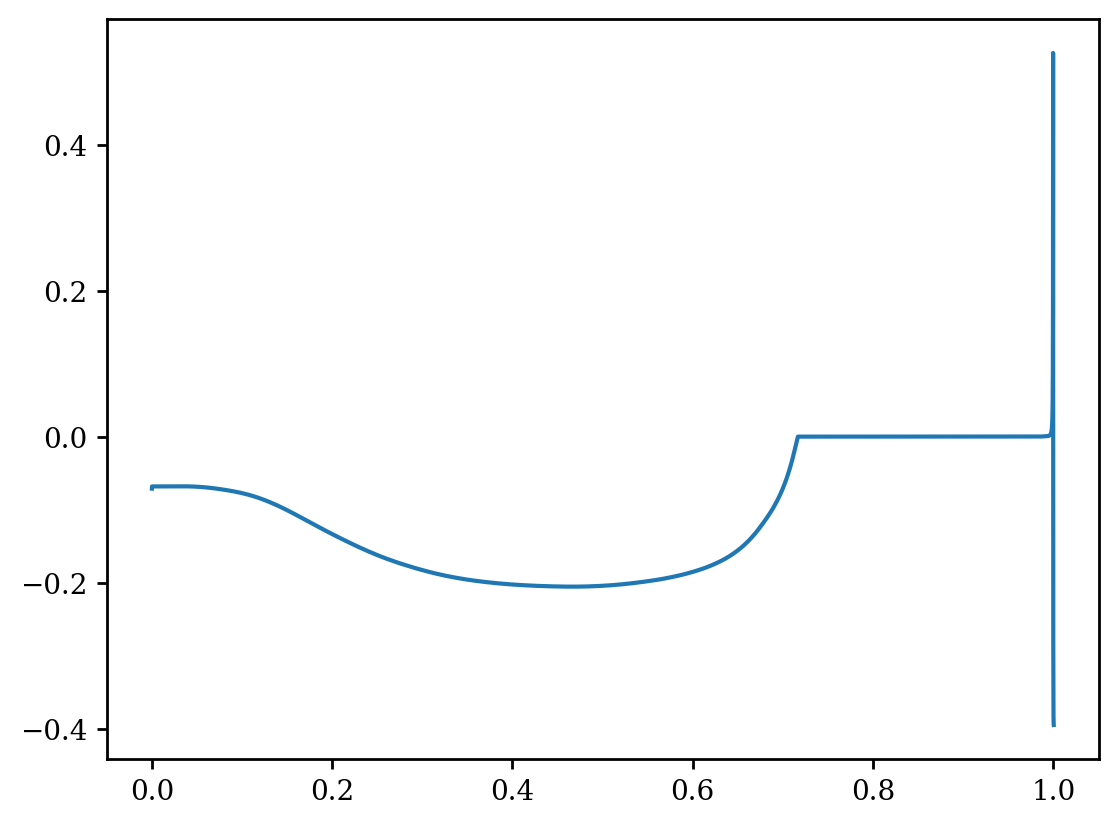

In [115]:
plt.plot(gyre0.x, gyre0.data['nabla'] - gyre0.data['nabla_ad'])

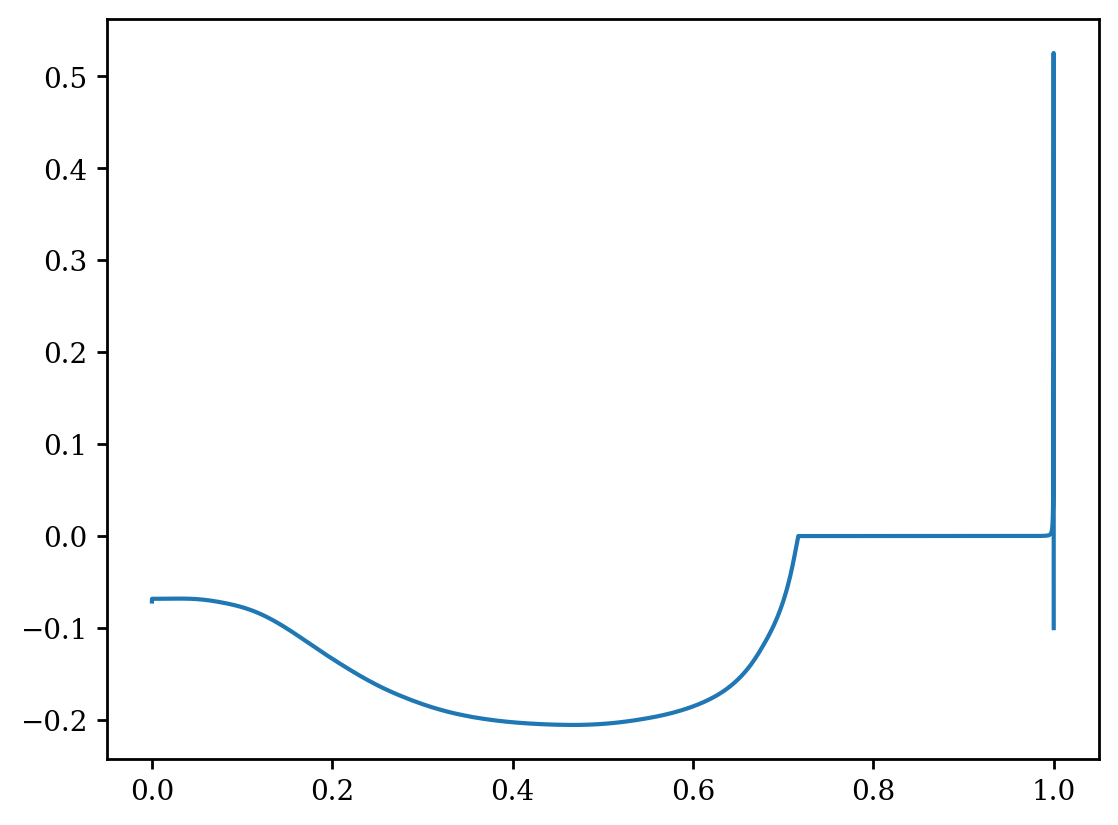

In [116]:
idx = gyre0.x <= 1
n7 = (gyre0.data['nabla'] - gyre0.data['nabla_ad'])[idx]
plt.plot(gyre0.x[idx], n7)

Text(0, 0.5, 'period spacing [min]')

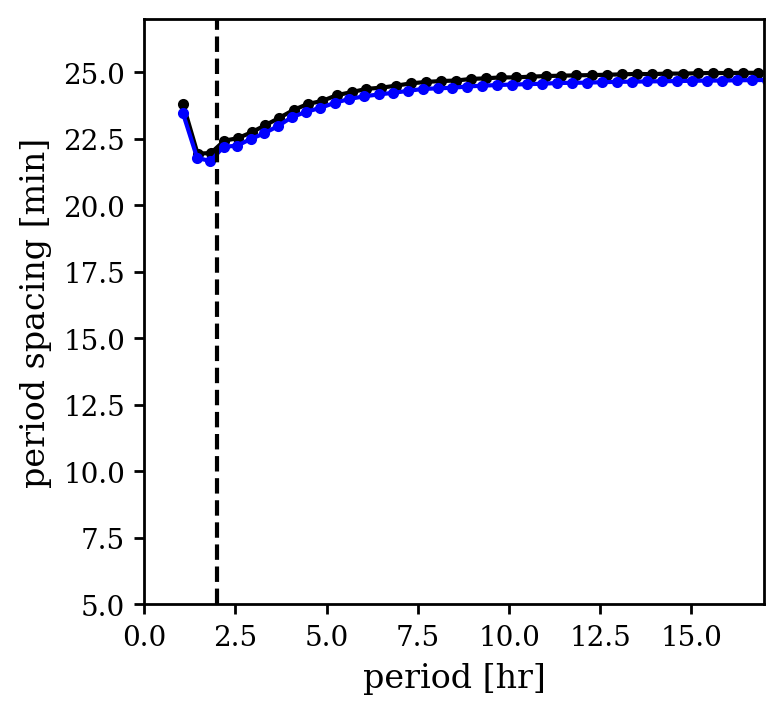

In [117]:
plt.figure(figsize=(width, height))
plt.plot(freq0.P, freq0.DP, 'k.-')
plt.plot(gS.P, gS.DP, 'b.-')
plt.ylim([5, 27])
plt.xlim([0, 17])
plt.axvline(2, ls='--', c='k')
plt.xlabel('period [hr]')
plt.ylabel('period spacing [min]')

In [85]:
from matplotlib.patches import Rectangle

/tmp/ipykernel_1943715/1610832055.py:29: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  plt.plot([], [], 'k.', marker='.', ms=3, mew=0.1, label='mixed modes')


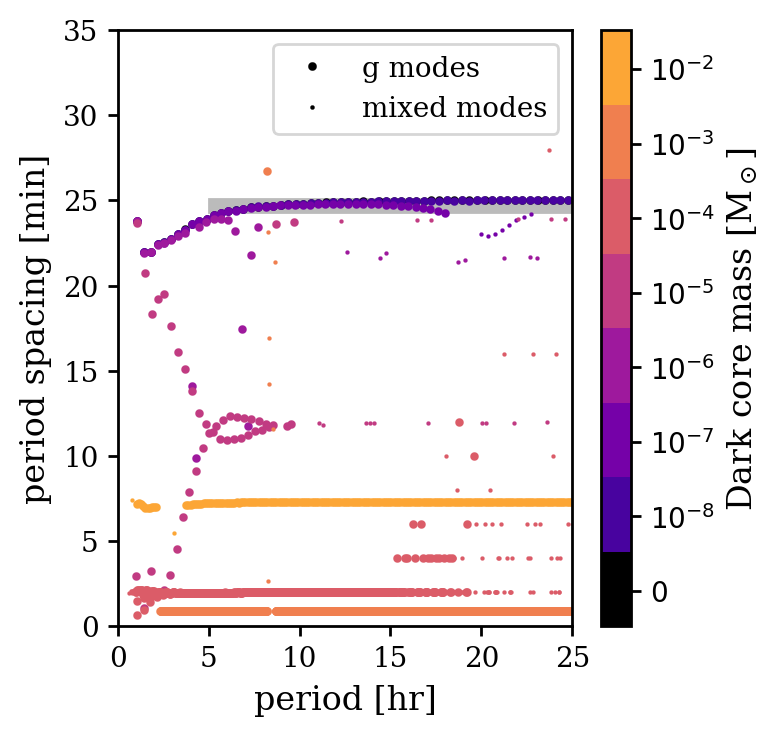

In [123]:
freq0 = pd.read_table('dark-core-calibrate/LOGS_solar/gmodes.dat', skiprows=5, sep='\s+')
freq8 = pd.read_table('dark-core-calibrate/grid/LOGS_-8/gmodes_xih.dat', skiprows=5, sep='\s+')
freq7 = pd.read_table('dark-core-calibrate/grid/LOGS_-7/gmodes_xih.dat', skiprows=5, sep='\s+')
freq6 = pd.read_table('dark-core-calibrate/grid/LOGS_-6/gmodes_xih.dat', skiprows=5, sep='\s+')
freq5 = pd.read_table('dark-core-calibrate/grid/LOGS_-5/gmodes_xih.dat', skiprows=5, sep='\s+')
freq4 = pd.read_table('dark-core-calibrate/grid/LOGS_-4/gmodes_xih.dat', skiprows=5, sep='\s+')
freq3 = pd.read_table('dark-core-calibrate/grid/LOGS_-3/solar-freqs/gmodes_xih.dat', skiprows=5, sep='\s+')
freq2 = pd.read_table('dark-core-calibrate/grid/LOGS_-2/gmodes_xih.dat', skiprows=5, sep='\s+')

plt.figure(figsize=(width, height))

for freqk, mass in zip([freq0, freq8, freq7, freq6, freq5, freq4, freq3, freq2], masses8):
    
    freqk = freqk.sort_values(by=['n_p', 'l', 'n_g'], ascending=[True, True, False])
    #freqk = freqk[freqk['n_p'] == 0]
    freqk['P'] = 1 / (freqk['Re(freq)'] * 1e-6) / 3600  # convert to hours
    freqk['DP'] = freqk['P'].diff().abs() * 60  # convert to minutes
    freqk['adj'] = freqk['n_g'].diff(-1).abs() == 1
    freqk['DP'] = freqk.apply(lambda x: x['DP'] if x['adj'] else None, axis=1)

    #plt.plot(freqk.P, freqk.DP, color=cmap(norm(mass)), ls='None', #'--' if mass > 1e-7 else '-', 
    #         marker='.' if freq['n_p'] == 0 else 'o')
    for i, row in freqk.iterrows():
        marker = 'o' if row['n_p'] == 0 else '.'
        ms = 3 if row['n_p'] == 0 else 3
        plt.plot(row.P, row.DP, color=cmap8(norm8(mass)), ls='None', marker=marker, ms=ms, mew=0.05)

plt.plot([], [], 'ko', label='g modes', ms=3, mew=0.1)
plt.plot([], [], 'k.', ms=3, mew=0.1, label='mixed modes')

plt.legend()

plt.gca().add_patch(Rectangle((5, 24.3), (25-5), (25.1-24.3), color='#bbbbbb', zorder=-999))

plt.xlim([0, 25])
#plt.ylim([20, 100])
#plt.ylim([0, 30])
plt.ylim([0, 35])
#plt.semilogy()
plt.xlabel('period [hr]')
plt.ylabel('period spacing [min]')
cbar_8()

plt.tight_layout()
plt.savefig('figs/gmodes.pdf')

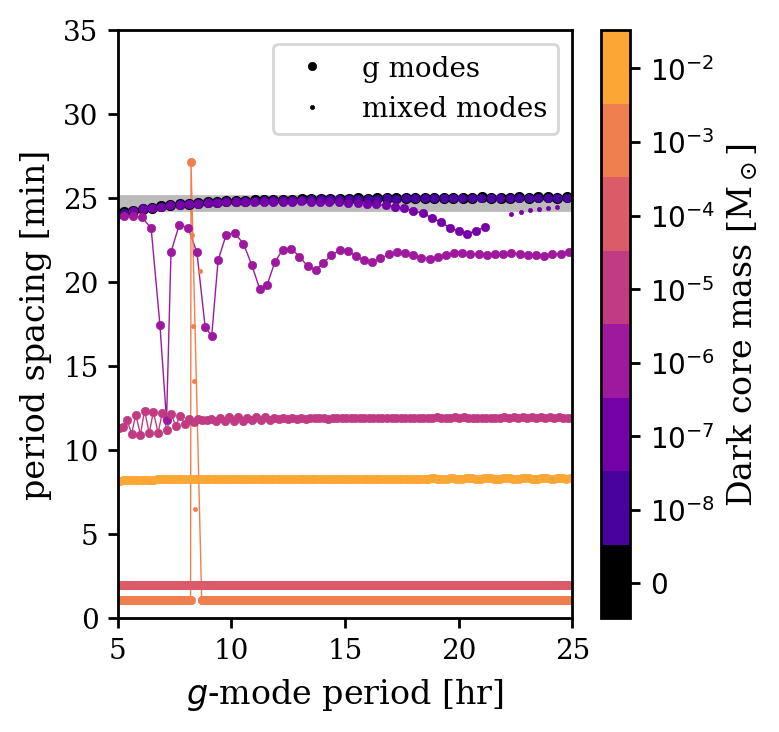

In [152]:
freq0 = pd.read_table('dark-core-calibrate/LOGS_solar/gmodes.dat', skiprows=5, sep='\s+')
freq8 = pd.read_table('dark-core-calibrate/grid/LOGS_-8/gmodes_xih.dat', skiprows=5, sep='\s+')
freq7 = pd.read_table('dark-core-calibrate/grid/LOGS_-7/gmodes_xih.dat', skiprows=5, sep='\s+')
freq6 = pd.read_table('dark-core-calibrate/grid/LOGS_-6/gmodes_xih.dat', skiprows=5, sep='\s+')
freq5 = pd.read_table('dark-core-calibrate/grid/LOGS_-5/gmodes_xih.dat', skiprows=5, sep='\s+')
freq4 = pd.read_table('dark-core-calibrate/grid/LOGS_-4/gmodes_xih.dat', skiprows=5, sep='\s+')
freq3 = pd.read_table('dark-core-calibrate/grid/LOGS_-3/gmodes_xih.dat', skiprows=5, sep='\s+')
freq2 = pd.read_table('dark-core-calibrate/grid/LOGS_-2/gmodes_xih.dat', skiprows=5, sep='\s+')

plt.figure(figsize=(width, height))

plt.gca().set_rasterization_zorder(-99)

for freqk, mass in zip([freq0, freq8, freq7, freq6, freq5, freq4, freq3, freq2], masses8):
    
    freqk = freqk.sort_values(by=['n_p', 'l', 'n_g'], ascending=[True, True, False])
    freqk['P'] = 1 / (freqk['Re(freq)'] * 1e-6) / 3600  # convert to hours
    freqk['DP'] = freqk['P'].diff().abs() * 60  # convert to minutes
    freqk['adj'] = freqk['n_g'].diff(-1).abs() == 1
    freqk['DP'] = freqk.apply(lambda x: x['DP'] if x['adj'] else None, axis=1)
    freqk = freqk[freqk['P'] < 26]

    for i, row in freqk.iterrows():
        marker = 'o' if row['n_p'] == 0 else '.'
        ms = 3 if row['n_p'] == 0 else 3
        plt.plot(row.P, row.DP, color=cmap8(norm8(mass)), ls='None', marker=marker, ms=ms, mew=0.25 if mass > 1e-9 else 1, zorder=-999)
    
    freqk_n0 = freqk[freqk['n_p'] == 0].sort_values(by='P')
    #freqk_n0 = freqk.sort_values(by='P')
    freqk_n0 = freqk_n0[freqk_n0['DP'] < 35]
    plt.plot(freqk_n0['P'], freqk_n0['DP'], color=cmap8(norm8(mass)), ls='-', lw=0.5, zorder=-9999)

plt.plot([], [], 'ko', label='g modes', ms=3, mew=0.25)
plt.plot([], [], 'k.', ms=3, mew=0.25, label='mixed modes')

plt.legend(loc='upper right')

plt.gca().add_patch(Rectangle((5, 24.3), (25-5), (25.1-24.3), color='#bbbbbb', zorder=-99999))

plt.xlim([5, 25])
plt.ylim([0, 35])
plt.xlabel(r'$g$-mode period [hr]')
plt.ylabel('period spacing [min]')
cbar_8()

plt.tight_layout()
plt.savefig('figs/gmodes.pdf', dpi=400)

In [150]:
1 / (26 * 1e-6) / (60*60)

10.683760683760683

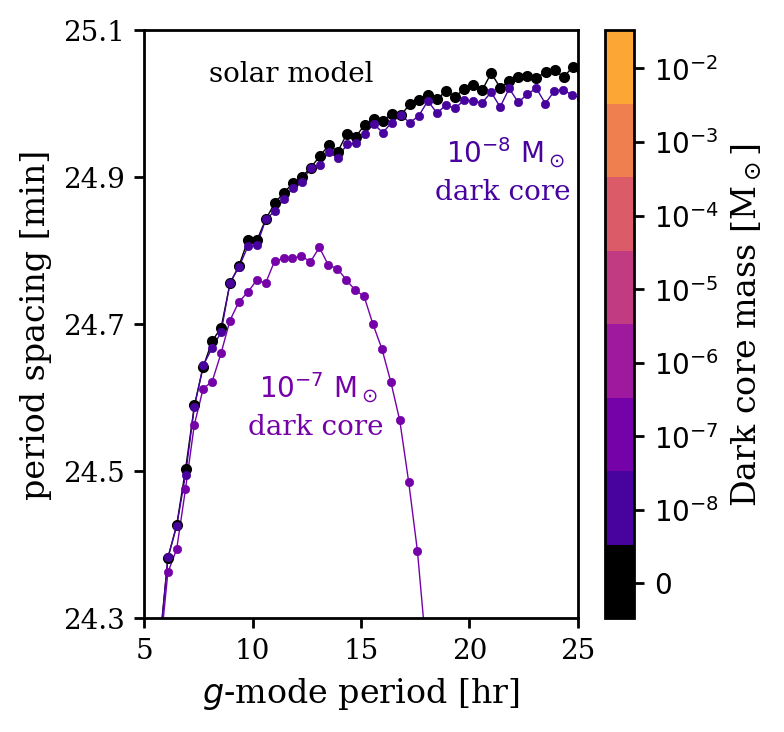

In [154]:
plt.figure(figsize=(width, height))

#for freqk, mass, gyr in zip([freq0, freq8, freq7, freq6, freq5, freq4, freq3, freq2], masses8, gyres):
for freqk, mass in zip([freq0, freq8, freq7, freq6, freq5, freq4, freq3, freq2], masses8):
    
    if mass > 1e-7:
        continue
    
    freqk = freqk.sort_values(by=['n_p', 'l', 'n_g'], ascending=[True, True, False])
    #freqk = freqk[freqk['n_p'] == 0]
    freqk['P'] = 1 / (freqk['Re(freq)'] * 1e-6) / 3600  # convert to hours
    freqk['DP'] = freqk['P'].diff().abs() * 60  # convert to minutes
    freqk['adj'] = freqk['n_g'].diff(-1).abs() == 1
    freqk['DP'] = freqk.apply(lambda x: x['DP'] if x['adj'] else None, axis=1)
    
    if mass == 1e-7:
        freqk = freqk[freqk.P < 18.2]
    
    for i, row in freqk.iterrows():
        marker = 'o' if row['n_p'] == 0 else '.'
        ms = 3 if row['n_p'] == 0 else 3
        plt.plot(row.P, row.DP, color=cmap8(norm8(mass)), ls='None', marker=marker, ms=ms, mew=0.25 if mass > 1e-9 else 1)
    if mass <= 1e-6:
        #freqk = freqk[freqk['n_p'] == 0]
        plt.plot(freqk.P, freqk.DP, color=cmap8(norm8(mass)), ls='-', lw=0.5, zorder=-999)
    
    #plt.axhline(period_spacing(gyr), ls='--' if mass > 1e-9 else '-', lw=1, c=cmap8(norm8(mass)))

plt.plot([], [], 'ko', label='g modes', ms=3, mew=0.1)
plt.plot([], [], 'k.', ms=3, mew=0.1, label='mixed modes')

#plt.legend()

plt.text(8, 25.03, r'solar model', c='k')
plt.text(10.3, 24.6, r'$10^{-7}~\rm{M}_\odot$', c=cmap8(norm8(1e-7)))
plt.text(9.8, 24.55, r'dark core', c=cmap8(norm8(1e-7)))
plt.text(18.9, 24.92, r'$10^{-8}~\rm{M}_\odot$', c=cmap8(norm8(1e-8)))
plt.text(18.4, 24.87, 'dark core', c=cmap8(norm8(1e-8)))

plt.xlim([5, 25])
#plt.ylim([20, 100])
#plt.ylim([0, 30])
plt.ylim([24.3, 25.1])
plt.yticks(np.linspace(24.3, 25.1, 5))
#plt.semilogy()
plt.xlabel(r'$g$-mode period [hr]')
plt.ylabel('period spacing [min]')
cbar_8()

plt.tight_layout()
plt.savefig('figs/gmodes-zoom.pdf')

In [160]:
1 / (5 * 1e-6) / (60*60)

55.555555555555564

In [161]:
from scipy.integrate import cumulative_trapezoid

In [162]:
from scipy.integrate import trapz

In [163]:
def period_spacing(gyre):
    x = gyre.r/gyre.R
    N = gyre.N
    idx = np.logical_and(x>0, N>0)
    dP = 2*np.pi**2/np.sqrt(2)/trapz(N[idx]/x[idx], x[idx])/60
    return dP

In [164]:
period_spacing(gyre6)

/tmp/ipykernel_41857/128797689.py:5: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  dP = 2*np.pi**2/np.sqrt(2)/trapz(N[idx]/x[idx], x[idx])/60


21.908711209574033

/tmp/ipykernel_41857/2640204403.py:5: RuntimeWarning: divide by zero encountered in divide
  dP = 2*np.pi**2/np.sqrt(2)/cumulative_trapezoid(N[idx]/x[idx], x[idx], initial=0)/60


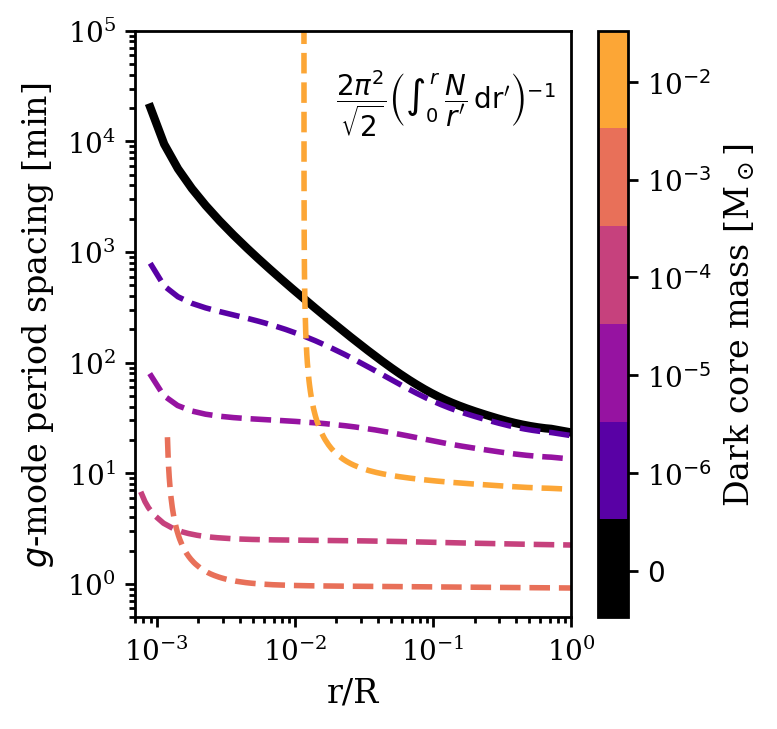

In [165]:
def plot_cumulative(gyre, color, ls, lw):
    x = gyre.r/gyre.R
    N = gyre.N
    idx = np.logical_and(x>0, N>0)
    dP = 2*np.pi**2/np.sqrt(2)/cumulative_trapezoid(N[idx]/x[idx], x[idx], initial=0)/60
    #dP = 1/(2*np.pi**2/np.sqrt(2)/cumulative_trapezoid(N[idx]/x[idx], x[idx], initial=0))*60
    #plt.plot([1e-5] + list(x[idx][1:]), [dP[1]]+list(dP[1:]), lw=3, c=color)
    plt.plot(x[idx][1:], dP[1:], lw=lw, c=color, ls=ls)

plt.figure(figsize=(width, height))

for gyrek, mass in zip([gyre0, gyre6, gyre5, gyre4, gyre3, gyre2], masses):
    #print(mass)
    plot_cumulative(gyrek, color=cmap(norm(mass)), ls='--' if mass > 1e-7 else '-', lw=2 if mass > 1e-7 else 3)

#plt.text(2e-2, 2e4, r"$2\pi^2/\sqrt{2}/ \int_0^{r} N/r' \, \rm{d}r'$")
plt.text(2e-2, 2e4, r"$\dfrac{2\pi^2}{\sqrt{2}}\left(\int_0^{r}\; \dfrac{N}{r'} \, \rm{d}r'\right)^{-1}$")

plt.xlim([7e-4, 1])
plt.ylim([5e-1, 1e5])
plt.semilogx()
plt.semilogy()

cbar()

#plt.ylabel(r'Period spacing $\mathbf{\Delta \Pi/}$min')
plt.ylabel(r'$g$-mode period spacing [min]')#+'\n'+r"$2\pi^2/\sqrt{2}/ \int_0^{r} N/r' \, \rm{d}r'$")
plt.xlabel('r/R')
#plt.semilogy()
plt.tight_layout()
plt.savefig('figs/asymptotic_gmodes.pdf')
#plt.legend(loc='lower left')

/tmp/ipykernel_41857/1806505683.py:6: RuntimeWarning: divide by zero encountered in divide
  dP = 2*np.pi**2/np.sqrt(2)/cumulative_trapezoid(N[idx]/x[idx], x[idx], initial=0)/60


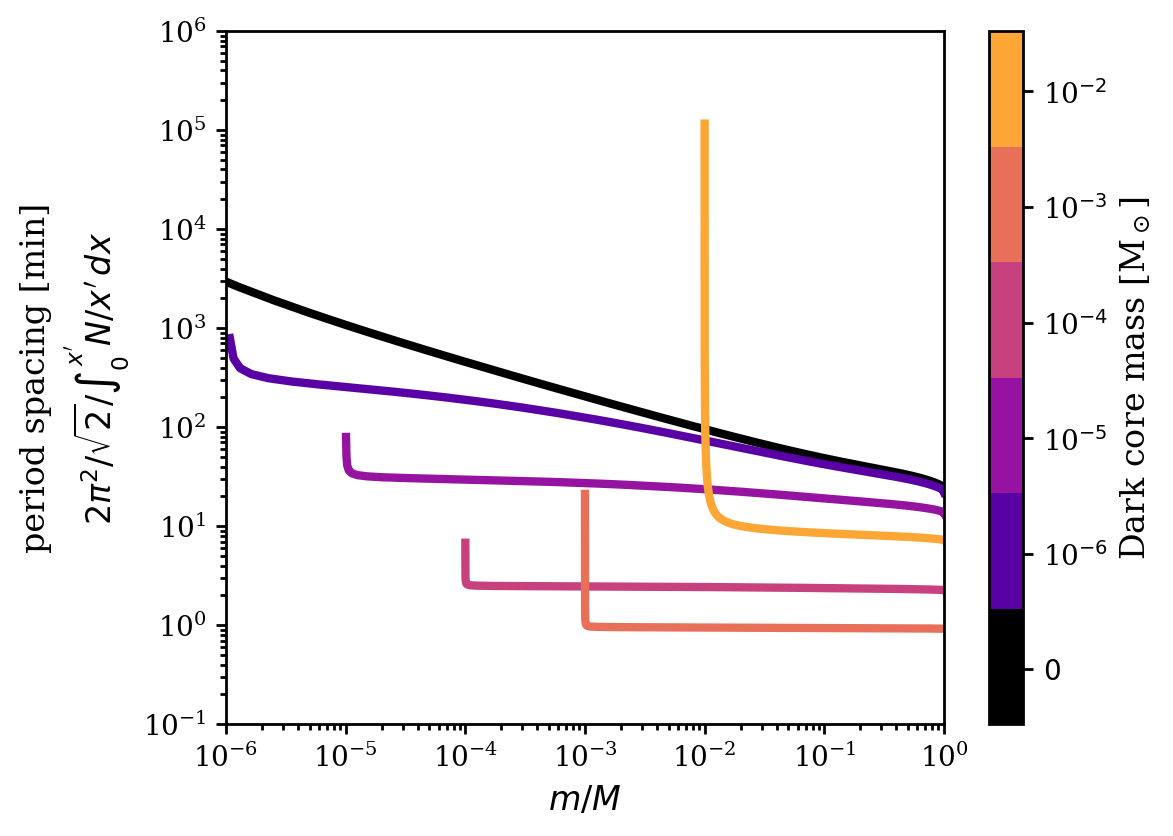

In [166]:
def plot_cumulative(gyre, color):
    x = gyre.r/gyre.R
    N = gyre.N
    idx = np.logical_and(x>0, N>0)
    m = gyre.m / gyre.M
    dP = 2*np.pi**2/np.sqrt(2)/cumulative_trapezoid(N[idx]/x[idx], x[idx], initial=0)/60
    #plt.plot([1e-8] + list(m[idx][1:]), [dP[1]]+list(dP[1:]), lw=3, c=color)
    plt.plot(m[idx], dP, lw=3, c=color)

plt.figure(figsize=(6, 6.5/1.5))

for gyrek, mass in zip([gyre0, gyre6, gyre5, gyre4, gyre3, gyre2], masses):
    plot_cumulative(gyrek, color=cmap(norm(mass)))

plt.xlim([1e-6, 1])
plt.ylim([1e-1, 1e6])
plt.semilogx()
plt.semilogy()

cbar()

#plt.ylabel(r'Period spacing $\mathbf{\Delta \Pi/}$min')
plt.ylabel(r'period spacing [min]'+'\n'+r"$2\pi^2/\sqrt{2}/ \int_0^{x'} N/x' \, dx$")
plt.xlabel(r'$m/M$')
#plt.semilogy()
plt.tight_layout()
#plt.legend(loc='lower left')

[]

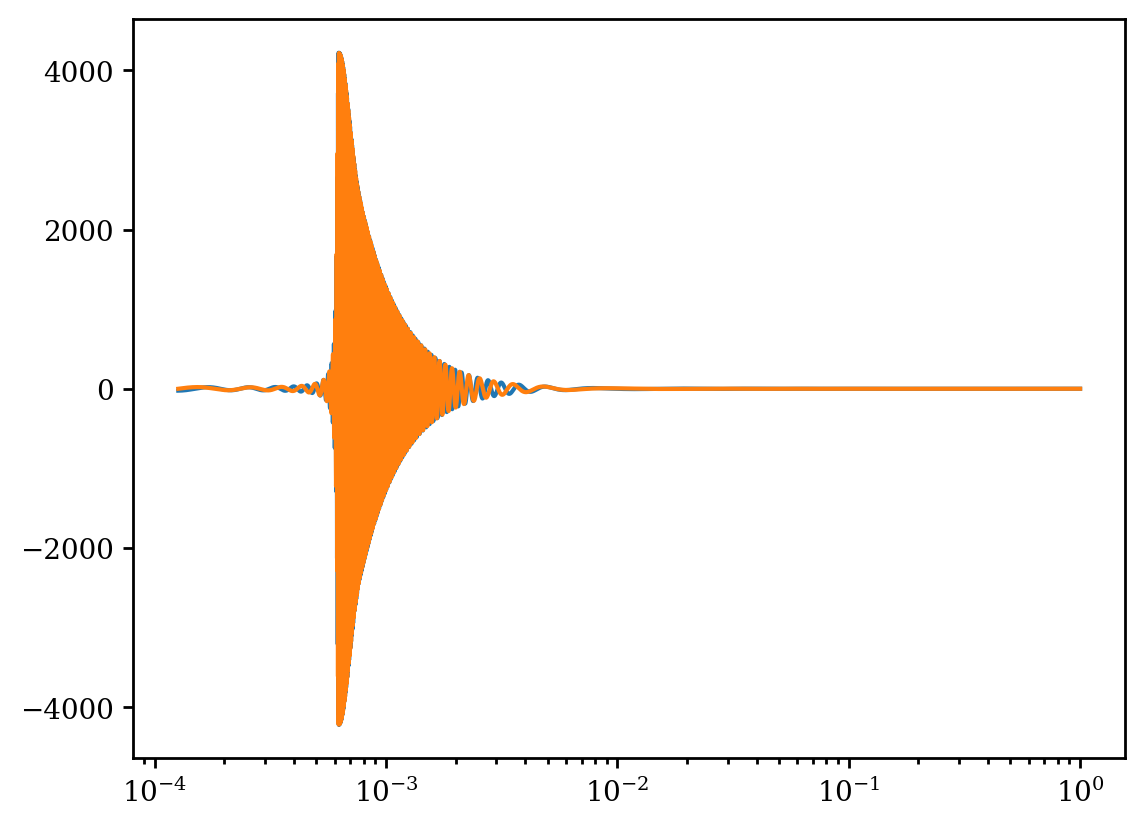

In [175]:
xir = pd.read_table('dark-core-calibrate/grid/LOGS_-4/boundary/xir/001_-00224', sep=r'\s+', skiprows=5)
xih = pd.read_table('dark-core-calibrate/grid/LOGS_-4/boundary/xih/001_-00181', sep=r'\s+', skiprows=5)
xir
plt.plot(xir.x, xir['Re(xi_h)'], ls='-')
#plt.plot(xir.x, xir['Re(xi_r)'], ls='-')
plt.semilogx()
plt.plot(xih.x, xih['Re(xi_h)'], ls='-')
#plt.plot(xir.x, xir['Re(xi_r)'], ls='-')
plt.semilogx()

## Evolve

In [ ]:
hist0 = pd.read_table('dark-core-calibrate/grid_evol/LOGS_solar/history.data', skiprows=5, sep='\s+')
hist6 = pd.read_table('dark-core-calibrate/grid_evol/LOGS_-6/history.data', skiprows=5, sep='\s+')
hist5 = pd.read_table('dark-core-calibrate/grid_evol/LOGS_-5/history.data', skiprows=5, sep='\s+')
hist4 = pd.read_table('dark-core-calibrate/grid_evol/LOGS_-4/history.data', skiprows=5, sep='\s+')
hist3 = pd.read_table('dark-core-calibrate/grid_evol/LOGS_-3/history.data', skiprows=5, sep='\s+')
hist2 = pd.read_table('dark-core-calibrate/grid_evol/LOGS_-2/history.data', skiprows=5, sep='\s+')

hists = [hist0, hist6, hist5, 
         hist4, 
         hist3, hist2]

In [ ]:
plt.figure(figsize=(width,height))

for mass, df in list(zip(masses, hists))[:-3]:
    plt.plot(10**df.log_Teff, 10**df.log_L, color=cmap(norm(mass)), 
             ls='--' if mass > 1e-8 else '-', lw=2 if mass == 1e-8 else 2)

plt.plot(5772.003429098915, 1, 'k.', zorder=100)
plt.plot(5772.003429098915, 1, 'ko', mfc='none', ms=10, zorder=100)
cbar()

plt.xlabel(r'$T_{\rm{eff}}/$K')
plt.ylabel(r'$L/\rm{L}_\odot$')
plt.gca().invert_xaxis()

plt.tight_layout()
plt.savefig('figs/hr.pdf')

In [ ]:
isotope_columns = [
    'h1', 'h2', 'he3', 'he4', 'li7', 'be7', 'be9', 'be10', 'b8', 'c12', 'c13', 'n13', 'n14', 'n15',
    'o14', 'o15', 'o16', 'o17', 'o18', 'f17', 'f18', 'f19', 'ne18', 'ne19', 'ne20', 'ne21', 'ne22',
    'na21', 'na22', 'na23', 'na24', 'mg23', 'mg24', 'mg25', 'mg26', 'al25', 'al26', 'al27', 'si27',
    'si28', 'si29', 'si30', 'p30', 'p31', 's31', 's32', 's33', 's34', 'cl35', 'ar35', 'ar36', 'ar37',
    'ar38', 'k39', 'ca39', 'ca40', 'ca41', 'ca42', 'sc43', 'ti44', 'ti45', 'ti46', 'v47', 'cr48', 'cr49',
    'cr50', 'mn51', 'fe52', 'fe53', 'fe54', 'fe56', 'co55', 'co56', 'ni56', 'ni57', 'ni58', 'ni59', 
    'cu59', 'zn60'
]

isotope_labels = [
    r'$^1\mathrm{H}$', r'$^2\mathrm{H}$', r'$^3\mathrm{He}$', r'$^4\mathrm{He}$', r'$^7\mathrm{Li}$', r'$^7\mathrm{Be}$', 
    r'$^9\mathrm{Be}$', r'$^{10}\mathrm{Be}$', r'$^8\mathrm{B}$', r'$^{12}\mathrm{C}$', r'$^{13}\mathrm{C}$', 
    r'$^{13}\mathrm{N}$', r'$^{14}\mathrm{N}$', r'$^{15}\mathrm{N}$', r'$^{14}\mathrm{O}$', r'$^{15}\mathrm{O}$', 
    r'$^{16}\mathrm{O}$', r'$^{17}\mathrm{O}$', r'$^{18}\mathrm{O}$', r'$^{17}\mathrm{F}$', r'$^{18}\mathrm{F}$', 
    r'$^{19}\mathrm{F}$', r'$^{18}\mathrm{Ne}$', r'$^{19}\mathrm{Ne}$', r'$^{20}\mathrm{Ne}$', r'$^{21}\mathrm{Ne}$', 
    r'$^{22}\mathrm{Ne}$', r'$^{21}\mathrm{Na}$', r'$^{22}\mathrm{Na}$', r'$^{23}\mathrm{Na}$', r'$^{24}\mathrm{Na}$', 
    r'$^{23}\mathrm{Mg}$', r'$^{24}\mathrm{Mg}$', r'$^{25}\mathrm{Mg}$', r'$^{26}\mathrm{Mg}$', r'$^{25}\mathrm{Al}$', 
    r'$^{26}\mathrm{Al}$', r'$^{27}\mathrm{Al}$', r'$^{27}\mathrm{Si}$', r'$^{28}\mathrm{Si}$', r'$^{29}\mathrm{Si}$', 
    r'$^{30}\mathrm{Si}$', r'$^{30}\mathrm{P}$', r'$^{31}\mathrm{P}$', r'$^{31}\mathrm{S}$', r'$^{32}\mathrm{S}$', 
    r'$^{}^{33}\mathrm{S}$', r'$^{34}\mathrm{S}$', r'$^{35}\mathrm{Cl}$', r'$^{35}\mathrm{Ar}$', r'$^{36}\mathrm{Ar}$', 
    r'$^{37}\mathrm{Ar}$', r'$^{38}\mathrm{Ar}$', r'$^{39}\mathrm{K}$', r'$^{39}\mathrm{Ca}$', r'$^{40}\mathrm{Ca}$', 
    r'$^{41}\mathrm{Ca}$', r'$^{42}\mathrm{Ca}$', r'$^{43}\mathrm{Sc}$', r'$^{44}\mathrm{Ti}$', r'$^{45}\mathrm{Ti}$', 
    r'$^{46}\mathrm{Ti}$', r'$^{47}\mathrm{V}$', r'$^{48}\mathrm{Cr}$', r'$^{49}\mathrm{Cr}$', r'$^{50}\mathrm{Cr}$', 
    r'$^{51}\mathrm{Mn}$', r'$^{52}\mathrm{Fe}$', r'$^{53}\mathrm{Fe}$', r'$^{54}\mathrm{Fe}$', r'$^{56}\mathrm{Fe}$', 
    r'$^{55}\mathrm{Co}$', r'$^{56}\mathrm{Co}$', r'$^{56}\mathrm{Ni}$', r'$^{57}\mathrm{Ni}$', r'$^{58}\mathrm{Ni}$', 
    r'$^{59}\mathrm{Ni}$', r'$^{59}\mathrm{Cu}$', r'$^{60}\mathrm{Zn}$'
]

In [ ]:
df = m3

integrated_abundances = df[isotope_columns].multiply(df['mass'], axis=0).sum()
top_12_isotopes = integrated_abundances.nlargest(20).index

fig = plt.figure(figsize=(6*1.15, 1.15*6))

norm_iso = BoundaryNorm(boundaries=range(len(top_12_isotopes)+1), ncolors=len(top_12_isotopes))
cmap_iso = plt.cm.ScalarMappable(norm=norm_iso, cmap=plt.cm.tab20c)

idxs = np.argsort(df[top_12_isotopes].max().values)
for ii, idx in enumerate(idxs):
    plt.plot(10**df['logR'], df[top_12_isotopes[idx]], lw=4, zorder=-idx, c=cmap_iso.to_rgba(ii), alpha=0.9)
    #plt.plot(df['mass'], df[top_12_isotopes[idx]], lw=4, zorder=-idx, c=cmap_iso.to_rgba(ii), alpha=0.9)

plt.semilogy()
plt.semilogx()
plt.xlabel('r/R')
plt.ylabel('Abundance')

plt.ylim(1e-12, 1)
plt.xlim(1e-3, 1)

plt.tight_layout()
plt.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar_iso = plt.colorbar(cmap_iso, cax=cbar_ax, ticks=np.arange(len(top_12_isotopes)) + 0.5)
cbar_iso.set_ticklabels([isotope_labels[isotope_columns.index(iso)] for iso in top_12_isotopes[idxs]])
cbar_iso.ax.minorticks_off()
#cbar_iso.ax.tick_params(labelsize=12)

plt.show()


In [ ]:
m3i = pd.read_table('dark-core-calibrate/grid/LOGS_-3/LOGS/profile1.data', sep='\s+', skiprows=5)

In [ ]:
plt.plot(m3i.mass, m3i.mg24, c='k', lw=3)
plt.plot(m3.mass, m3.mg24, ls='--', lw=3)
plt.semilogy()
plt.semilogx()

In [ ]:
# all central abundances over time 
# 